# ❓ <font color='green'> <u> PROBLEM STATEMENT (Clustering_Crime_Data) </u>

### Perform Clustering(Hierarchical, K-means & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

#### <u> Data Description: </u>

* Murder -- Muder rates in different places of United States
* Assualt -- Assualt rate in different places of United States
* UrbanPop -- urban population in different places of United States
* Rape -- Rape rate in different places of United States


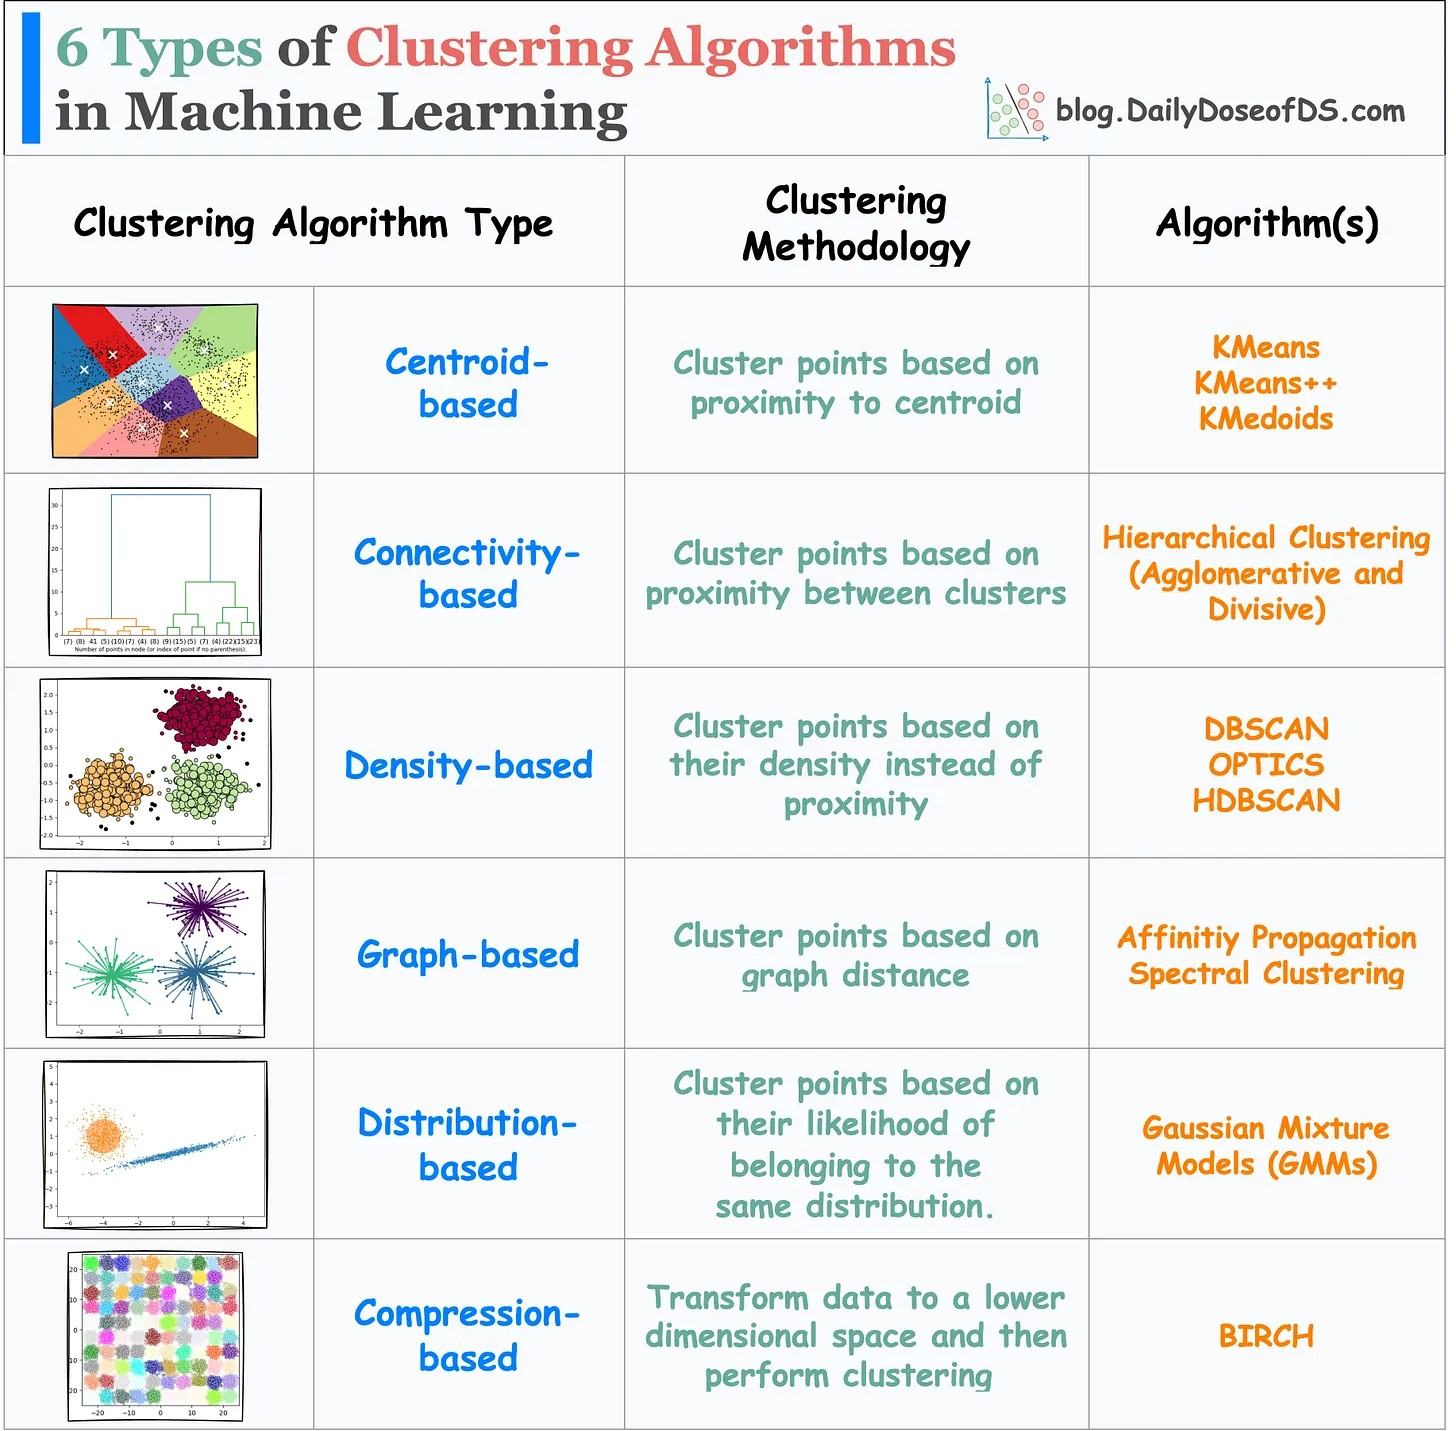

## <font color ='olive'> 0.1 GO TO :<a class="anchor" id="0.1"></a>

1. [HIERARCHICAL CLUSTERING ALGORITHM](#1)

2. [K-MEANS CLUSTERING ALGORITHM ](#2)

3. [DBSCAN ALGORITHM](#3)

___

 * ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [55]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid')
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

* ### <font color = 'blue'> <u> READ DATA </u>

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/crime_data.csv")
df.head(10)

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0      Alabama    13.2      236        58  21.2
1       Alaska    10.0      263        48  44.5
2      Arizona     8.1      294        80  31.0
3     Arkansas     8.8      190        50  19.5
4   California     9.0      276        91  40.6
5     Colorado     7.9      204        78  38.7
6  Connecticut     3.3      110        77  11.1
7     Delaware     5.9      238        72  15.8
8      Florida    15.4      335        80  31.9
9      Georgia    17.4      211        60  25.8

In [3]:
# Renaming Columns:
df.rename(columns = {'Unnamed: 0':'States'}, inplace= True)
df.head()

States  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [4]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


> * #### There are 50 records and 5 Variables.
> * #### "States" is Categorical Variable includes different states in USA. 
> * #### Other Variables are integer data type with 50 non-null records.

* ##### <font color ='green'> <u>Descriptive statistics</u>

In [6]:
df.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [7]:
# Checking For null Value if any:
df.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

* ##### <font color ='green'><u> Checking for Duplicate Records and Removing if any </u>

In [8]:
df.duplicated().sum()

0

> * #### In "Assault" Variable we can see large difference in min value and 25% and also in max value and 75%. It represents presence of outliers.
> * #### All data is in valid range.
> * #### No null value is present.
> * #### No Duplicate Value Present.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

* ##### <font color ='green'><u> Distribution Plot </u>

<Axes: xlabel='Rape', ylabel='Density'>

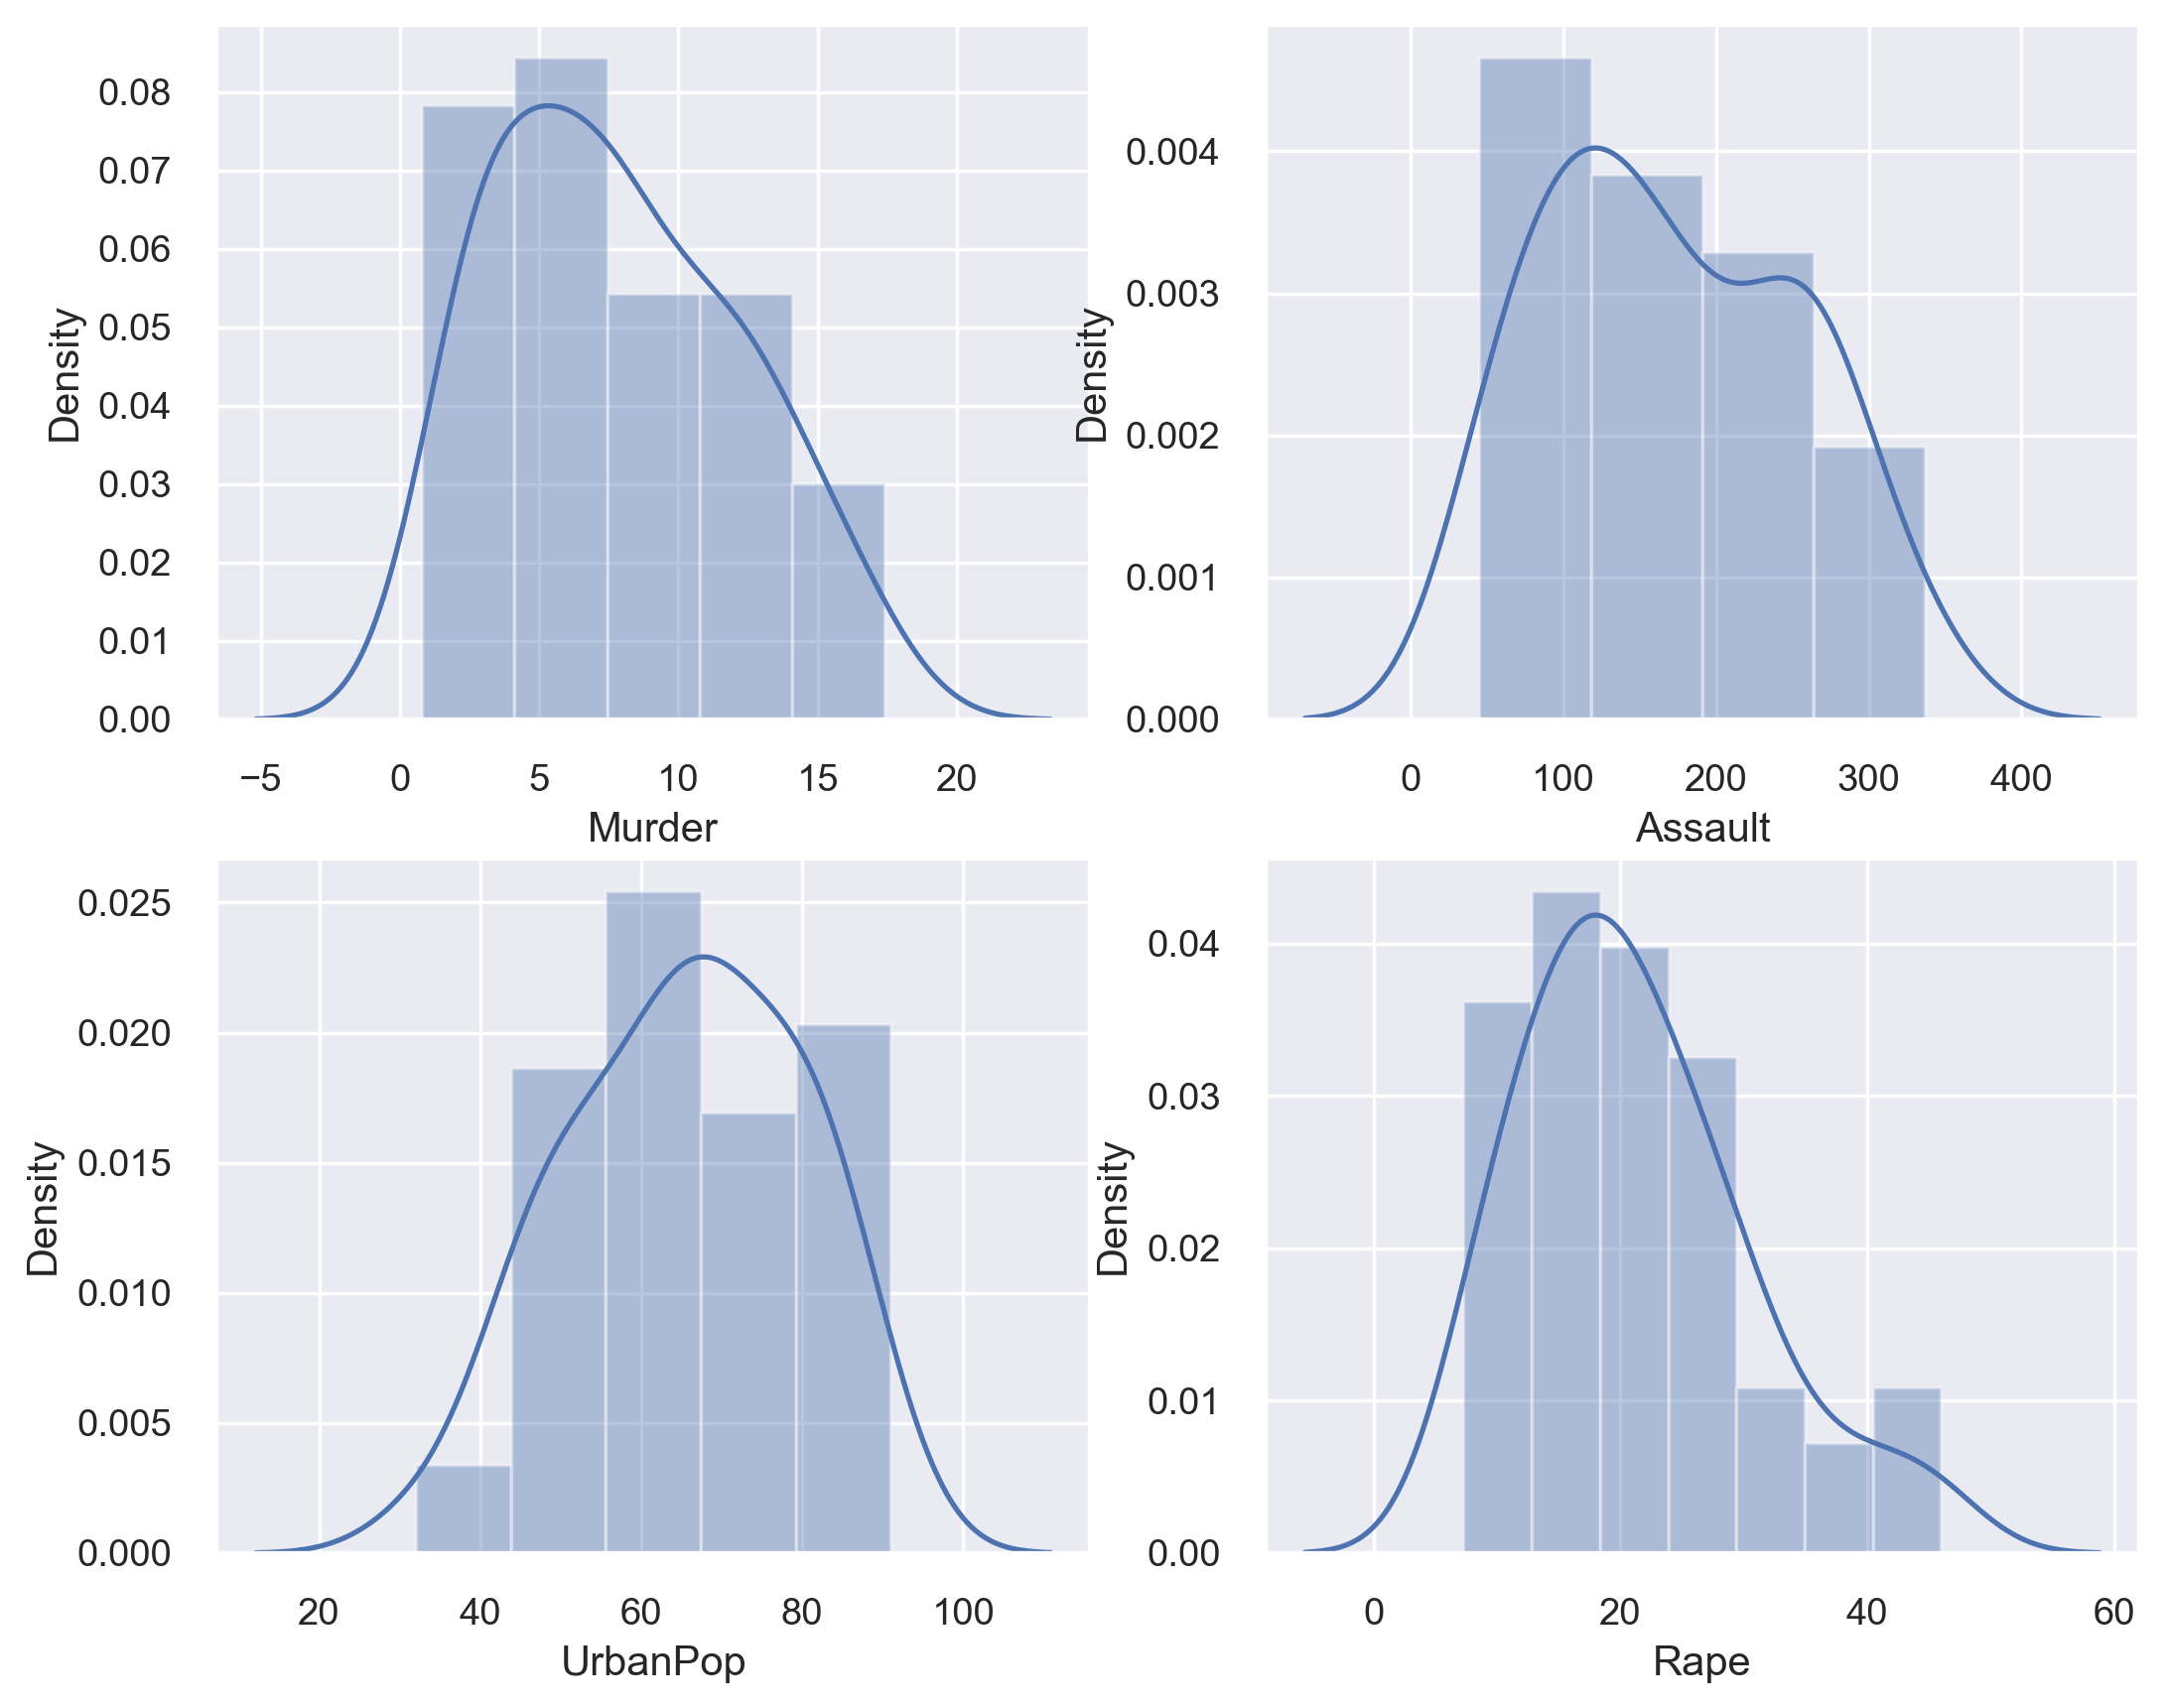

In [56]:
plt.subplot(2,2,1)
sns.distplot(df['Murder'])
plt.subplot(2,2,2)
sns.distplot(df['Assault'])
plt.subplot(2,2,3)
sns.distplot(df['UrbanPop'])
plt.subplot(2,2,4)
sns.distplot(df['Rape'])

* ##### <font color ='green'><u>Heatmap </u>

<Axes: >

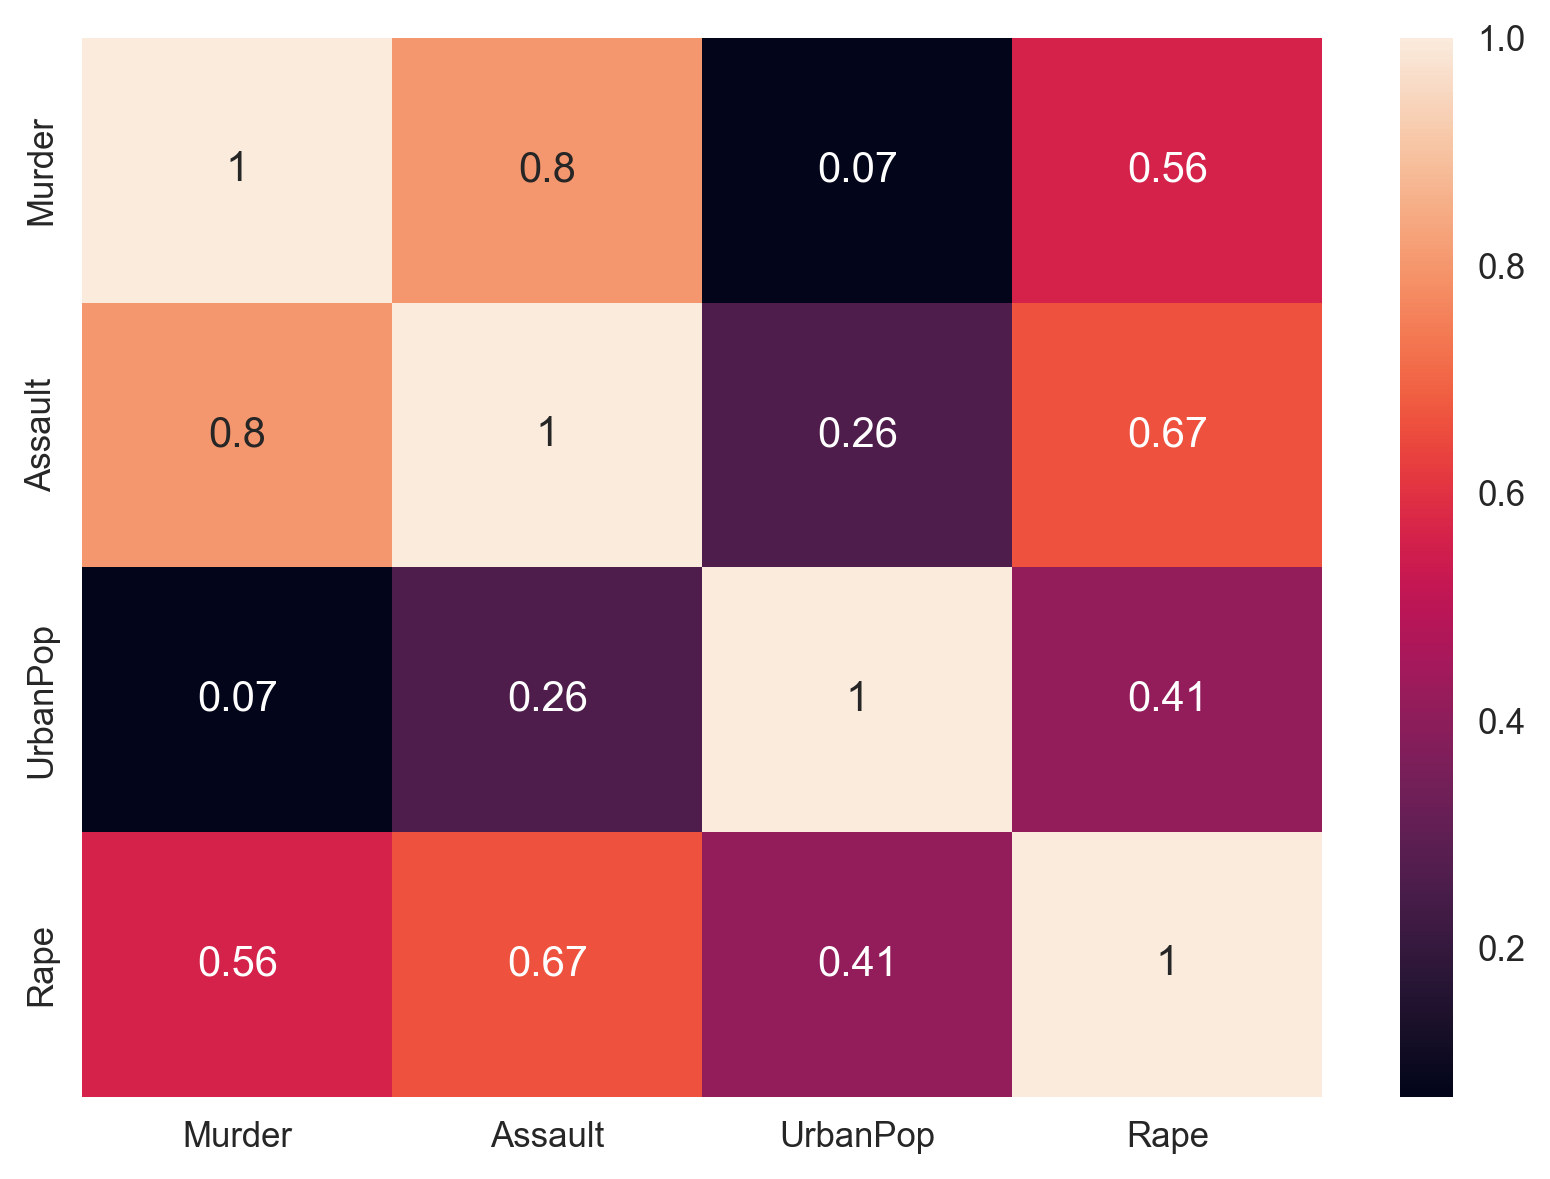

In [10]:
sns.heatmap(df.corr(), annot= True)

* ##### <font color ='green'><u> Scatter Plot </u>

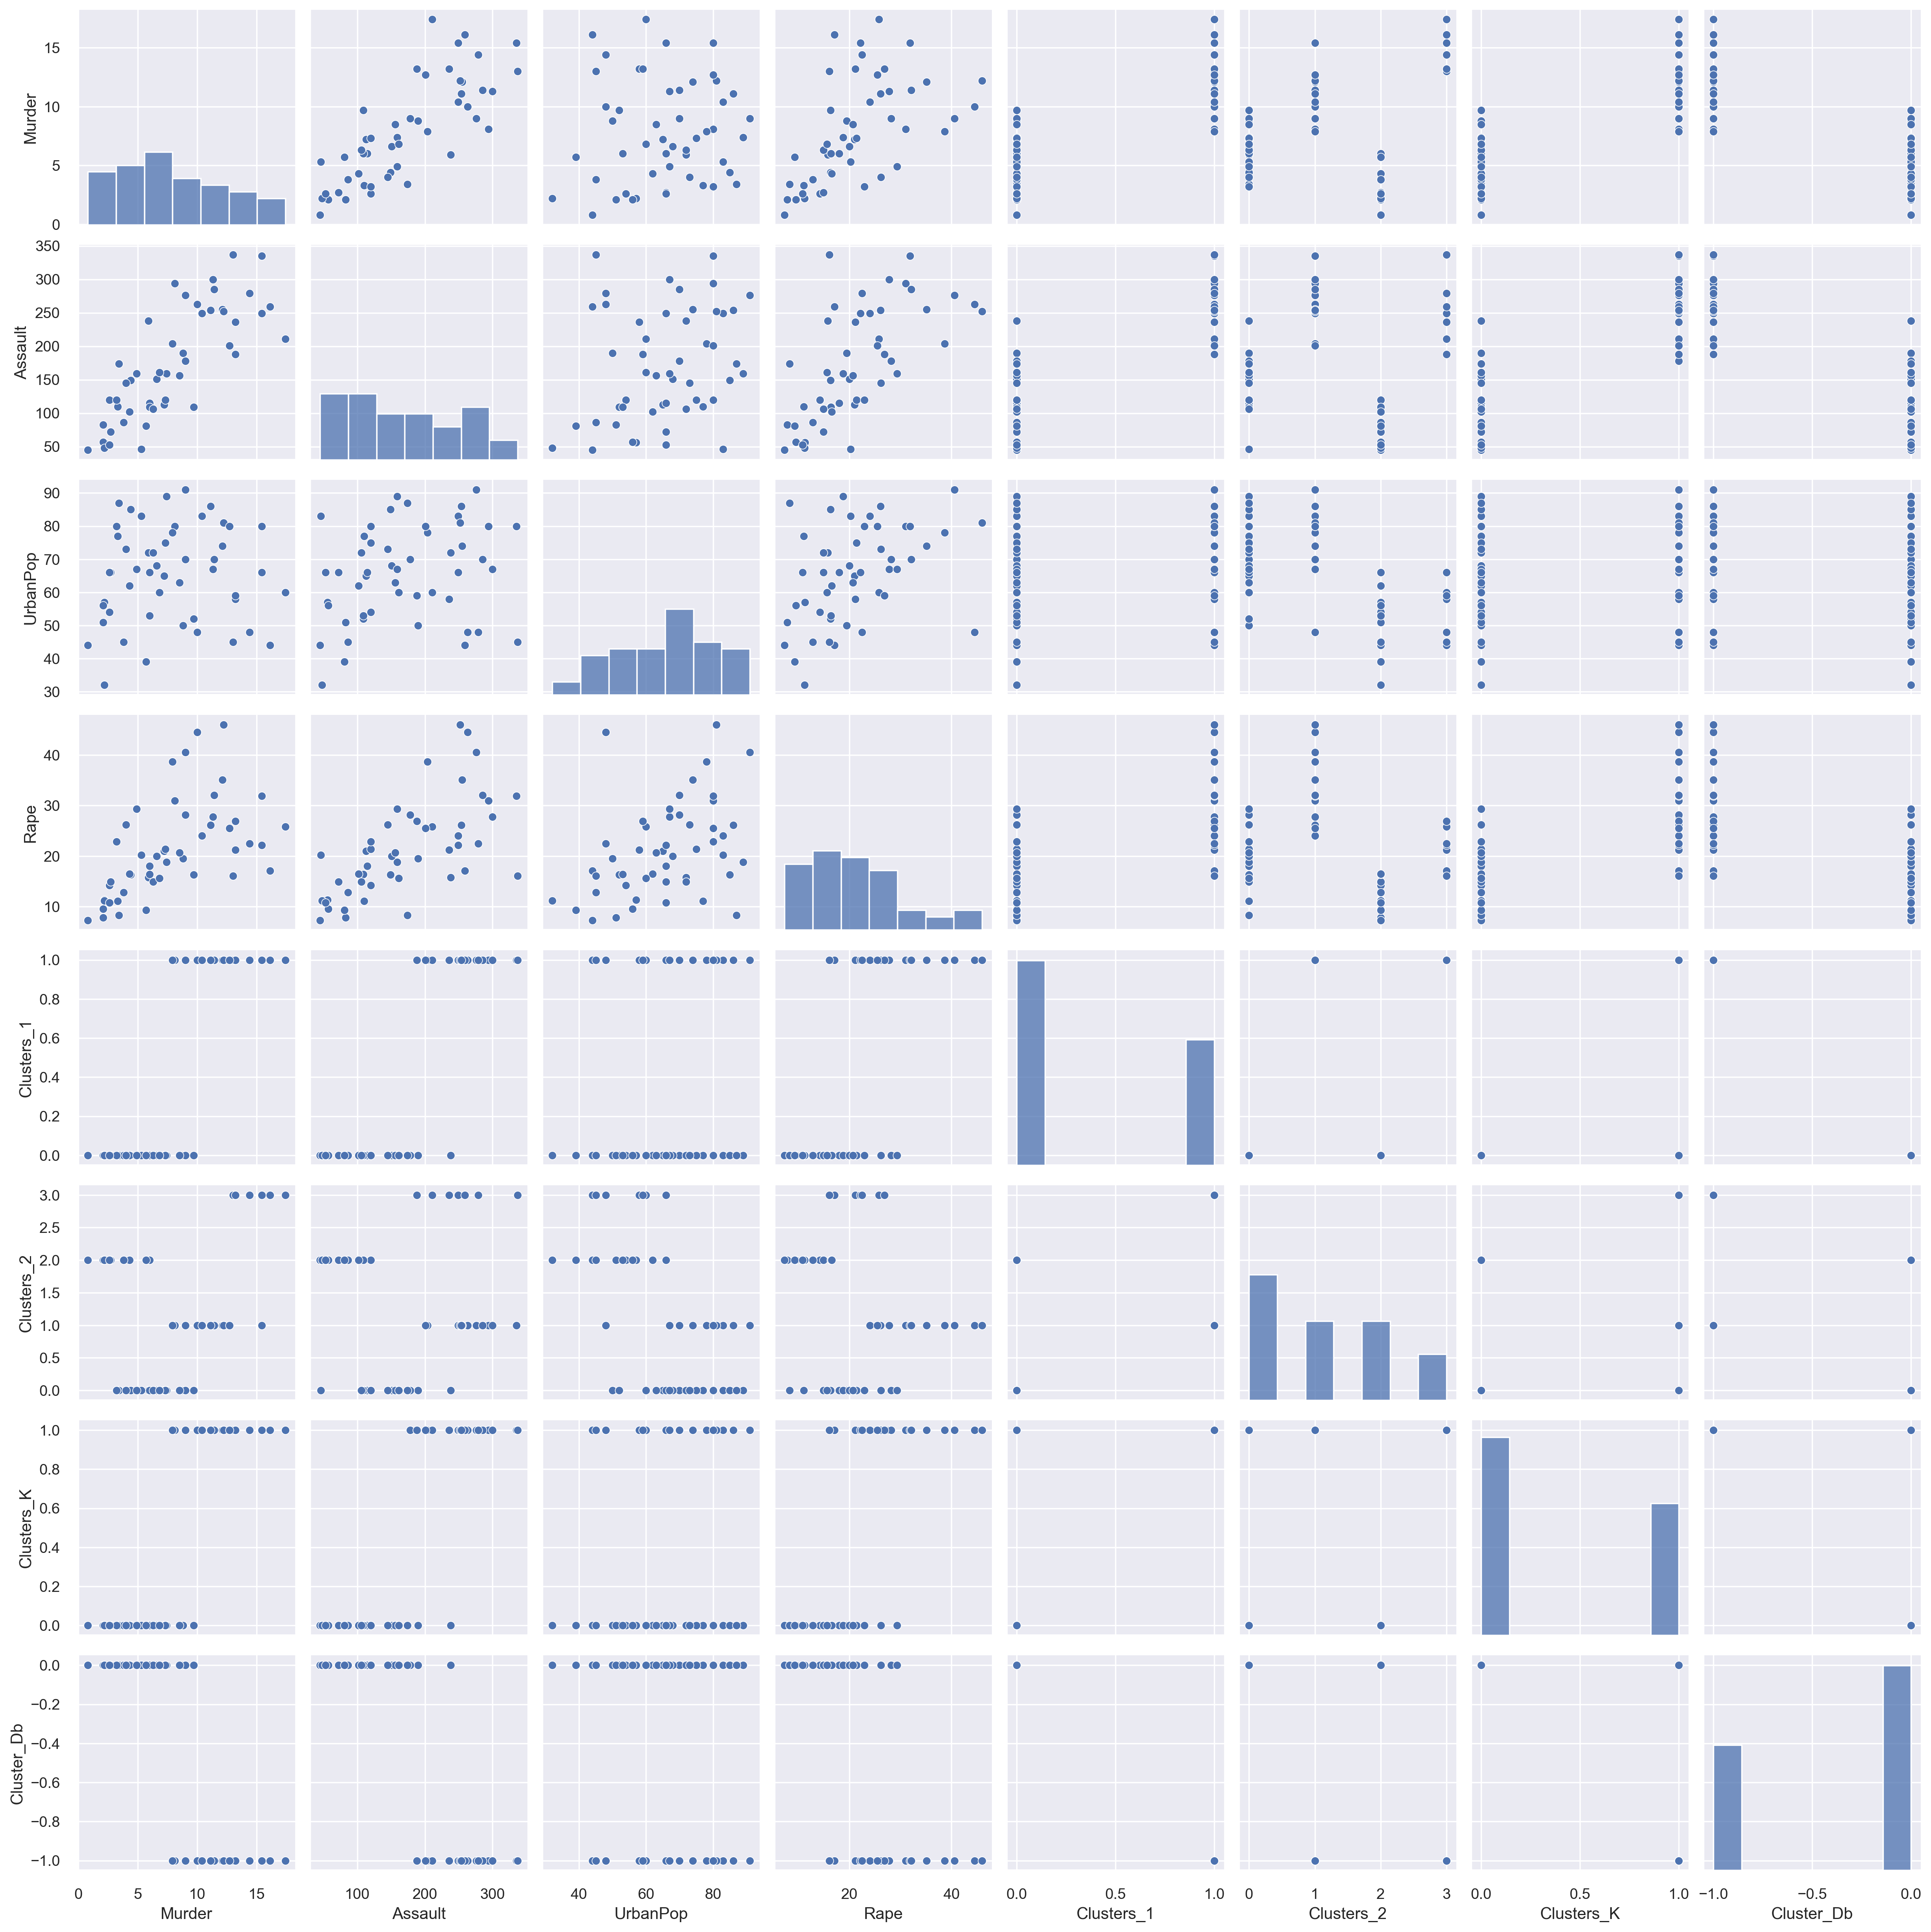

In [57]:
sns.pairplot(df)

* ##### <font color ='green'><u> Box Plot </u>

<Axes: >

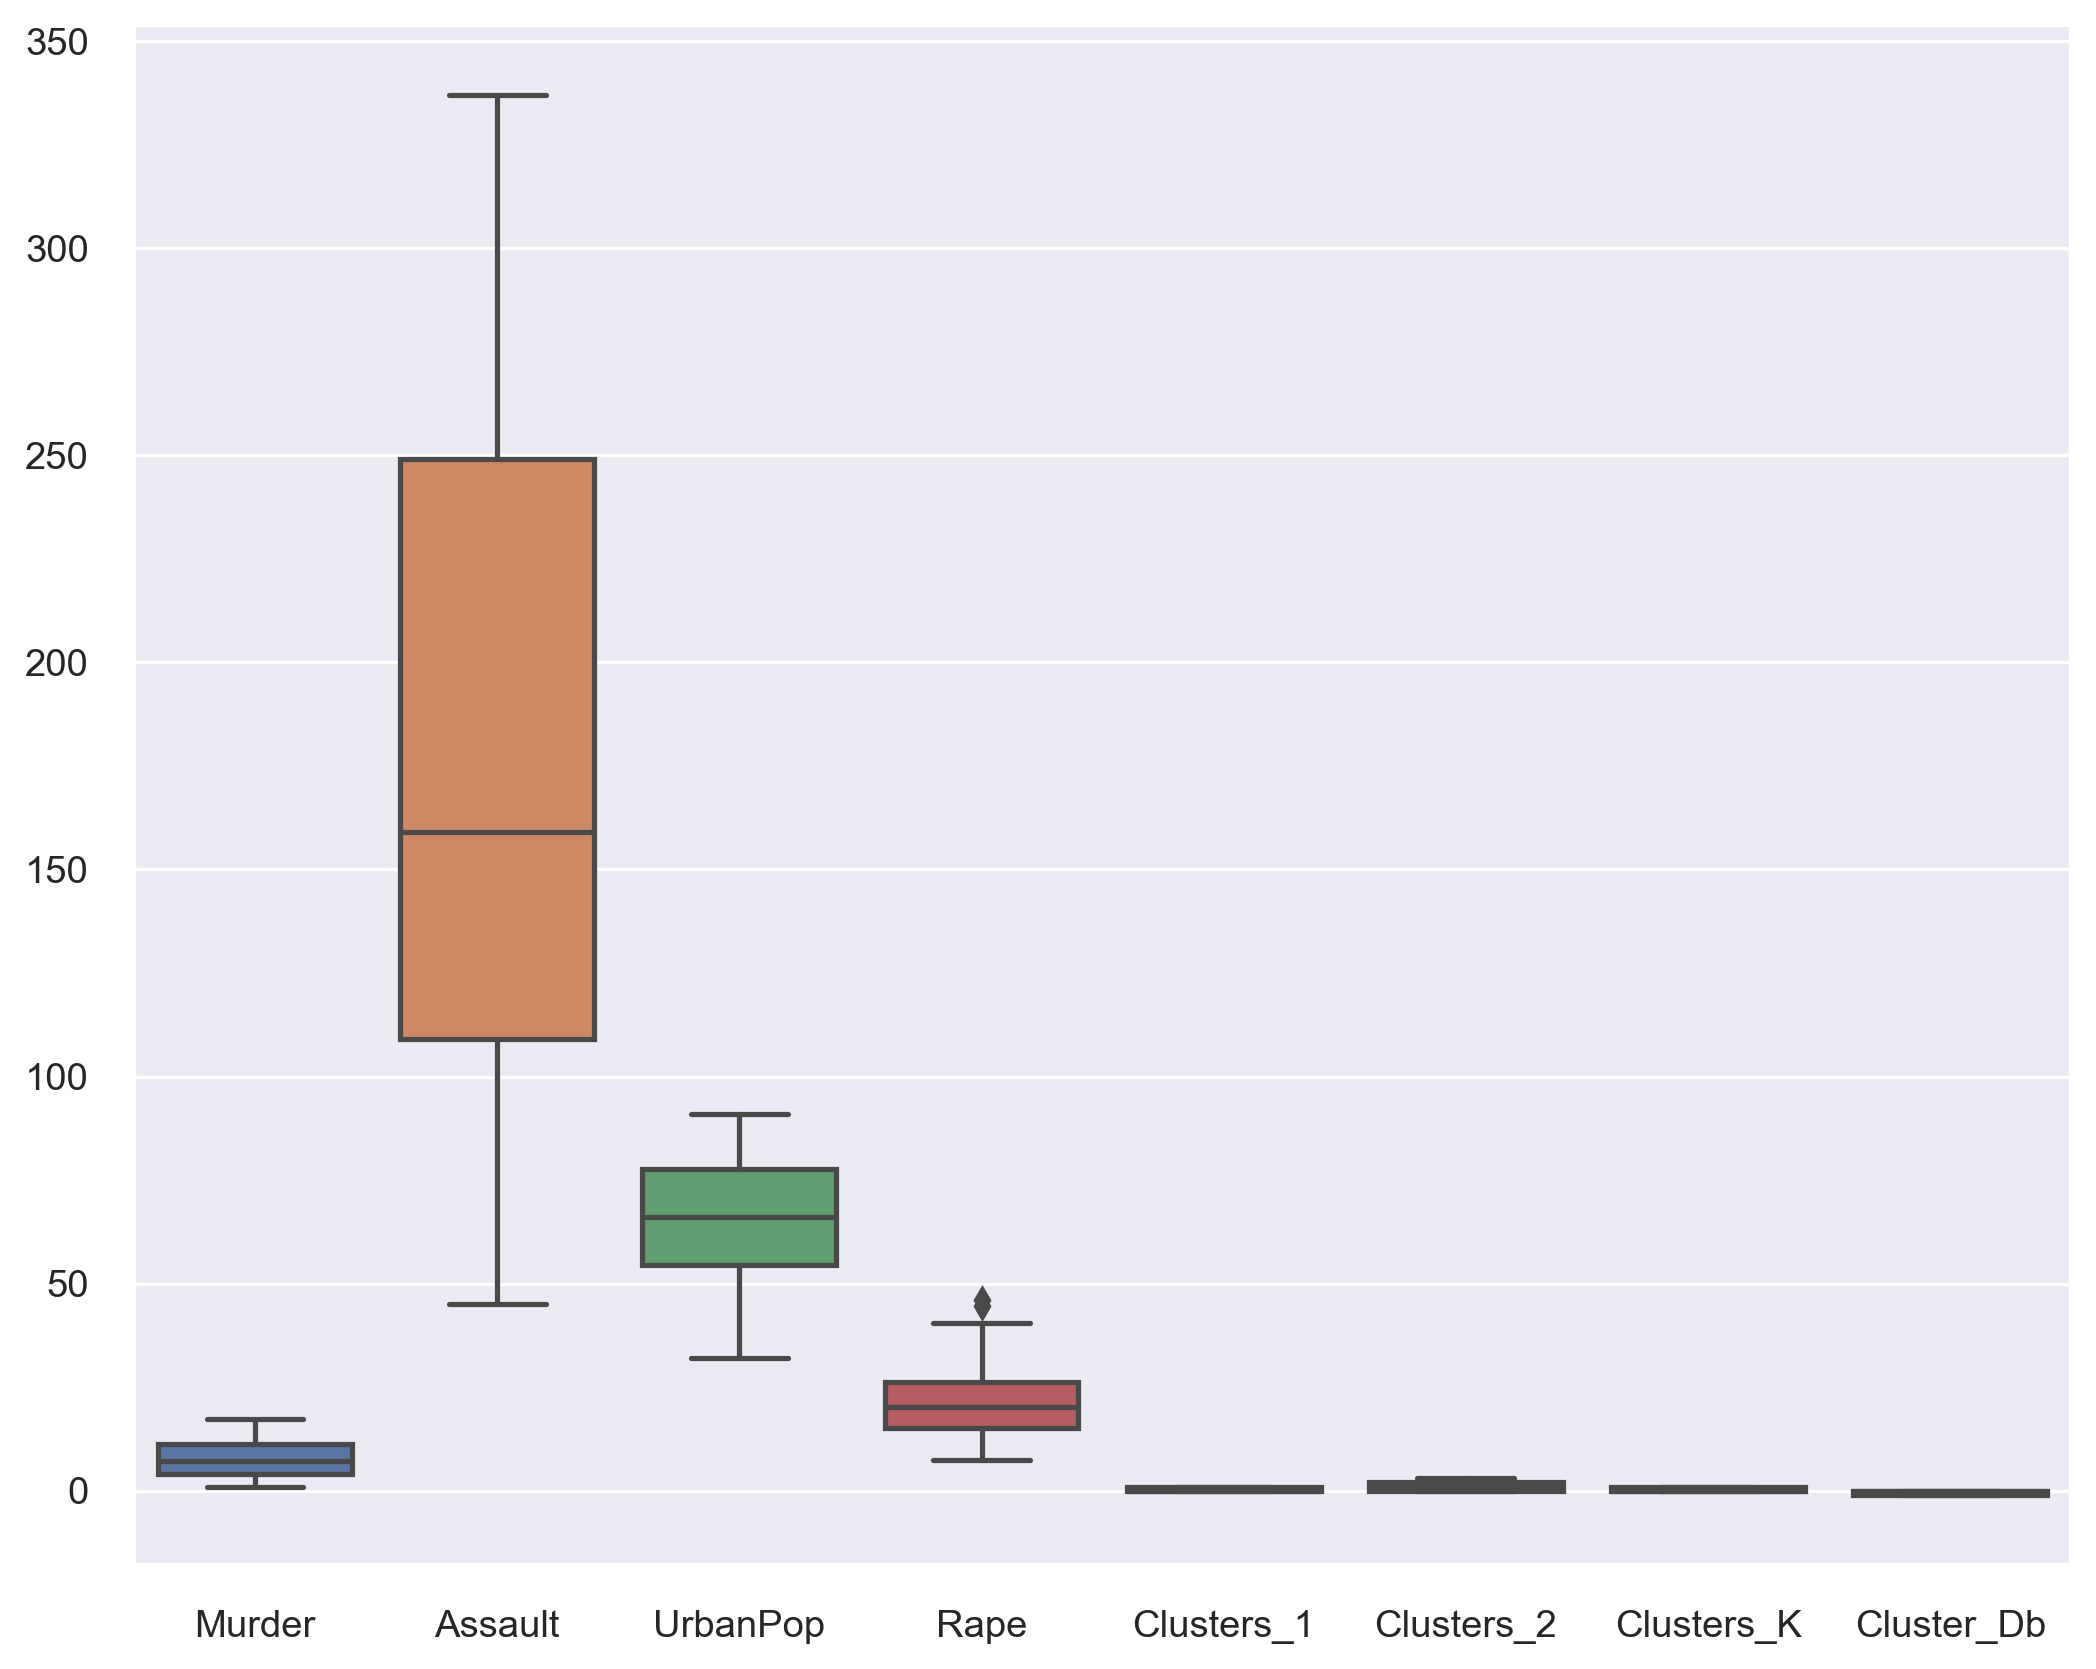

In [58]:
sns.boxplot(df)

> * #### In distribution plot we can see "Rape" is skewed data.  
> * #### In heatmap we can see "Murder" and "Assault" are 80% positively correlated and "Assault" and "Rape" are 67% positively correlated.
> * #### We Can't See any proper clustering of data in scatter plot cause the data is present in 4 dimensions.
> * #### In Boxplot we can see the distribution of data and also in category "Rape" there is prsence of outliers.
> * #### In this Unsupervised machine learing we are going to find the clusters i.e. lables for given data with different types of algorithms.

___

* ### <font color = 'blue'> <u> FEATURE SCALING  </u>

In [13]:
x = df.drop(columns= "States")
x.head()

Murder  Assault  UrbanPop  Rape
0    13.2      236        58  21.2
1    10.0      263        48  44.5
2     8.1      294        80  31.0
3     8.8      190        50  19.5
4     9.0      276        91  40.6

In [14]:
# Standardisation:
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

___

* ### <font color = 'blue'> <u> MODEL BUILDING </u>

[GO TO TOP](#0.1) 

## <font color = 'magenta'> 1. <u>HIERARCHIAL CLUSTERING ALGORITHM </u><a class="anchor" id="1"></a>

* ##### <font color = "candy"> Hierarchial Clustering </font>is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. It is a data mining technique that groups similar objects into clusters. The clusters are visually represented in a hierarchical tree called a dendrogram.

* ##### <font color = "candy"> Types of hierarchical clustering:
    
    + <b>Agglomerative</b>: This is bottom-up approach of clustering cause the cluster creation started with calculating the distance between the data points.
    + <b>Divisive</b>: This is top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.
    
* #### Here we go with Agglomerative clustering with different methods of Linkages.
    
* #### Linkages Calculates the distance between data-points and clusters.
    
* #### To visualise them we plot these distances using dendrogram and see whether they can able to create and differentiate between clusters clearly.

 ### <font color ='green'> ➡ <u>Types of Linkages</u>

* #### Single Linkage
* #### Complete Linkage
* #### Average Linkage
* #### Centroid Linkage
* #### Ward Linkage
* #### Weighted Linkage
* #### Median Linkage 

* ### <font color ='olive'><u> Dendrogram </u>
    * #### To visualise how many number of clusters should be there we plot dendrogram. Cut at longest vertical line gives us number of clusters we should create.

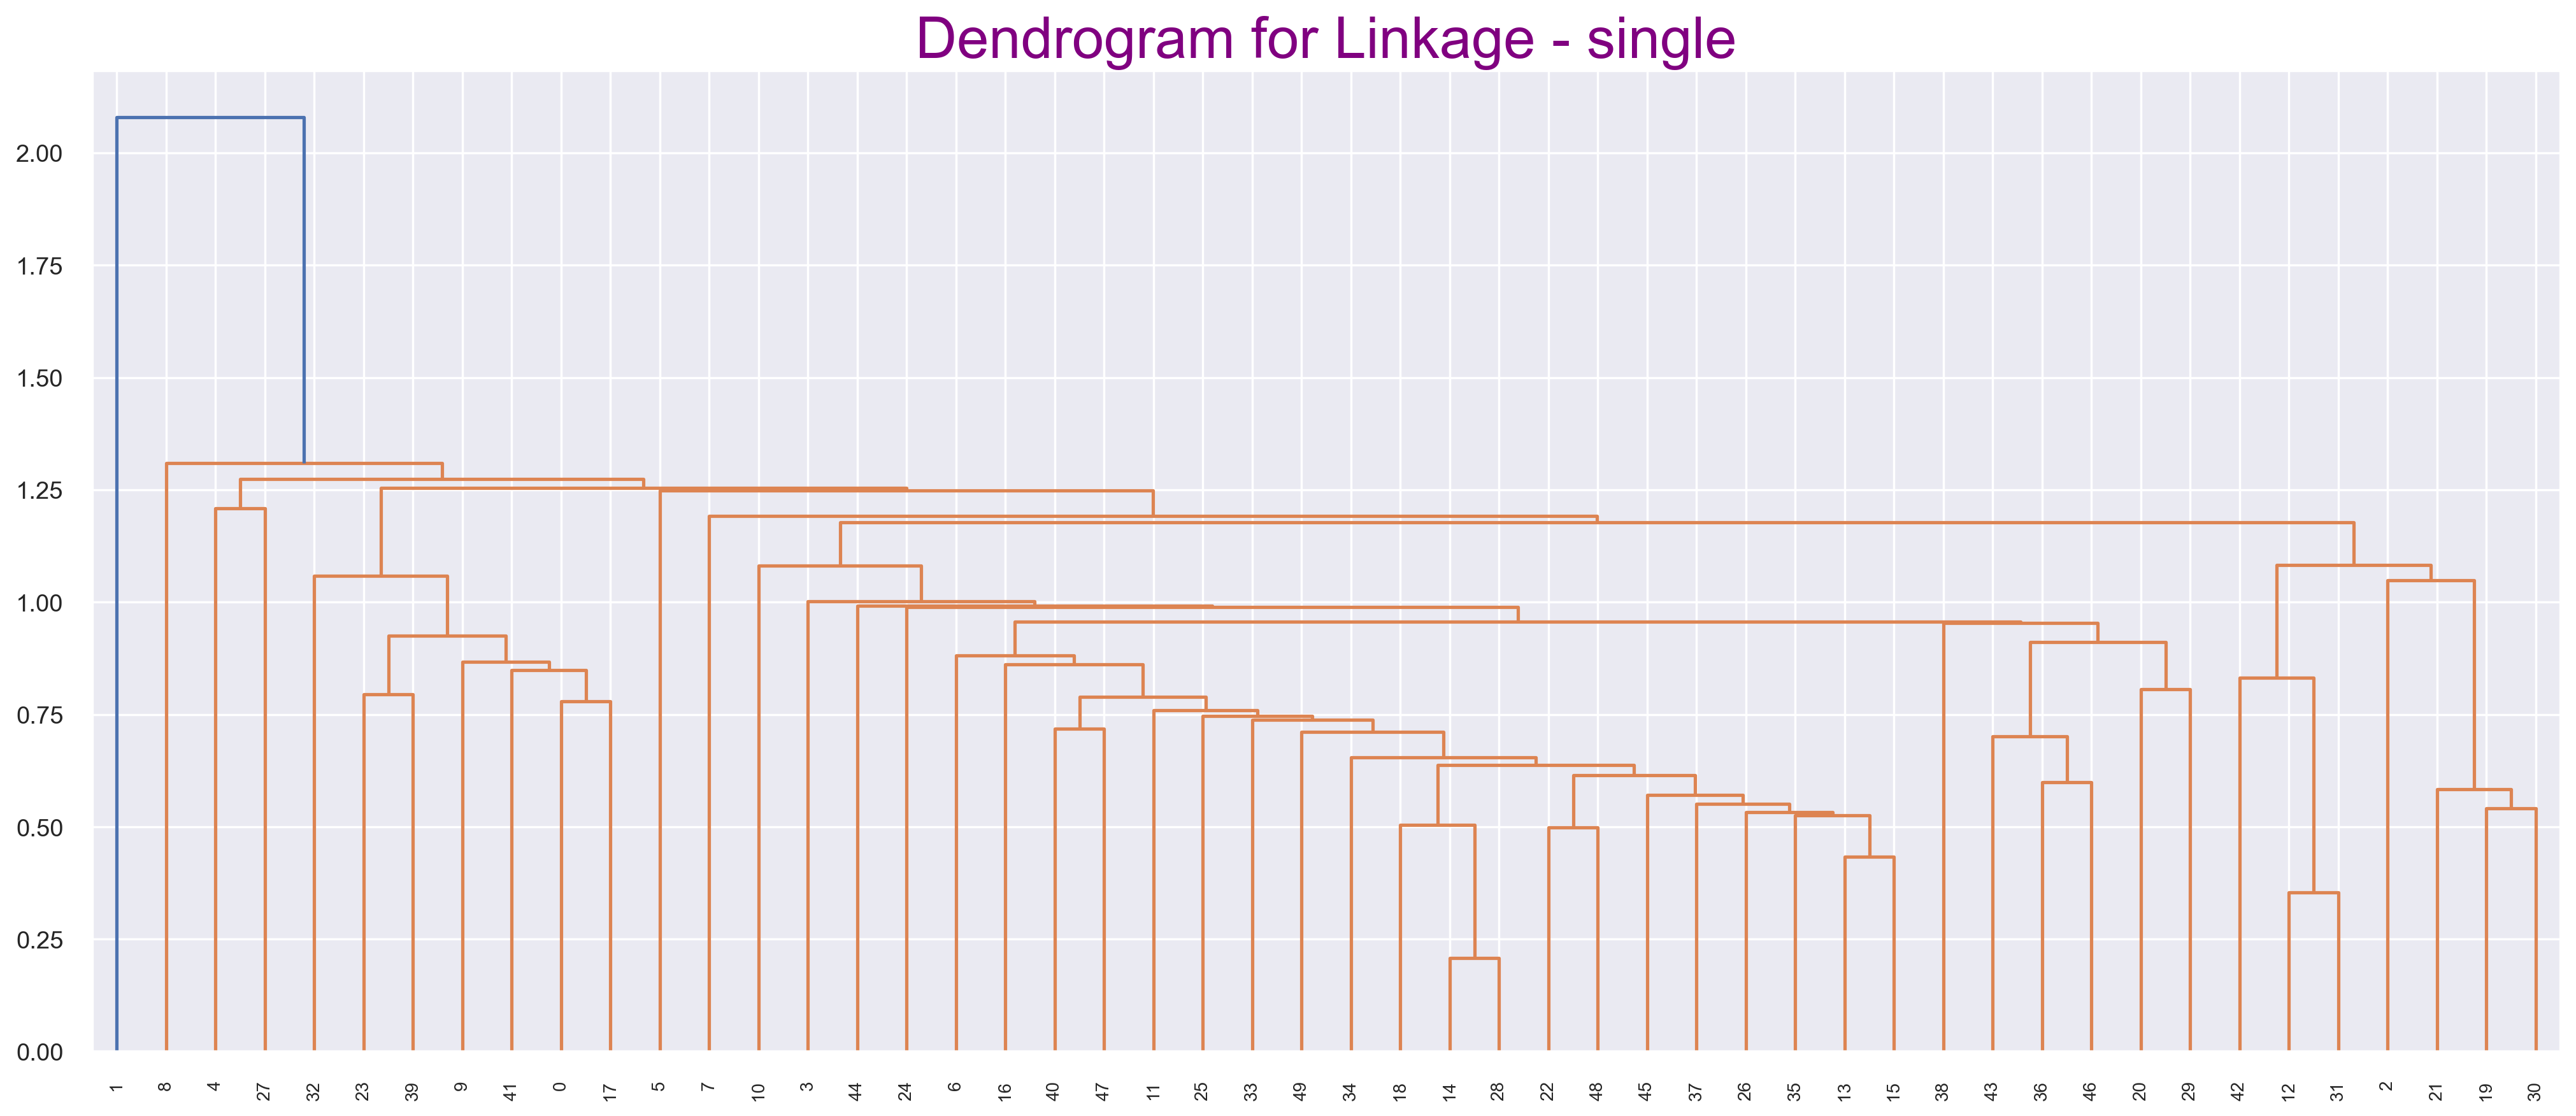

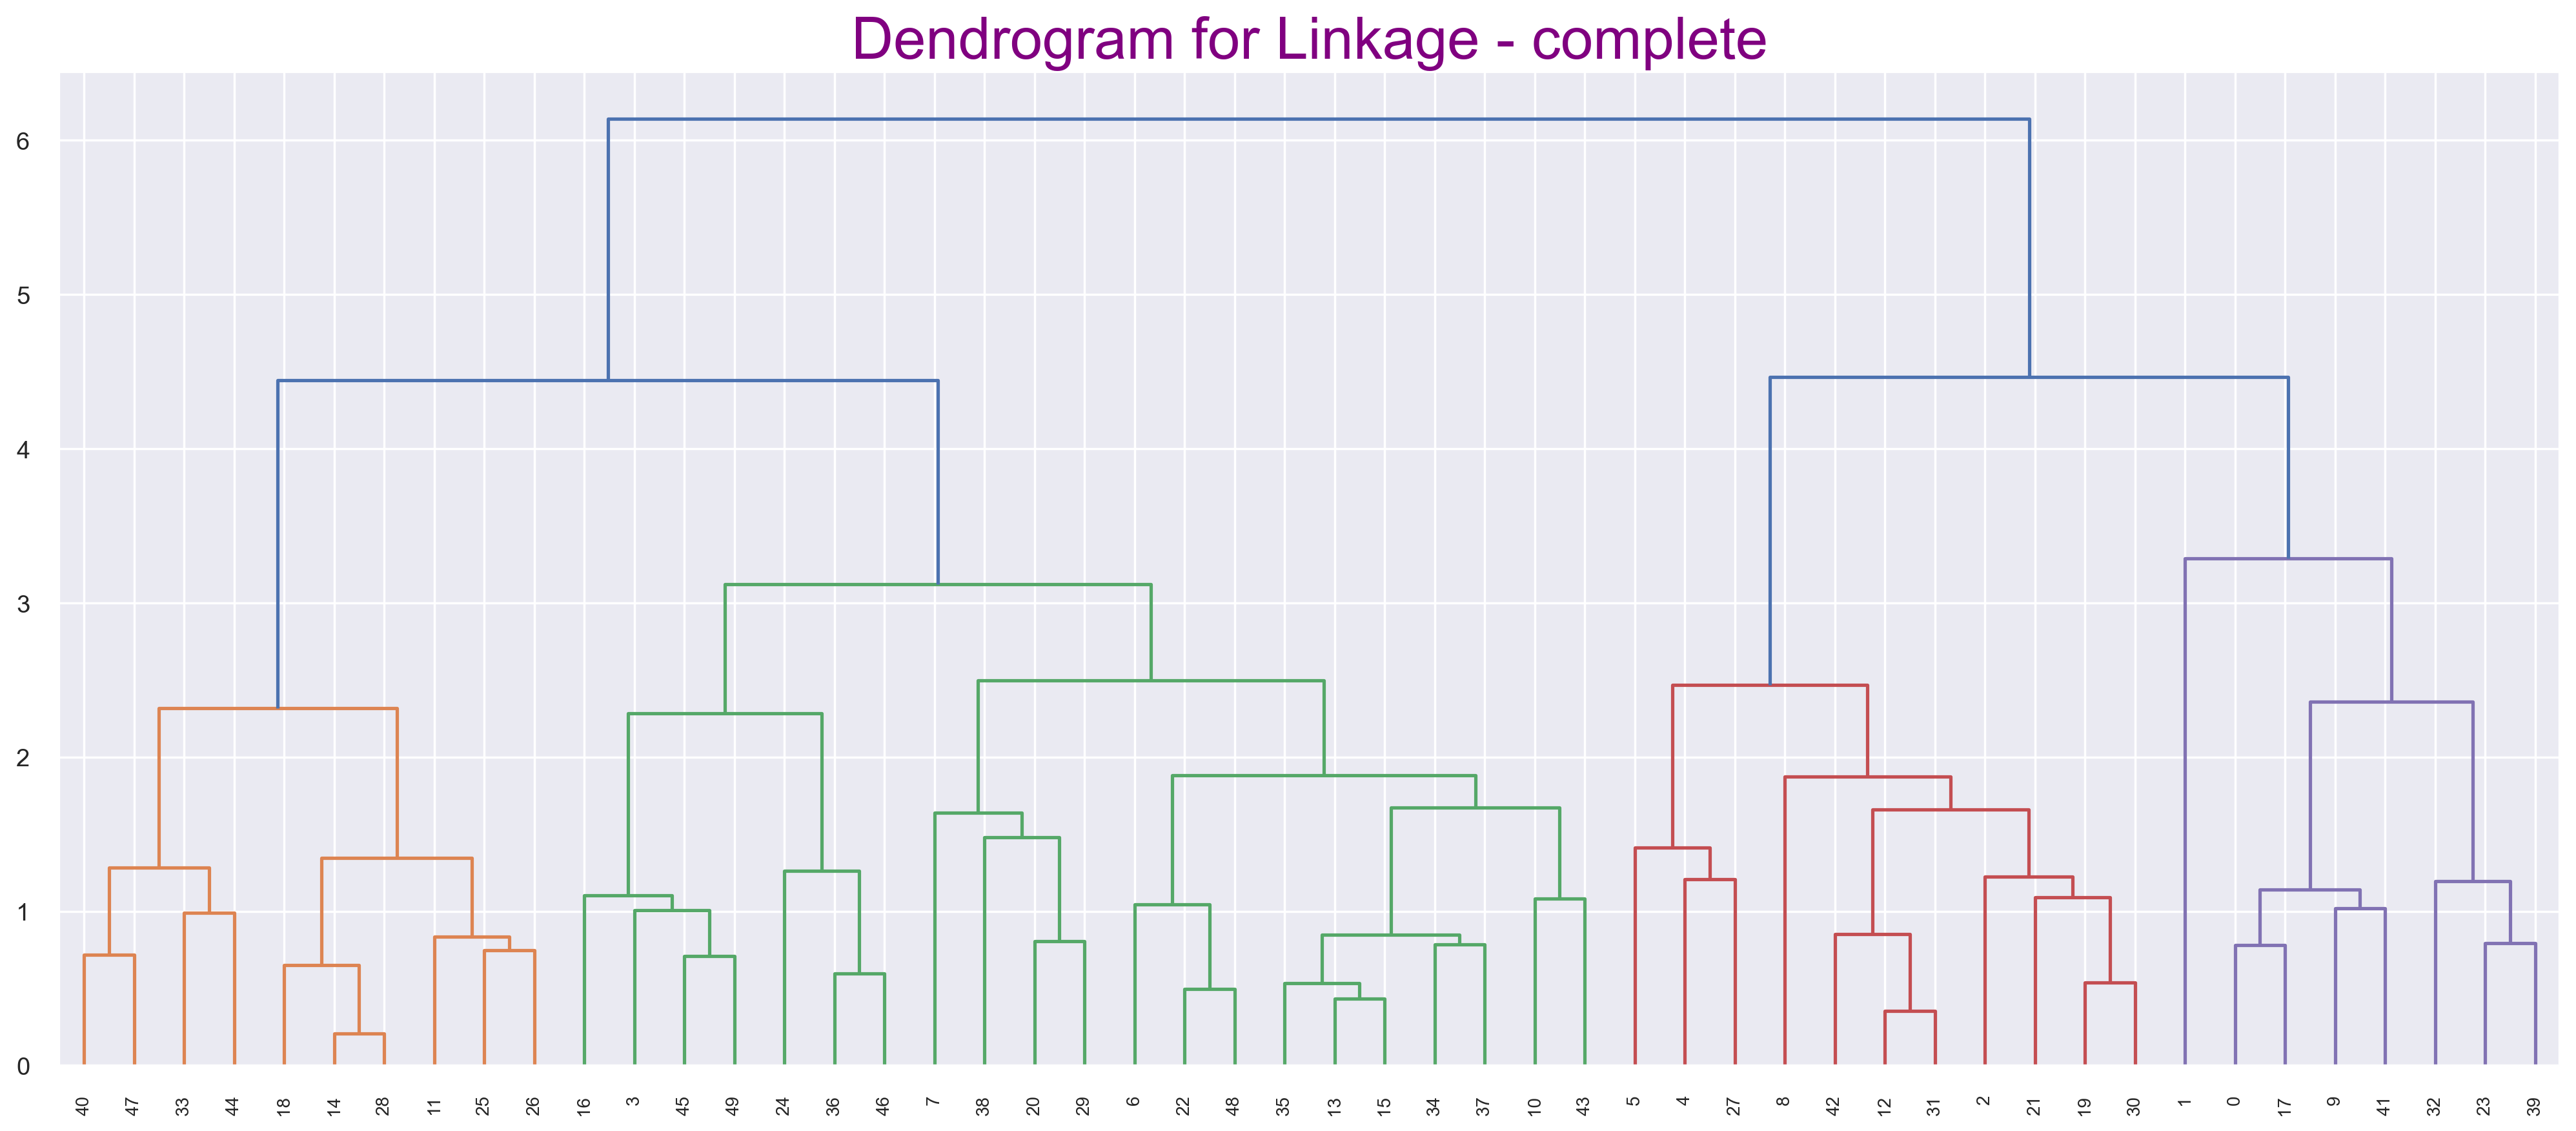

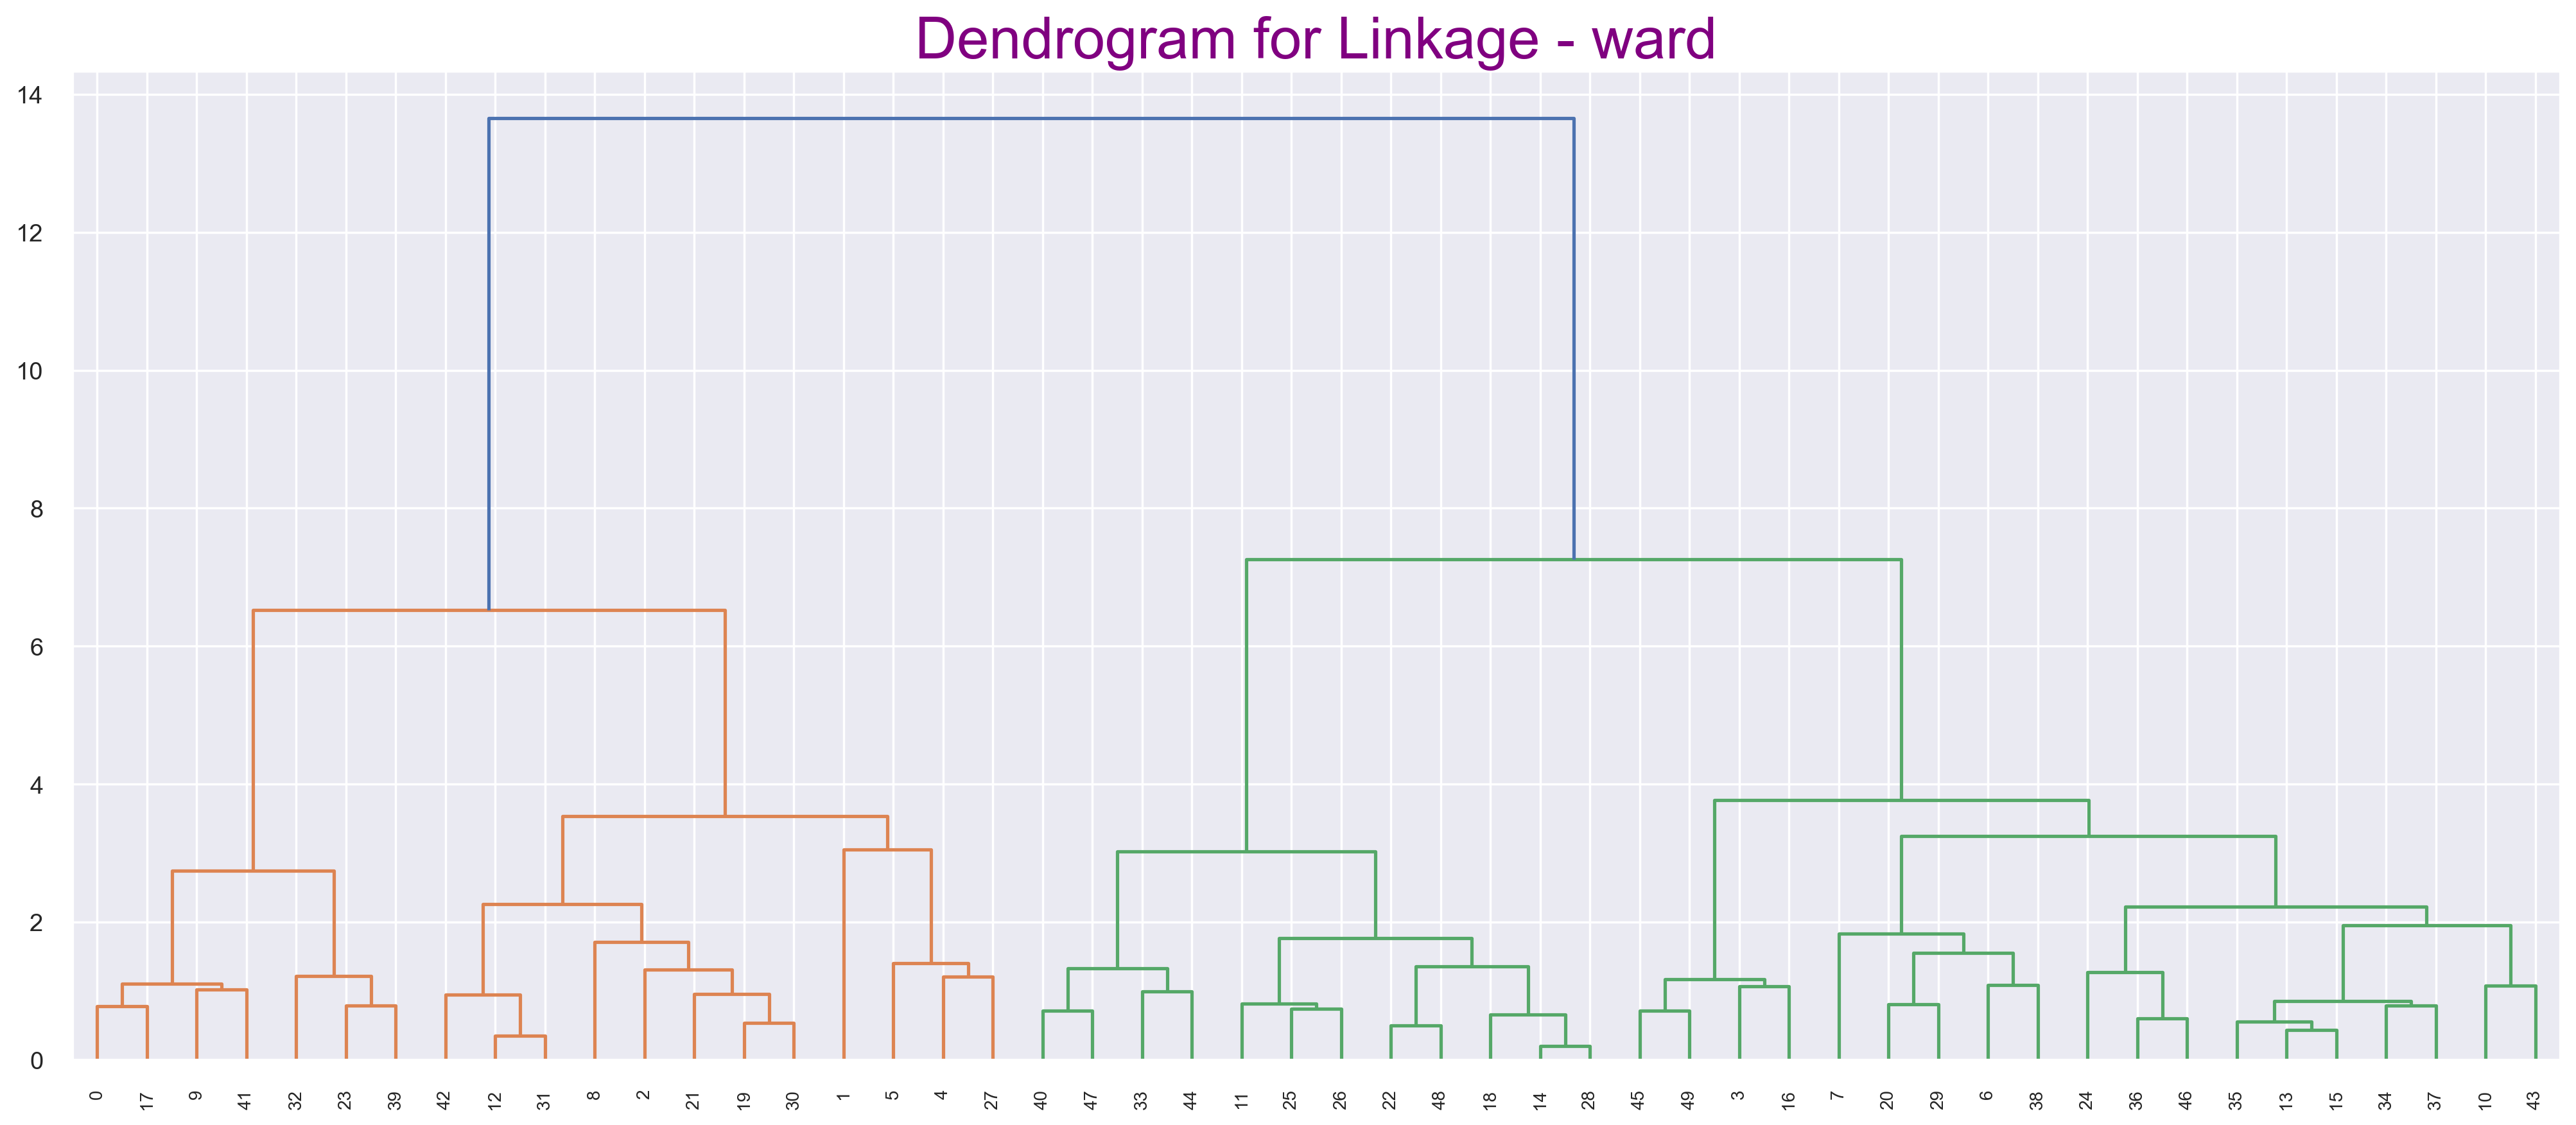

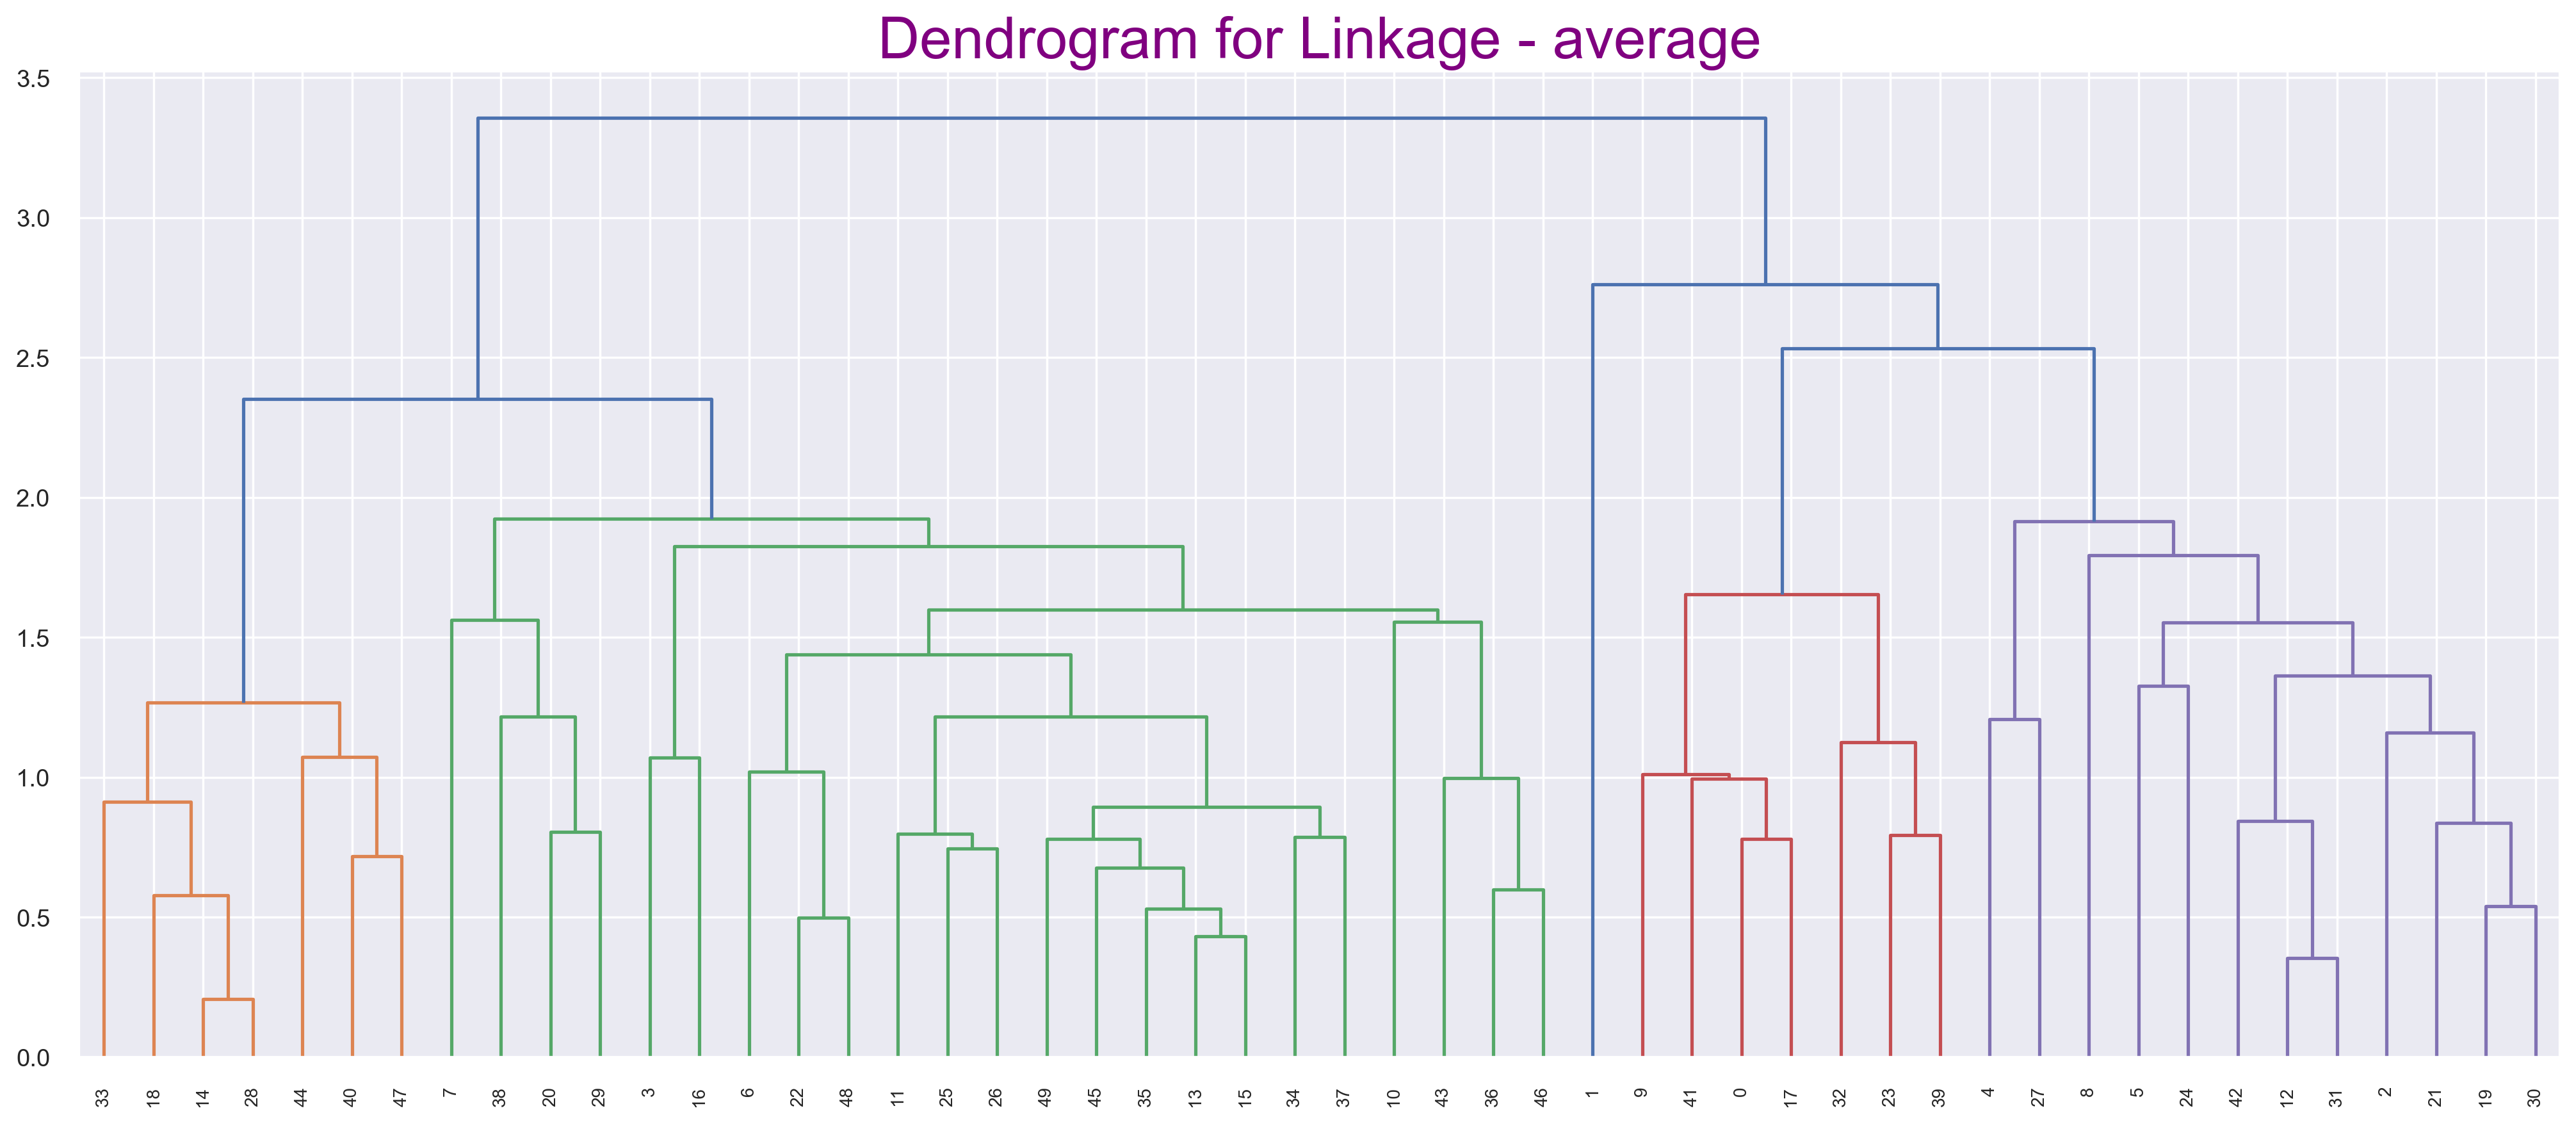

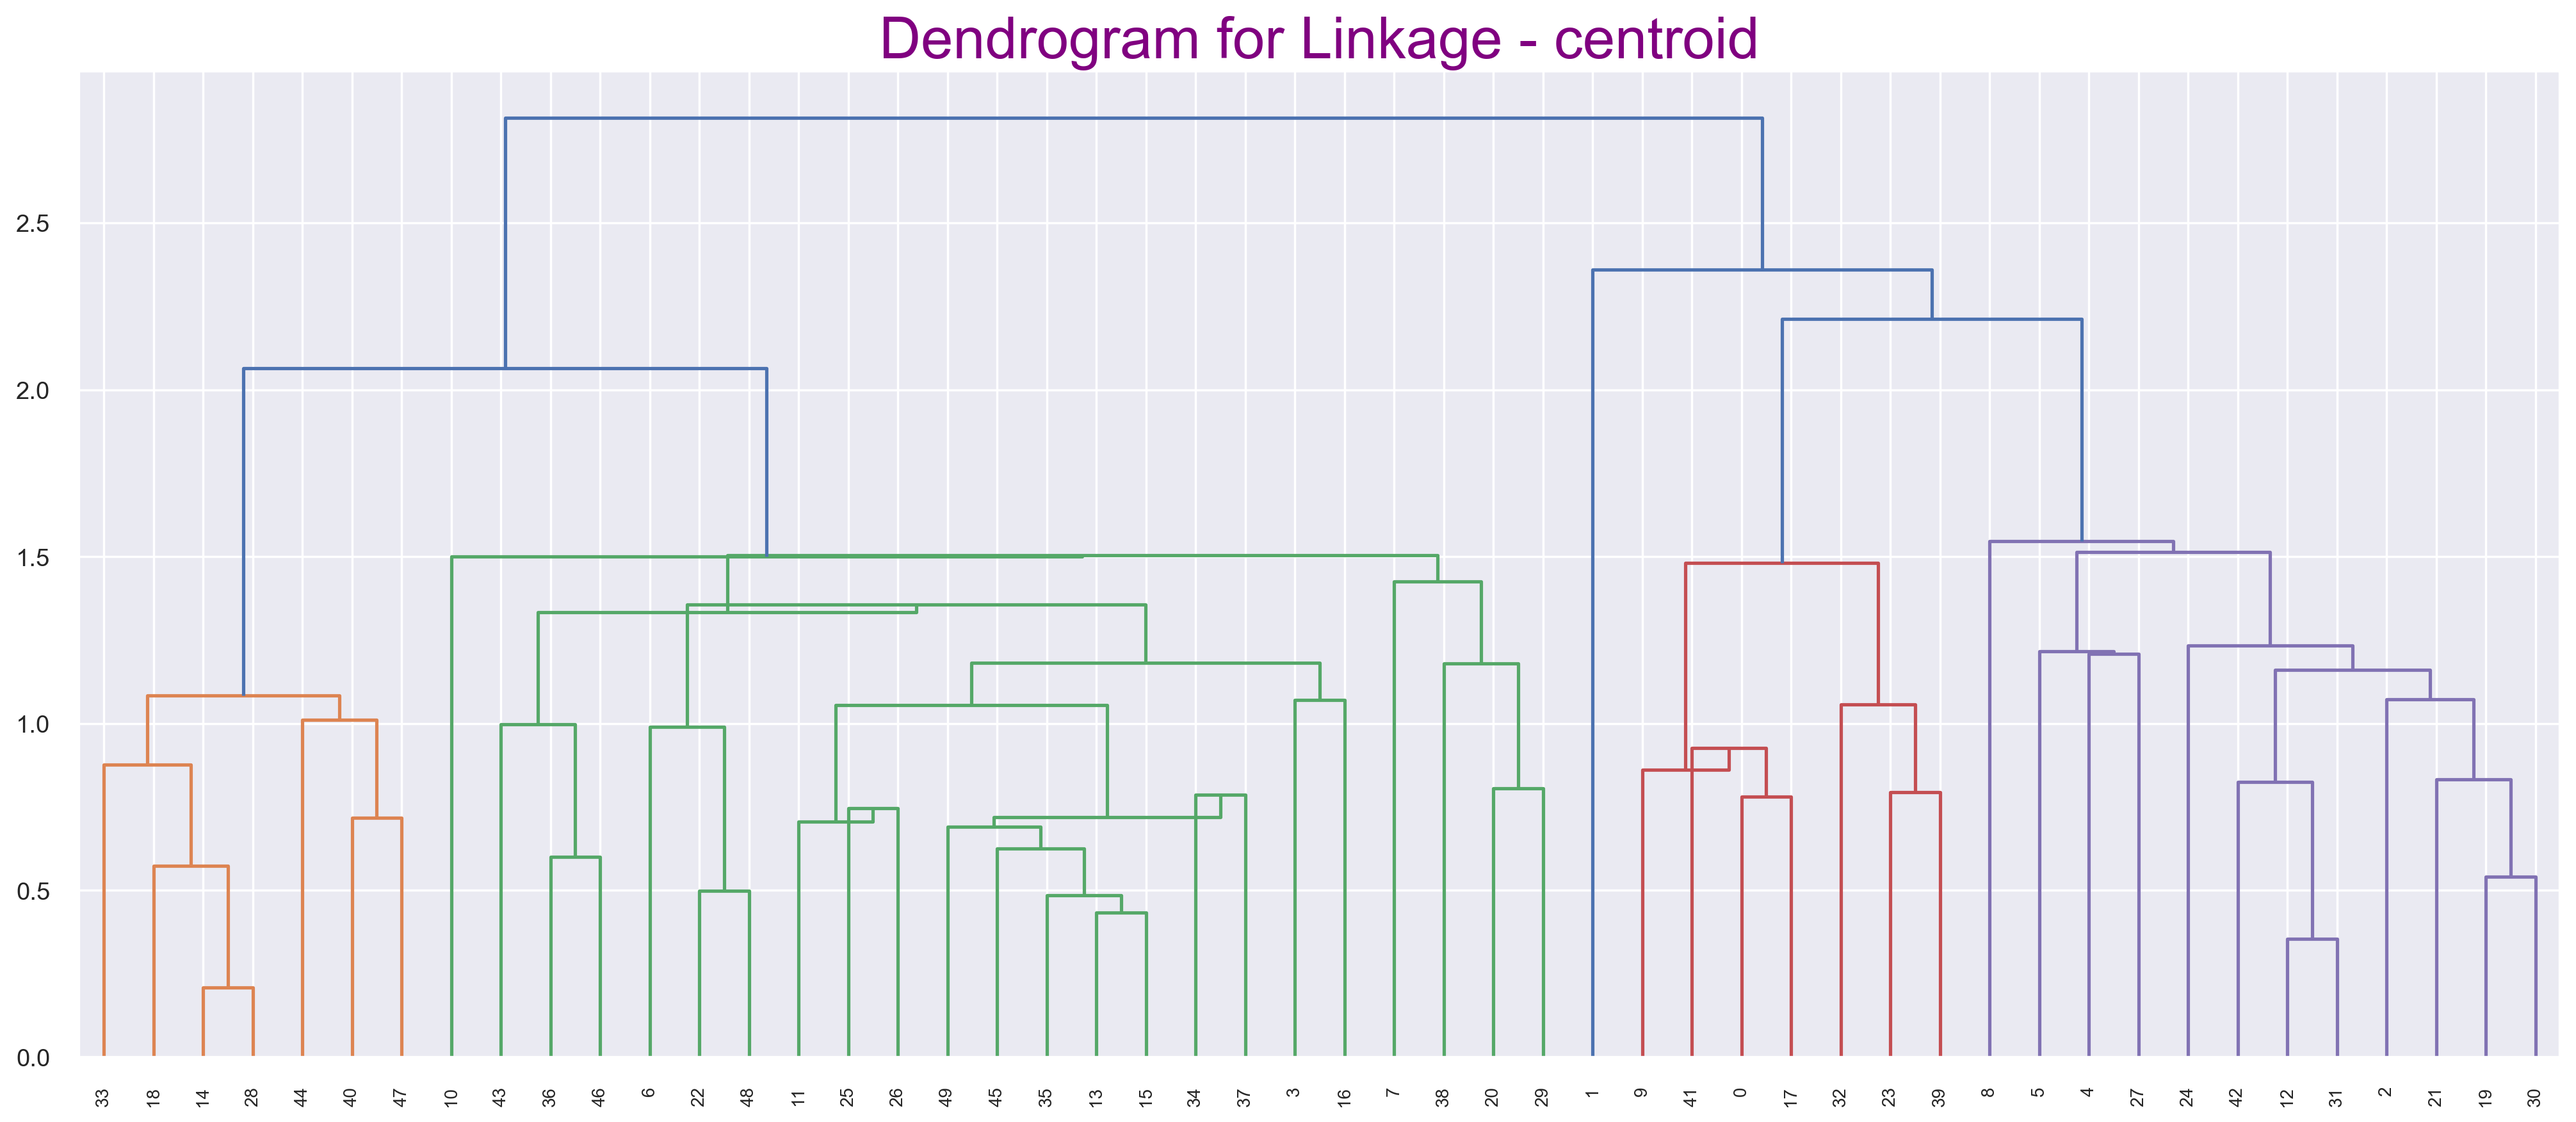

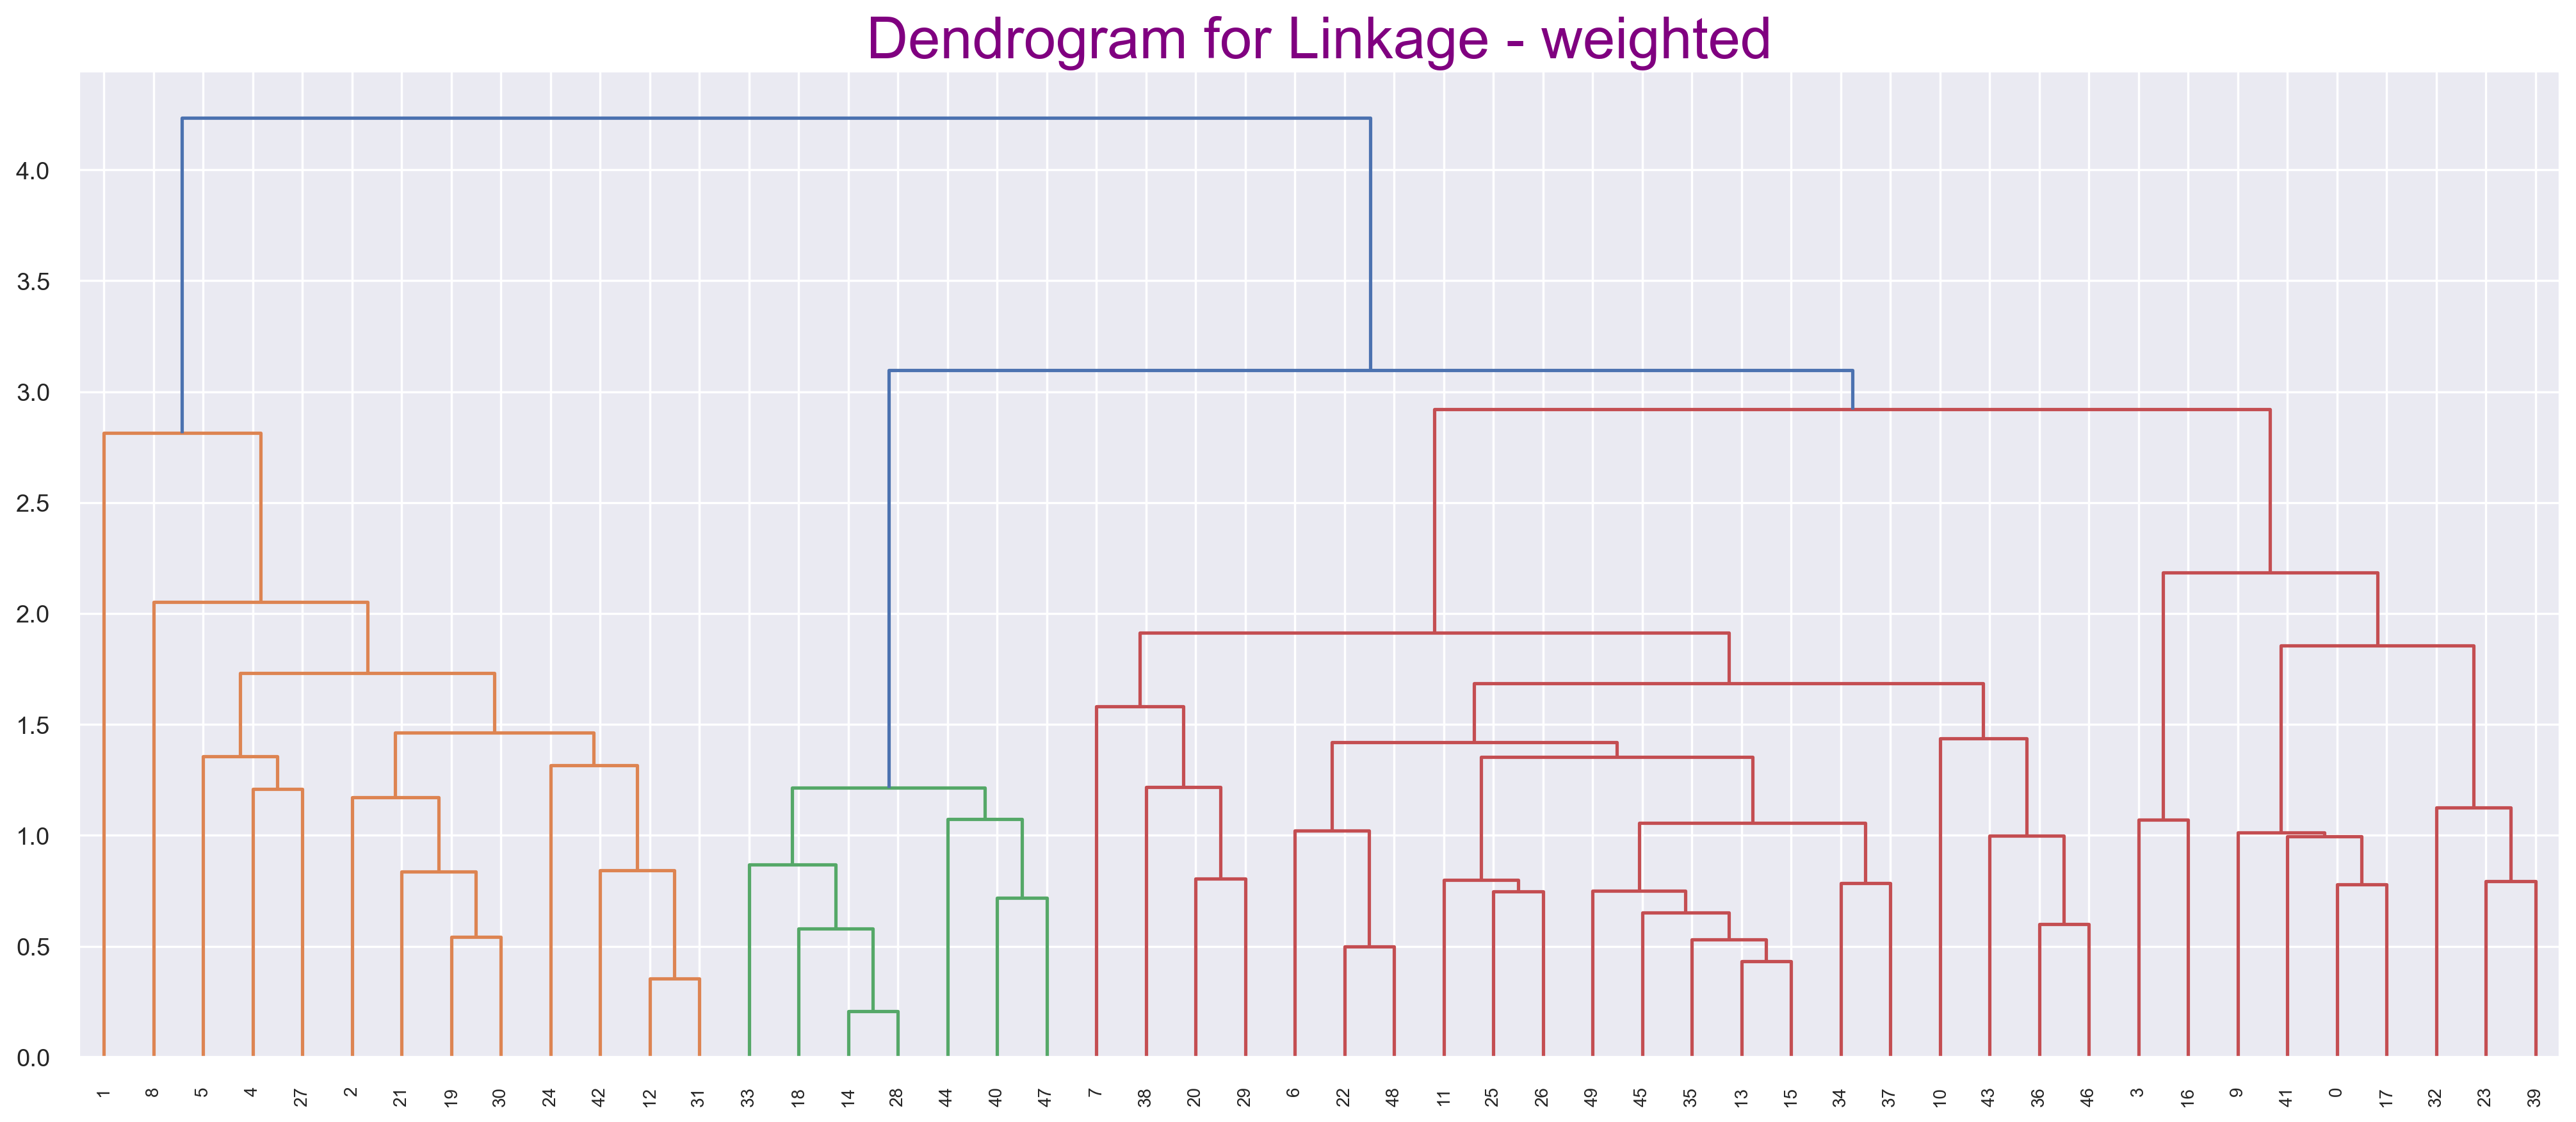

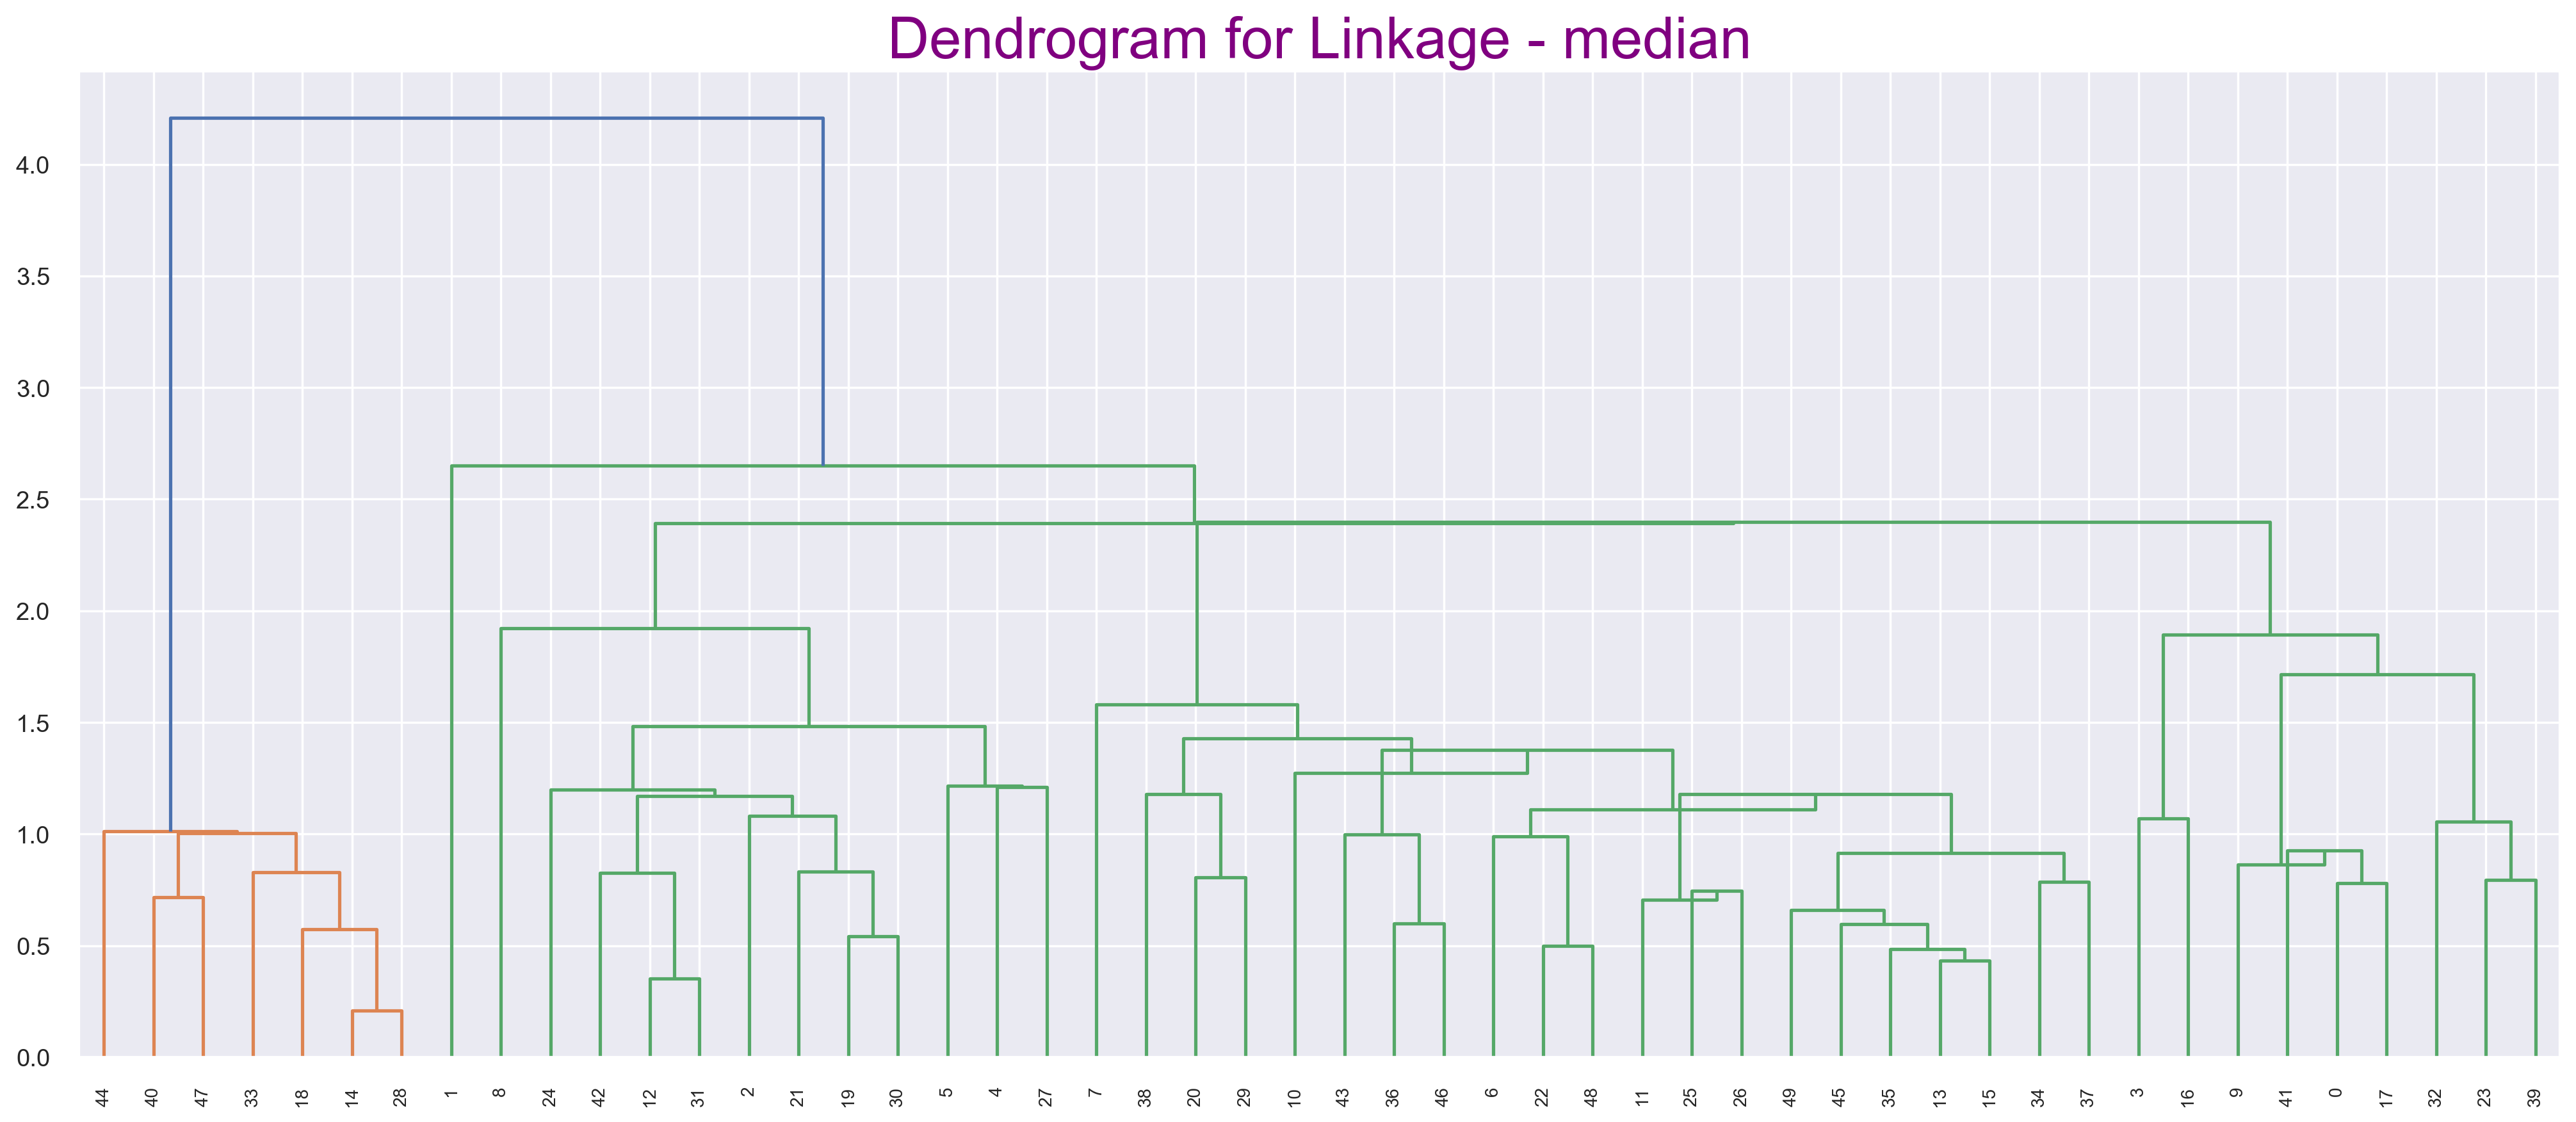

In [59]:
for methods in ['single','complete','ward','average','centroid','weighted','median']:
    plt.figure(figsize =(20, 8)) 
    
    dict = {'fontsize':26,'fontweight' :20, 'color' : 'purple'}
    plt.title('Dendrogram for Linkage - {}'.format(methods), fontdict = dict)
    denrograms_other = sch.dendrogram(sch.linkage(x_sc, method = methods,optimal_ordering= False))

> * #### Here with single linkage method algorithm we unable to distingwish between the groups. Clusters are very close to each other. They are overlapping cause Single Linkages consider minimum distances between the data point and the cluster.
> * #### In other remaining dendrograms we can see all of them created 4 clusters.
> * #### In Complete linkage method we can see clear distingwish between 2 major clusters further divided into 4 clusters.
> * #### So we go with Complete Linkage Method.

### <font color ='green'> ➡ <u> Complete Linkage Method </u>

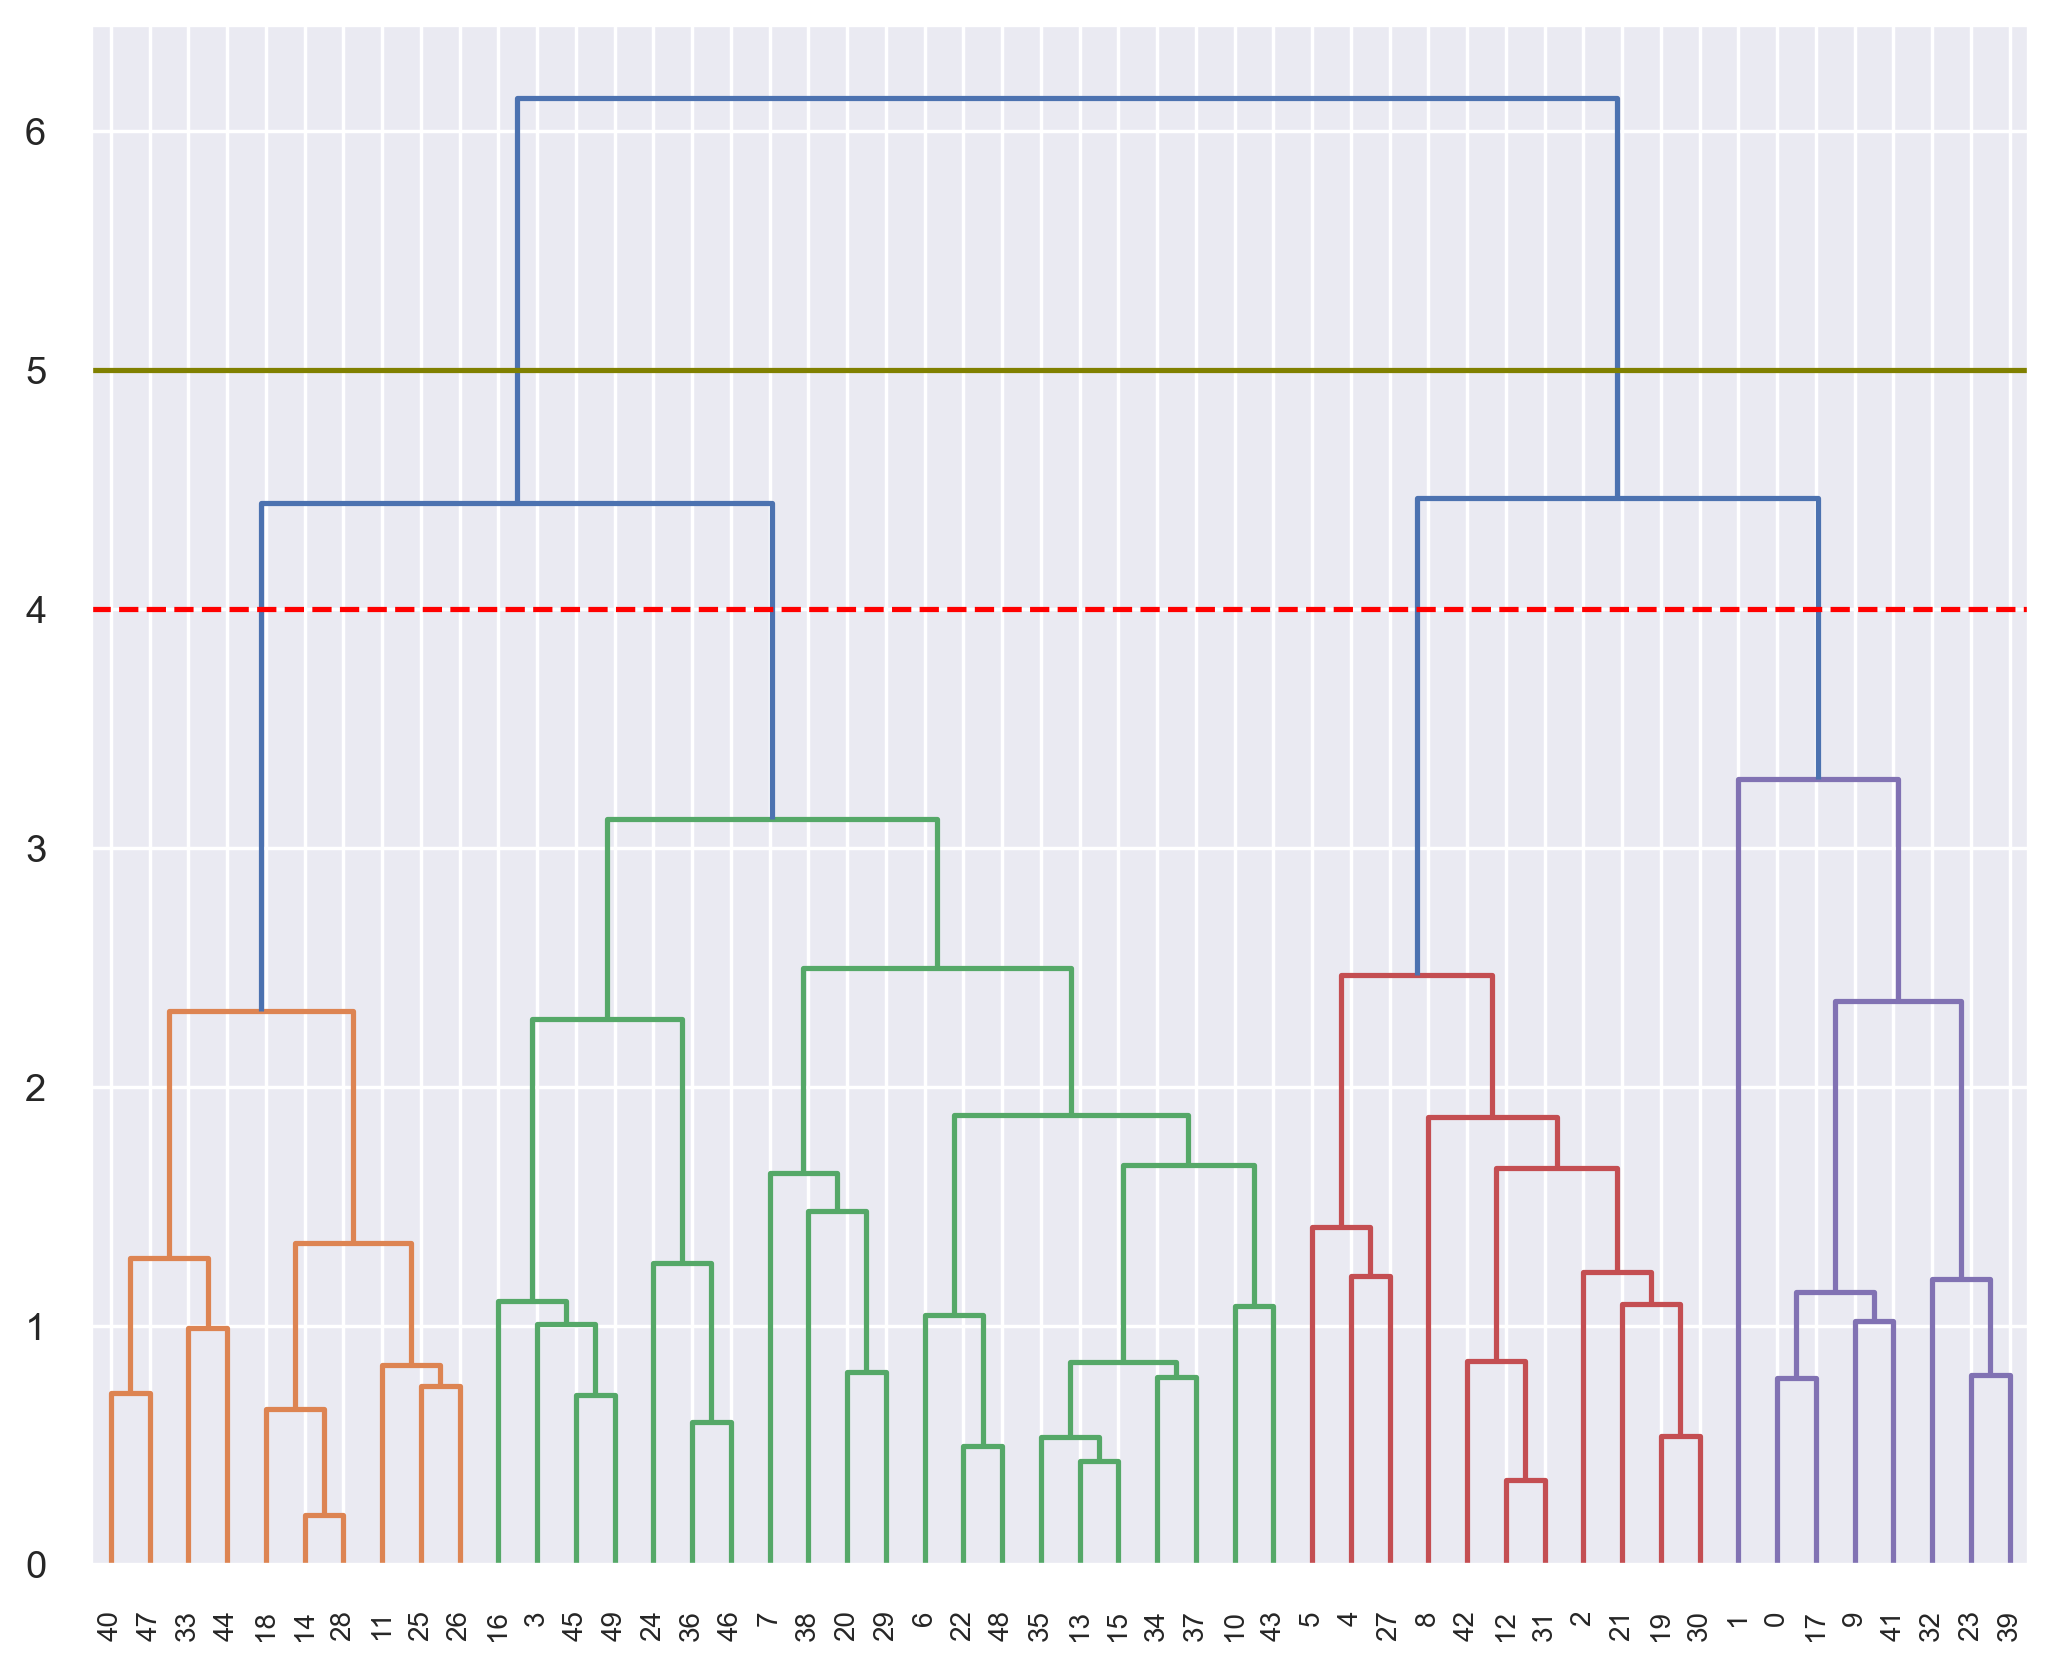

In [60]:
Linkage_2 = sch.linkage(x_sc, method= "complete")
dendro_2 = sch.dendrogram(Linkage_2)
plt.axhline(y= 5, c= "olive", linestyle= "-") 
plt.axhline(y= 4, c= "red", linestyle= "--")

> * #### Here we can create two clusters or four clusters. Let's see how and why these clusters are created.
> * #### Complete Linkage have clear distingwish between the clusters because it considers maxium distance among the groups.

* ##### <font color ='candy'> <u> Two Clusters Division</u>

In [17]:
HC_1 = AgglomerativeClustering(n_clusters= 2) 

Clusters_1 = HC_1.fit_predict(x_sc)
Clusters_1

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
df ['Clusters_1'] = Clusters_1
df.head()

States  Murder  Assault  UrbanPop  Rape  Clusters_1
0     Alabama    13.2      236        58  21.2           1
1      Alaska    10.0      263        48  44.5           1
2     Arizona     8.1      294        80  31.0           1
3    Arkansas     8.8      190        50  19.5           0
4  California     9.0      276        91  40.6           1

<Axes: xlabel='Murder', ylabel='Assault'>

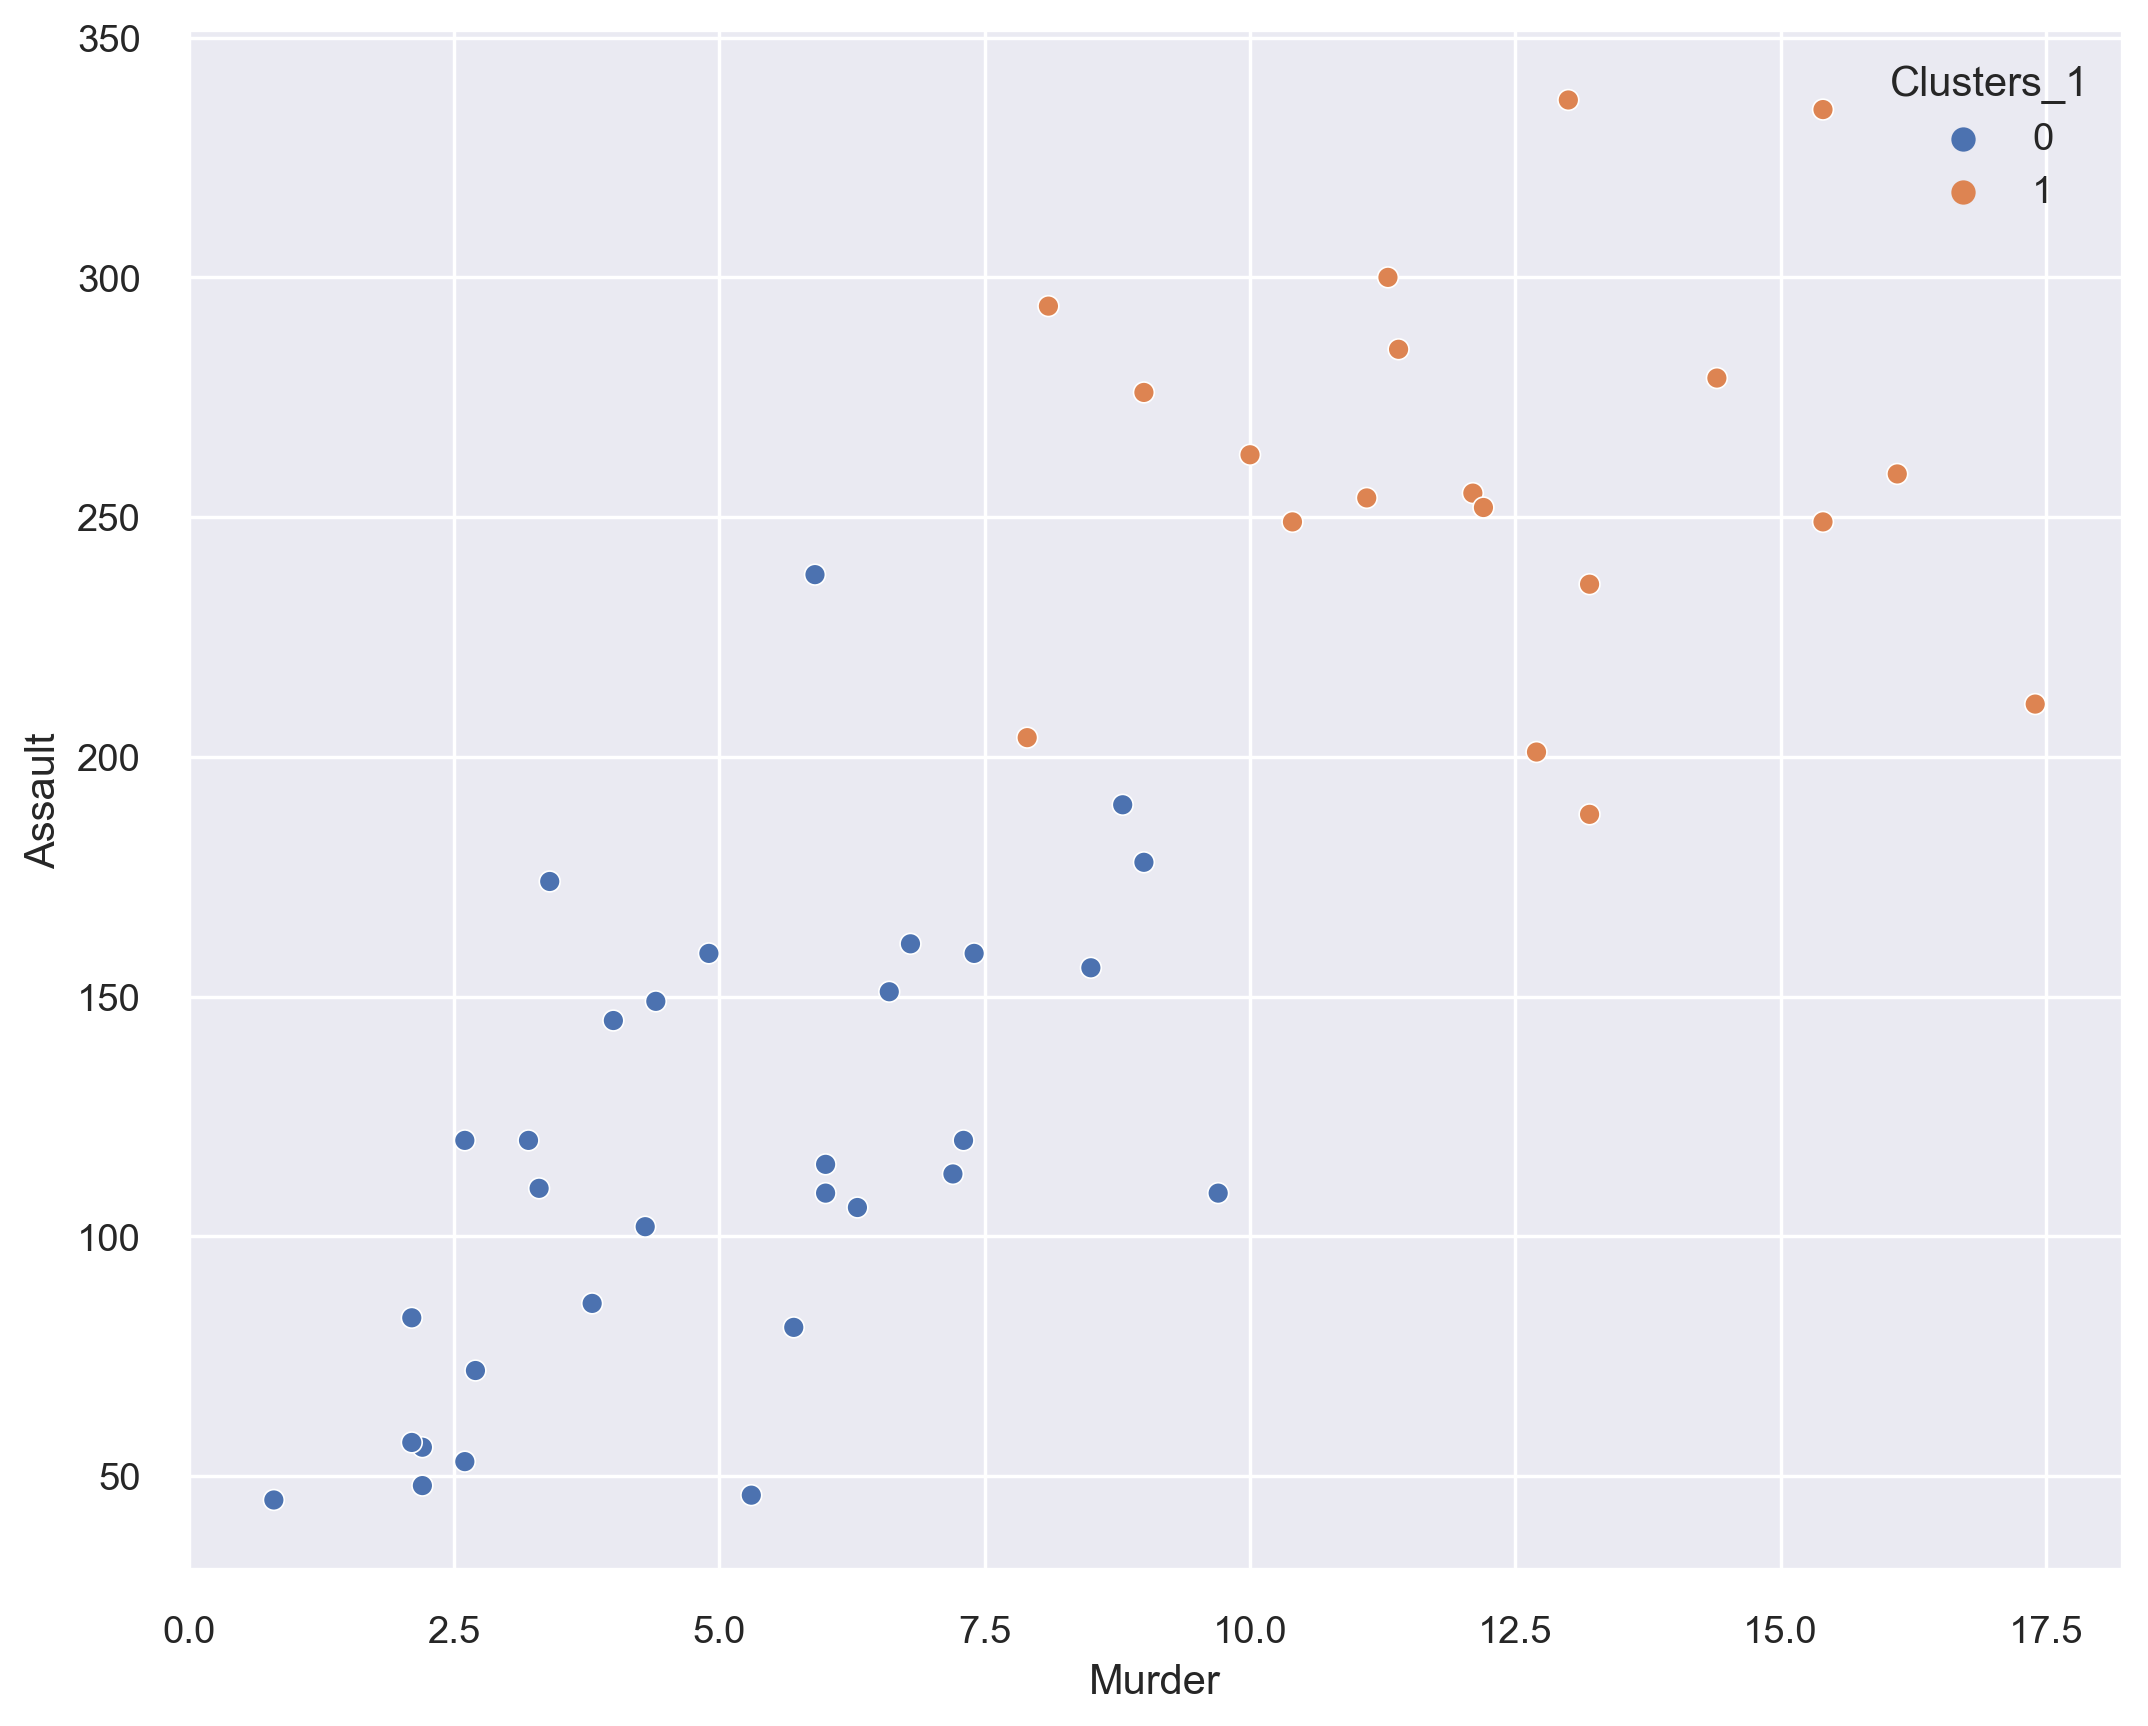

In [61]:
# Visualising the Clusters: 
sns.scatterplot(data=df, x= 'Murder', y='Assault', hue= 'Clusters_1')      
# as 'Murder' and 'Assault' heve 80% positive corelation so we used them for our visualisation of clusters.

In [20]:
df.groupby("Clusters_1").agg('mean')

Murder     Assault   UrbanPop       Rape
Clusters_1                                             
0            5.003226  116.483871  63.838710  16.338710
1           12.331579  259.315789  68.315789  29.215789

In [21]:
df["Clusters_1"].value_counts()

0    31
1    19
Name: Clusters_1, dtype: int64

> * #### We can see out of 50 records in "Group-0" there are 31 records and in "Group-1" there are 19 records.
> * #### Group-0 have lower mean values than Group-1.
> * #### We can observe that there is not much difference in mean urban population in both groups. This implies that population does not have direct relation with crimes.

* ##### <font color ='candy'> <u> Four Clusters Division</u>

In [22]:
HC_2 = AgglomerativeClustering(n_clusters= 4) 

Clusters_2 = HC_2.fit_predict(x_sc)
Clusters_2

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [23]:
df ['Clusters_2'] = Clusters_2
df.head()

States  Murder  Assault  UrbanPop  Rape  Clusters_1  Clusters_2
0     Alabama    13.2      236        58  21.2           1           3
1      Alaska    10.0      263        48  44.5           1           1
2     Arizona     8.1      294        80  31.0           1           1
3    Arkansas     8.8      190        50  19.5           0           0
4  California     9.0      276        91  40.6           1           1

<Axes: xlabel='Murder', ylabel='Assault'>

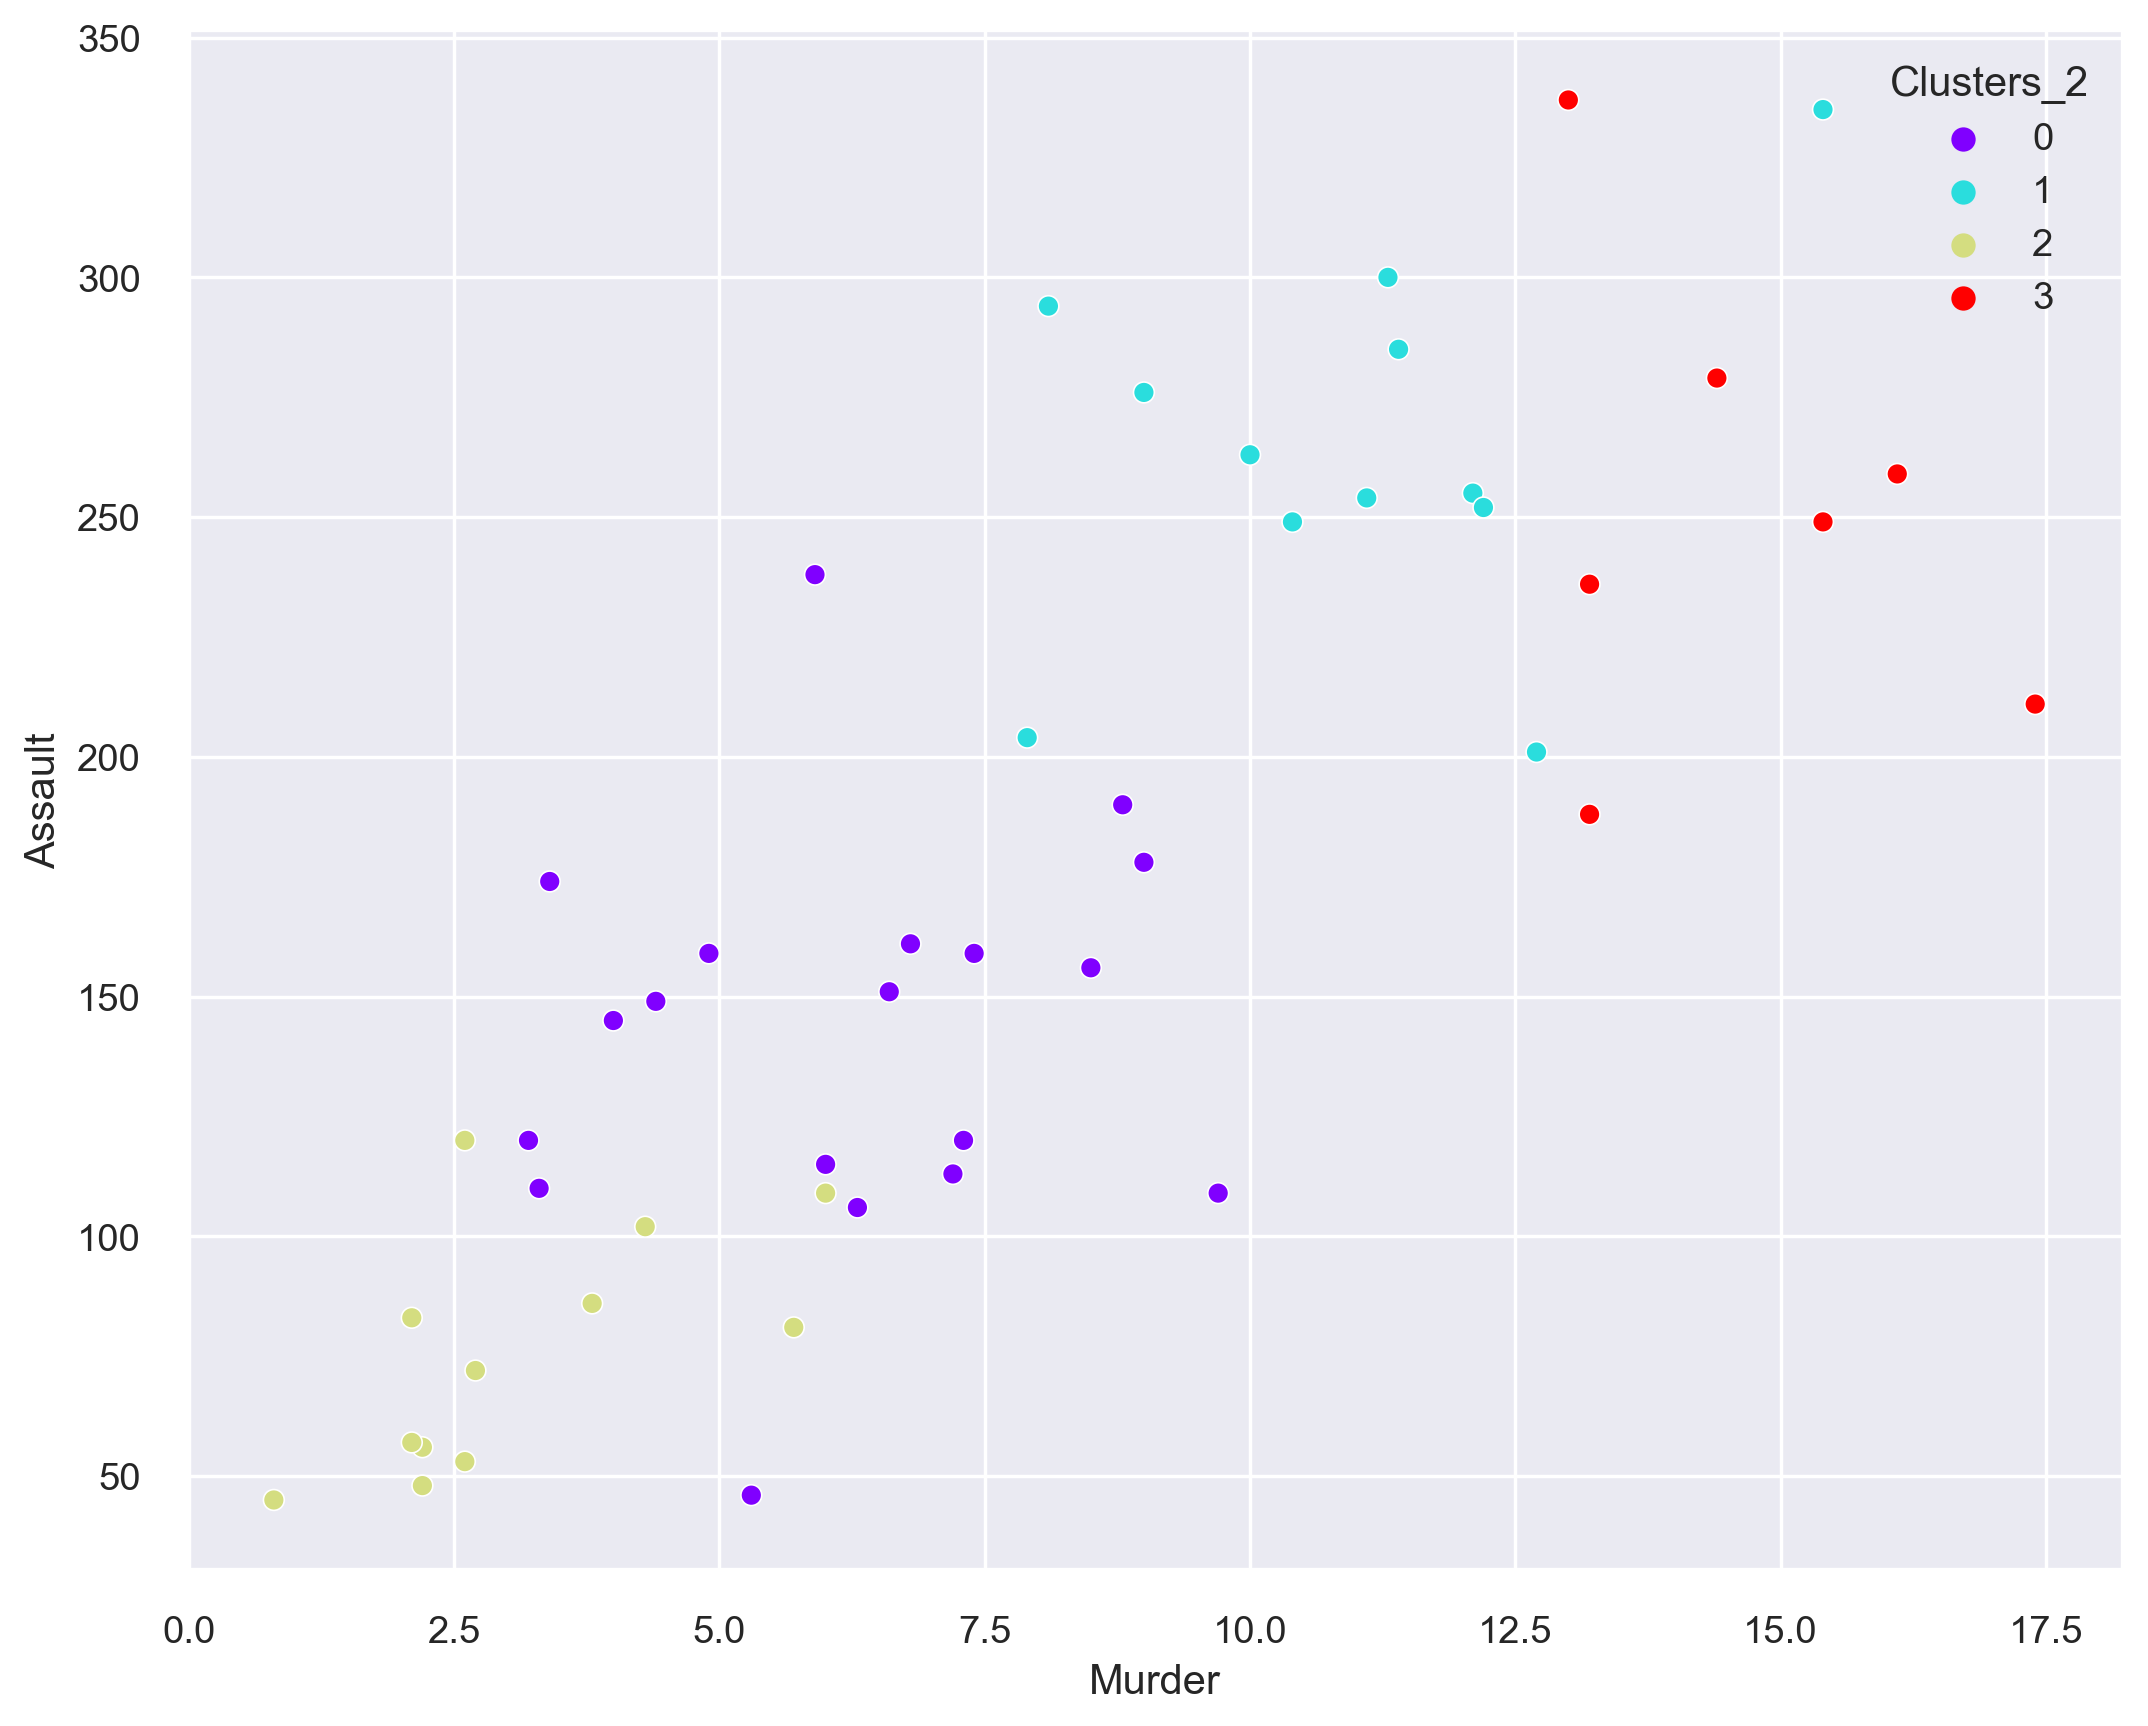

In [62]:
# Visualising the Clusters: 
sns.scatterplot(data=df, x= 'Murder', y='Assault', hue= 'Clusters_2', palette= 'rainbow')  

In [25]:
# Why such clusters created:
df.groupby("Clusters_2").agg('mean')

Murder     Assault   UrbanPop       Rape  Clusters_1
Clusters_2                                                         
0            6.210526  142.052632  71.263158  19.184211         0.0
1           10.966667  264.000000  76.500000  33.608333         1.0
2            3.091667   76.000000  52.083333  11.833333         0.0
3           14.671429  251.285714  54.285714  21.685714         1.0

> * #### In four clusters division Group-2 is lowest in every category followed by Group-0.
> * #### Except Murder rate Group-1 have highest rate in all other categories compared to Group-3.
> * #### Also in Scatter plot we can clearly see 4 clusters with increasing 'Murder' and 'Assault' rate.

 ### <font color ='green'> ➡ <u> Evaluation for final Clusters selection :</u>
    
* ####  We use the labled data which we got from our model building in <u>logistic regression model</u> to analyse the performance of both clusters.

 * ##### <font color ='candy'> <u>For Two Clusters:</u>

In [26]:
y_1 = df ['Clusters_1']

In [27]:
xtrain_1,xtest_1,ytrain_1,ytest_1 = train_test_split(x_sc, y_1, test_size= 0.2, random_state= 42)

In [28]:
lg = LogisticRegression()

lg.fit(xtrain_1,ytrain_1)
ypred_1 = lg.predict(xtest_1)

In [29]:
print(classification_report(ytest_1,ypred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



> #### <font color = 'orange'> Accuracy  ➡ 100%

* ##### <font color ='candy'> <u> For Four Clusters:</u>

In [30]:
y_2 = df ['Clusters_2']

In [31]:
xtrain_2,xtest_2,ytrain_2,ytest_2 = train_test_split(x_sc, y_2, test_size= 0.2, random_state= 42)

In [32]:
lg.fit(xtrain_2,ytrain_2)
ypred_2 = lg.predict(xtest_2)

In [33]:
print(classification_report(ytest_2,ypred_2))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3

    accuracy                           0.90        10
   macro avg       0.92      0.92      0.90        10
weighted avg       0.93      0.90      0.90        10



>  #### <font color = 'orange'> Accuracy  ➡ 90%

> * #### <font color = 'brown'>OPTIMAL NUMBER OF CLUSTERS WITH HIERARCHICAL CLUSTERING: 
> #### For Two Clusters division we get 100% accuracy and for Four Clusters division we got 90% accuracy. So, We can choose any of the clustering division for analysis as per our requirement. (Both are suitable)

<br>

 ___

[GO TO TOP](#0.1) 

## <font color = 'magenta'> 2. <u>K-MEANS CLUSTERING ALGORITHM </u><a class="anchor" id="2"></a>

* ##### <font color = "candy"> K-means clustering </font> is a method for grouping unlabeled data into clusters. It's a centroid-based algorithm that assigns data points to clusters based on their distance from a centroid. The goal is to minimize the sum of the squared distances between objects and their assigned cluster means.

* ##### <font color = "candy"> Steps in cluster creation:
    
    1) Initially we need to provide number of clusters(k) randomly, for which centroids are randomly generated.
    2) Then each and every data point computes distance (Euclidean) from centroids, which has minimum distance data point goes to that cluster.
    3) With new data point centroid location goes on changing. 
    4) Results in creation of final clusters.
    5) But in K-means clustering there was chances of creation of one single cluster merging all data points. To overcome this issue some modifications are done in K-means++ 
    
* ##### <font color = "candy"> K-means++ 
    + It maintains sufficient distance between each clusters and creates optimal number of clusters.
    + It tries to reduce variance within the clusters and tries to maximise variance between the clusters.
    
* ##### <font color = "candy"> Elbow Graph For Selection of K:
    + For selection of optimal number of clusters we use elbow curve it is line chart ploted for number of clusters against WCSS value.
    + WCSS value is within the cluster sum of squares i.e. average distance of all data points to it's centroid within the cluster.
    + We choose that k value where there is drastic change in WCSS value.
    
* ##### <font color = "candy"> Silhoutte Score :
    + It is a metric that measures the quality of a clustering algorithm. It evaluates how well-defined and distinct clusters are created, by measuring how well a data point fits into its assigned cluster.
    + Silhoutte Score less than zero is worst clustering, close to zero implies overlapping and near to one shows best clustering.

 ### <font color ='green'> ➡ <u>Selection of K :</u>

In [34]:
# Computing wcss value:

wcss = []

for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit_predict(x_sc)
    wcss.append(km.inertia_)   # inertia_ function computes wcss value 

Text(0, 0.5, 'WCSS')

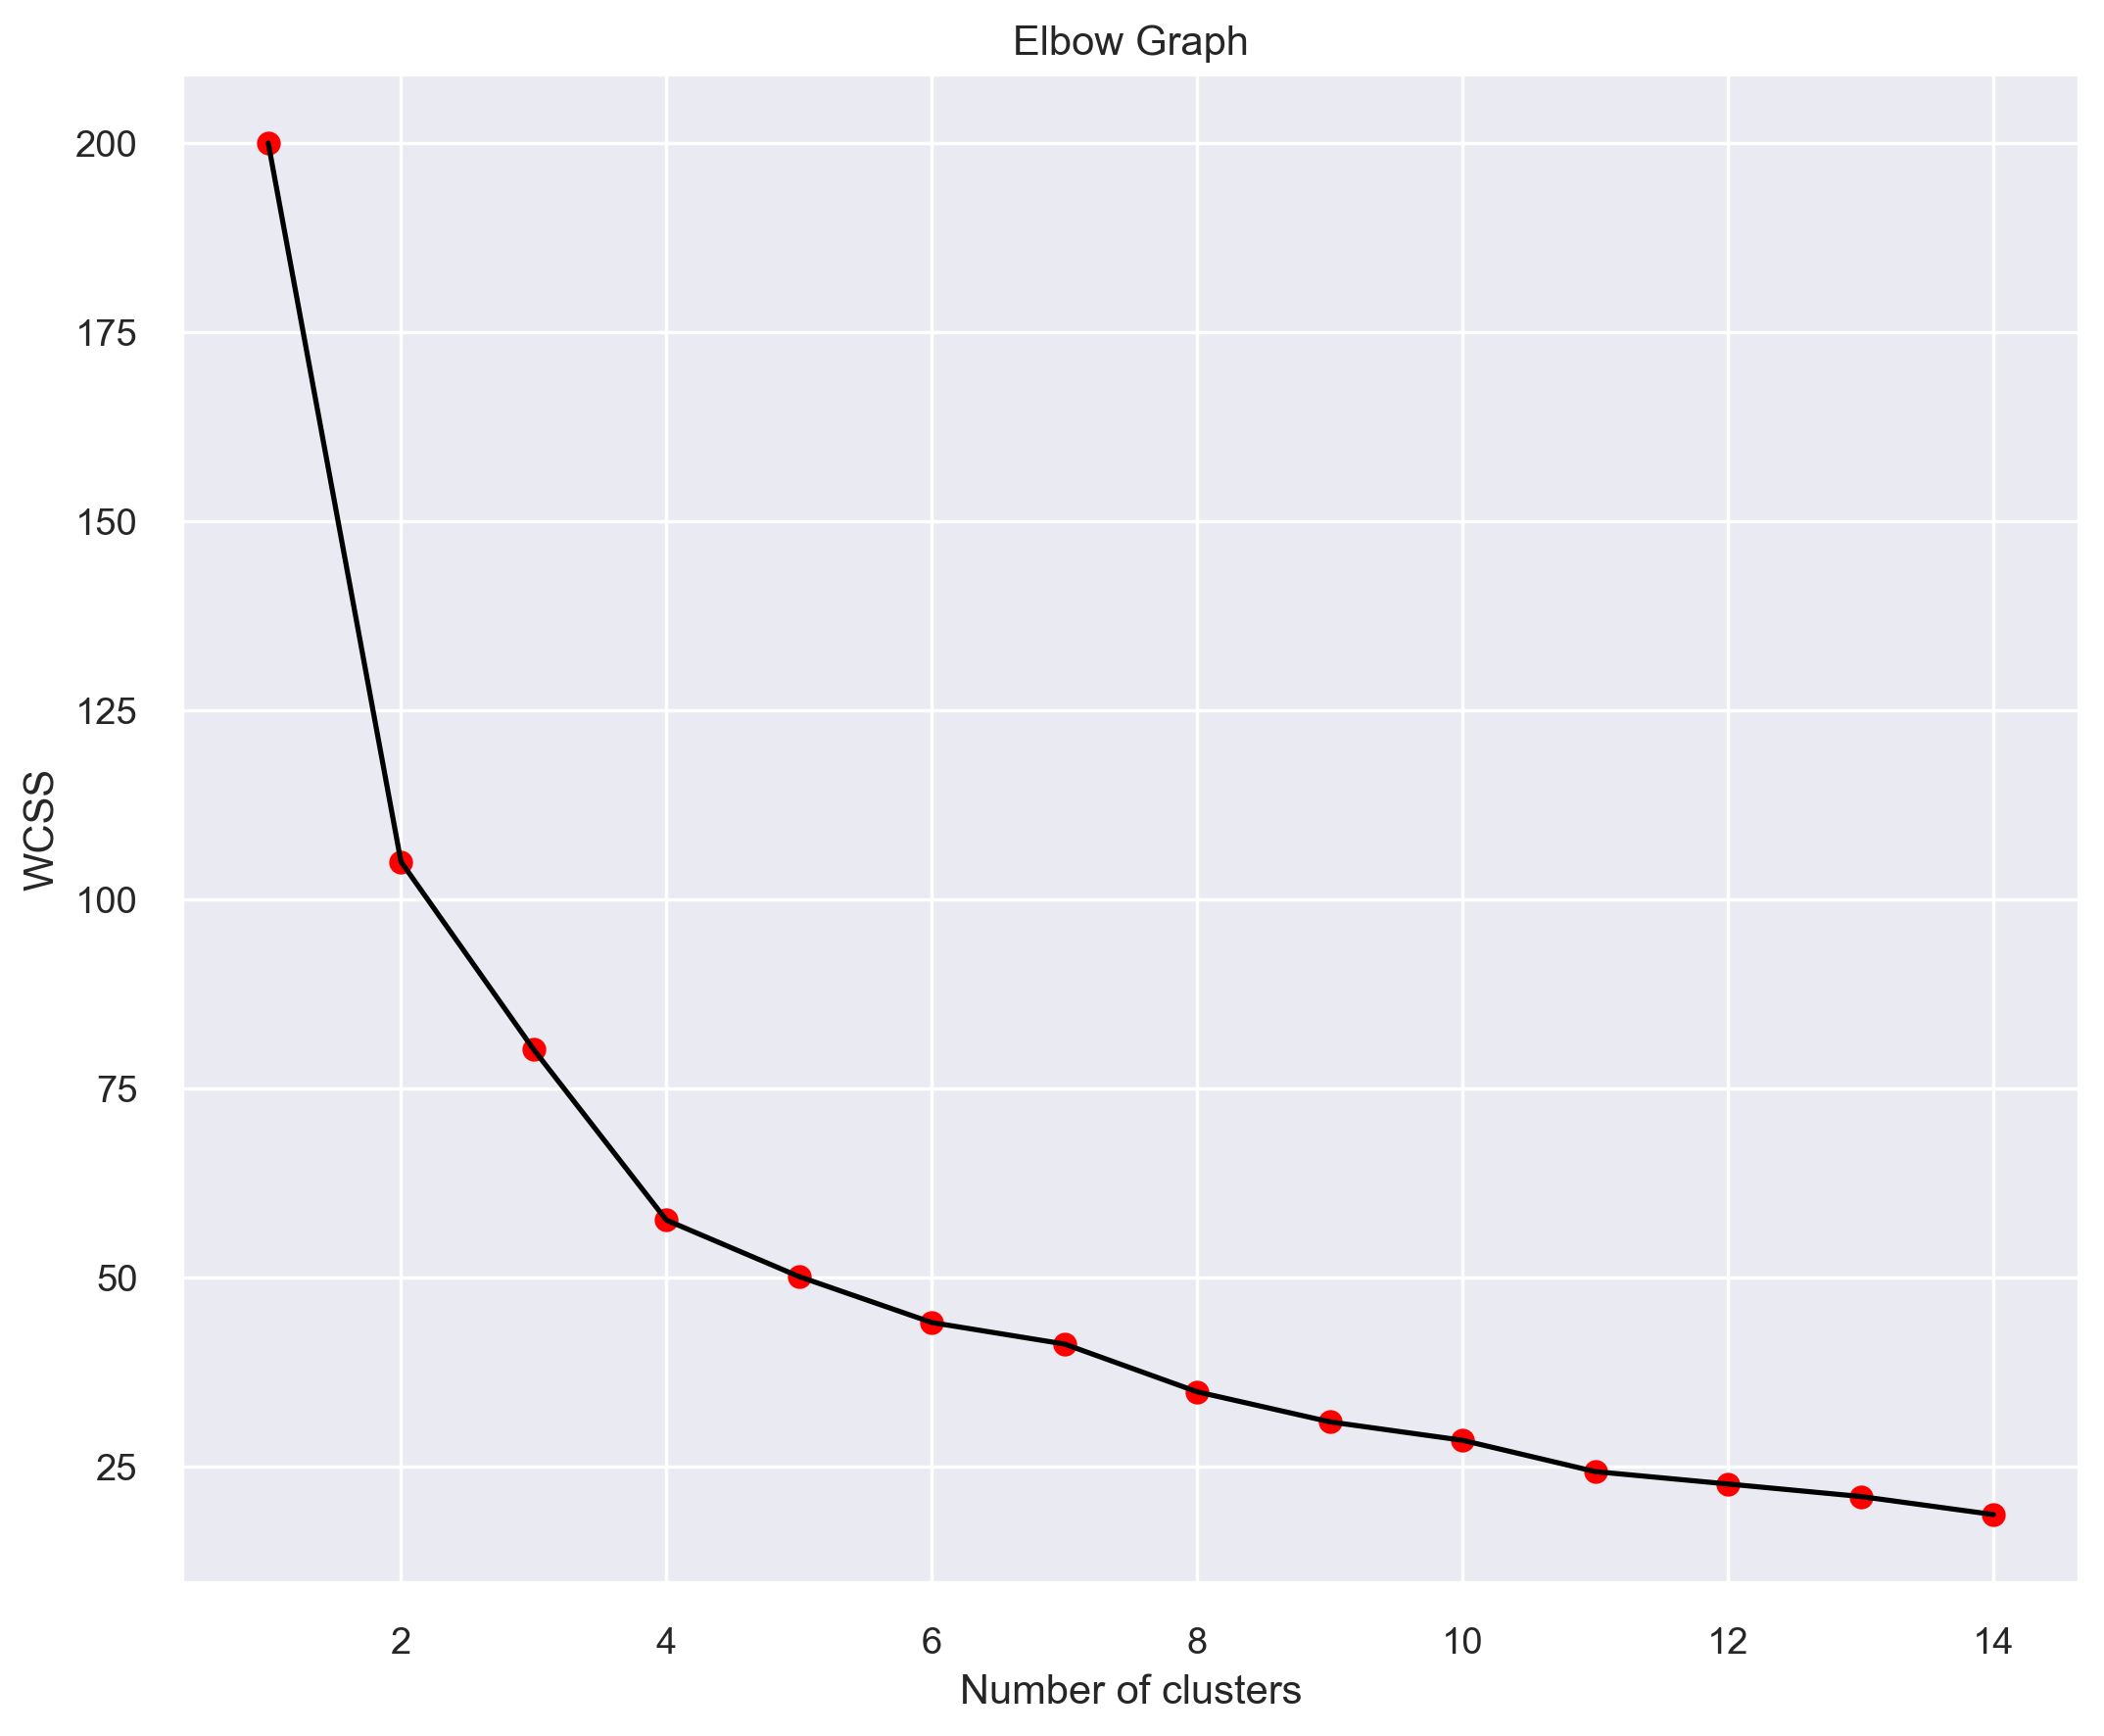

In [64]:
# Elbow Graph:
plt.plot(range(1,15),wcss,color = 'black')
plt.scatter(range(1,15),wcss,color='red')
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

> #### We can see drastic change at k is 2 and 4. So let's check Silhouette Score for range of number of clusters from 2 to 5.

In [36]:
# Silhoutte Score:
sil_score_sc = []

for i in range(2,6):
    km = KMeans(n_clusters=i)
    y_sc = km.fit_predict(x_sc)
    sil_score_sc.append(silhouette_score(x_sc,y_sc))

In [37]:
sil_score_sc

[0.4084890326217641,
 0.3095091512791688,
 0.33968891433344395,
 0.30682209301146945]

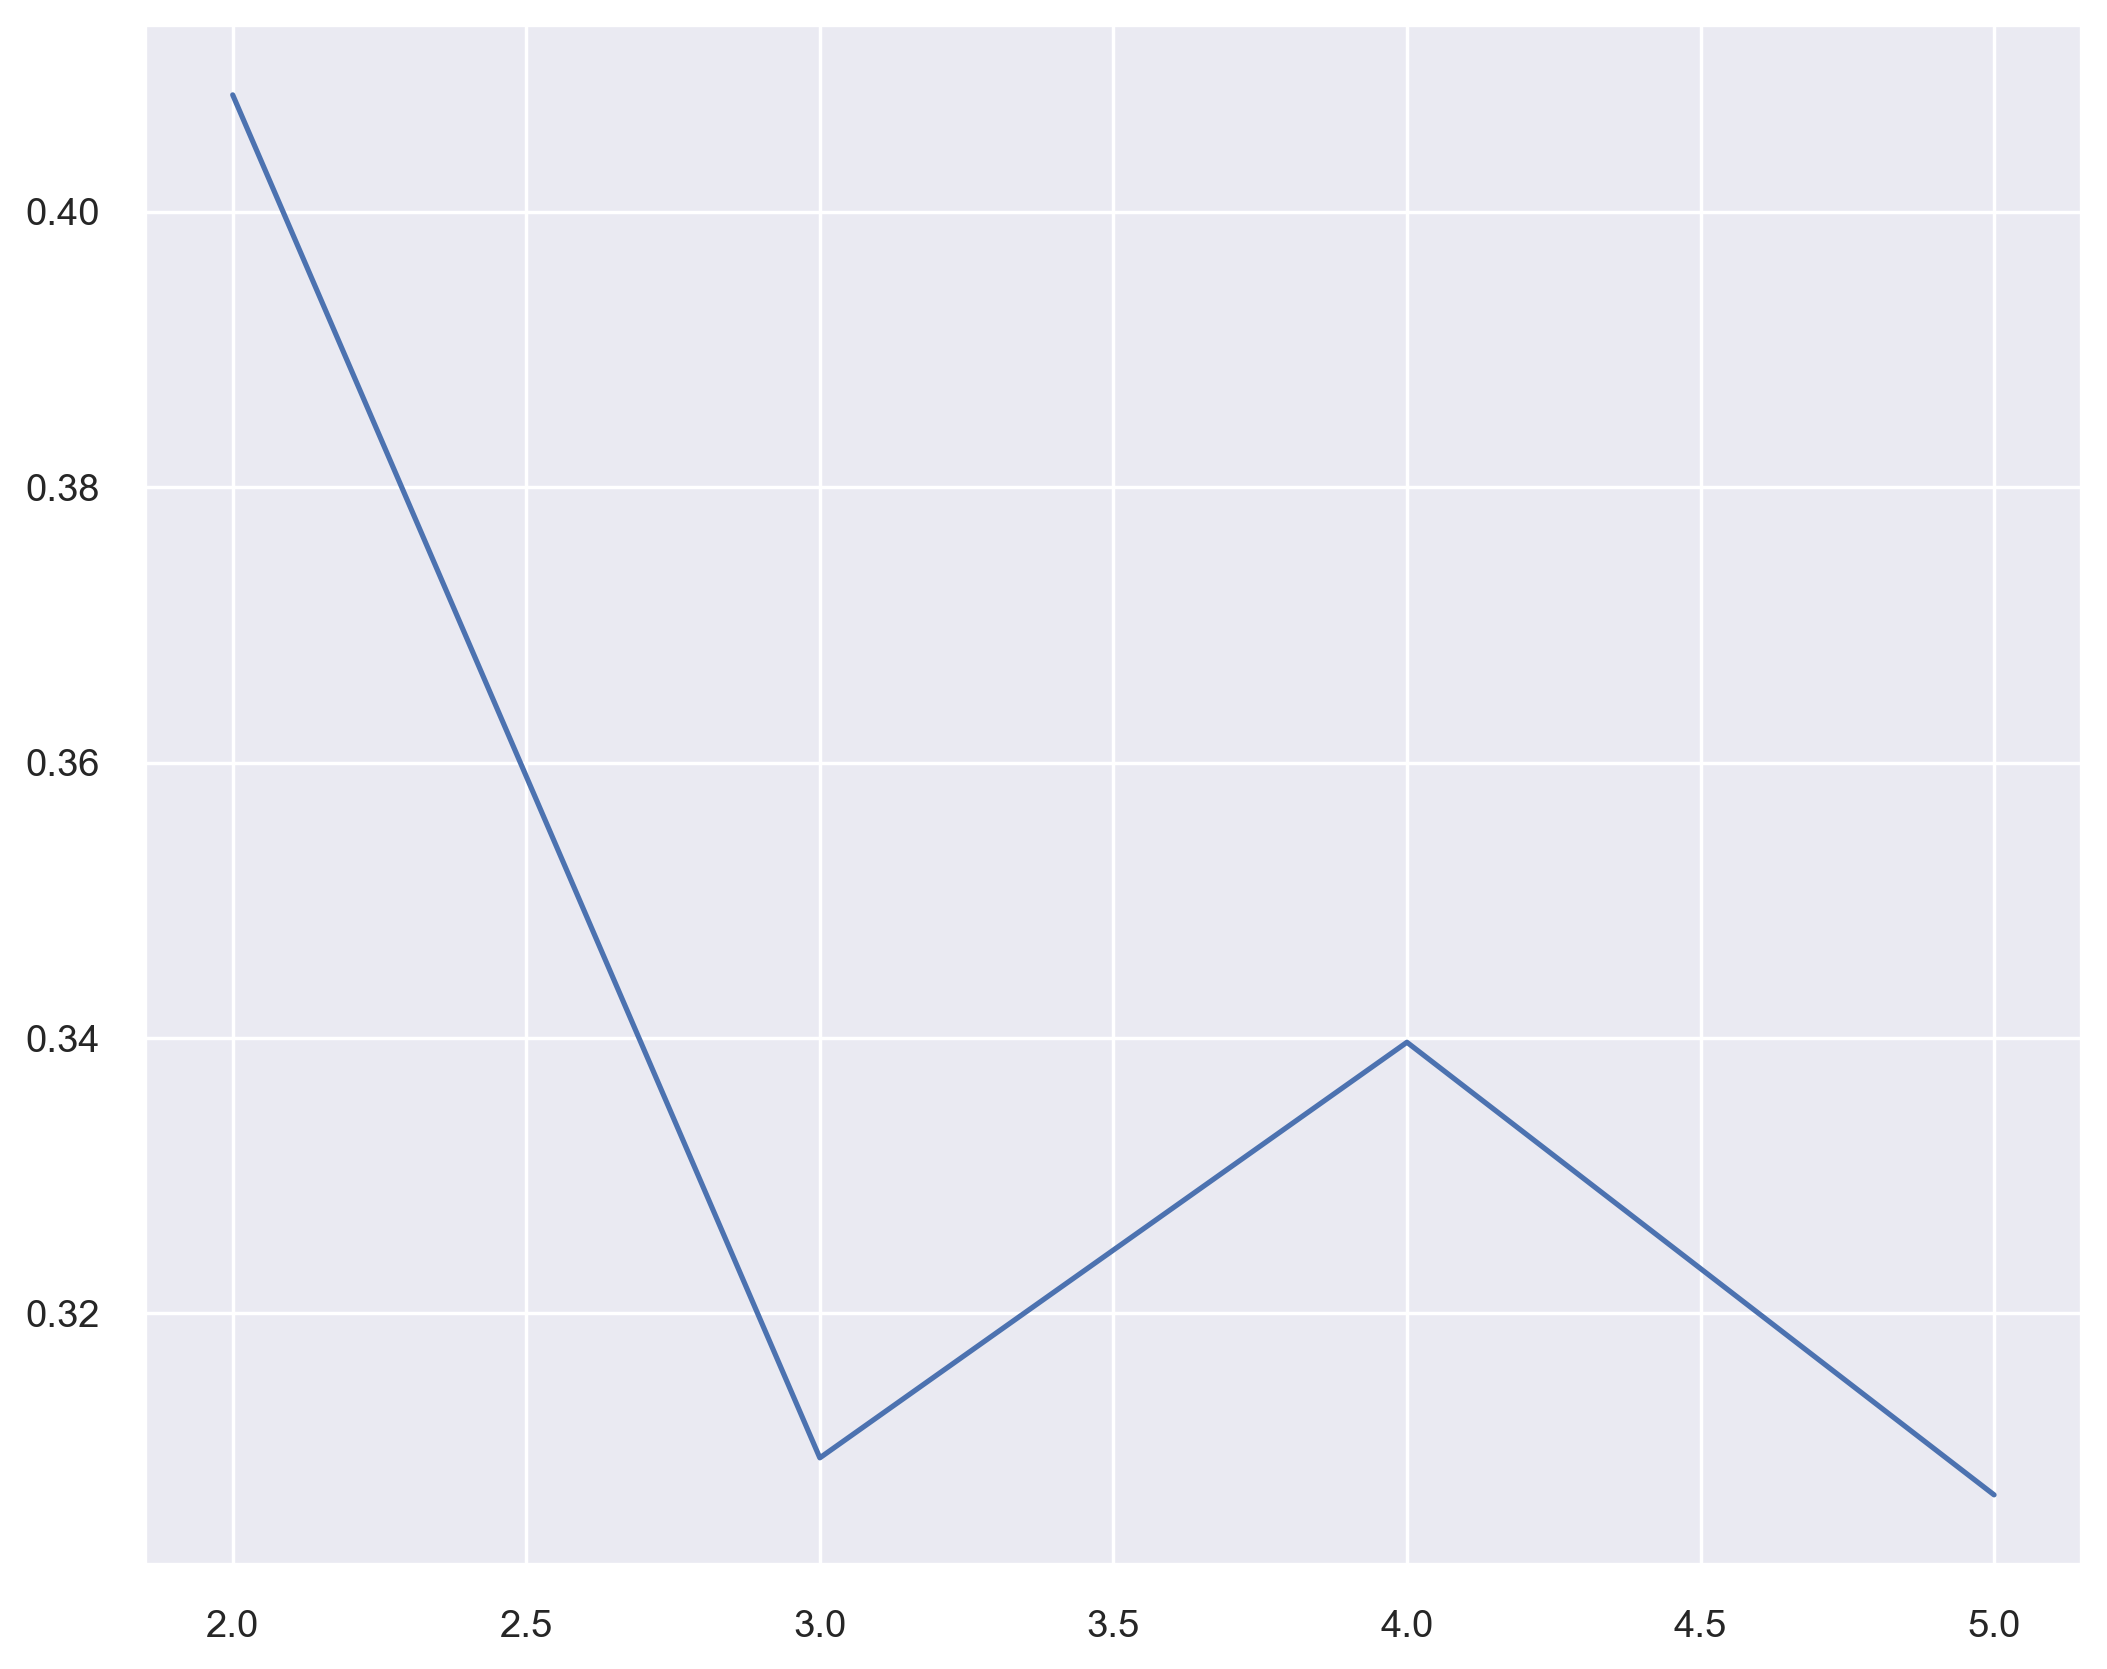

In [63]:
# Ploting Silhoutte Score:
plt.plot(range(2,6),sil_score_sc)

> #### Maximum Silhoutte Score for number of clusters (k) = 2.
> #### Let's See the Silhoutte Score Visulisation to understand why the Silhoutte Score is low.

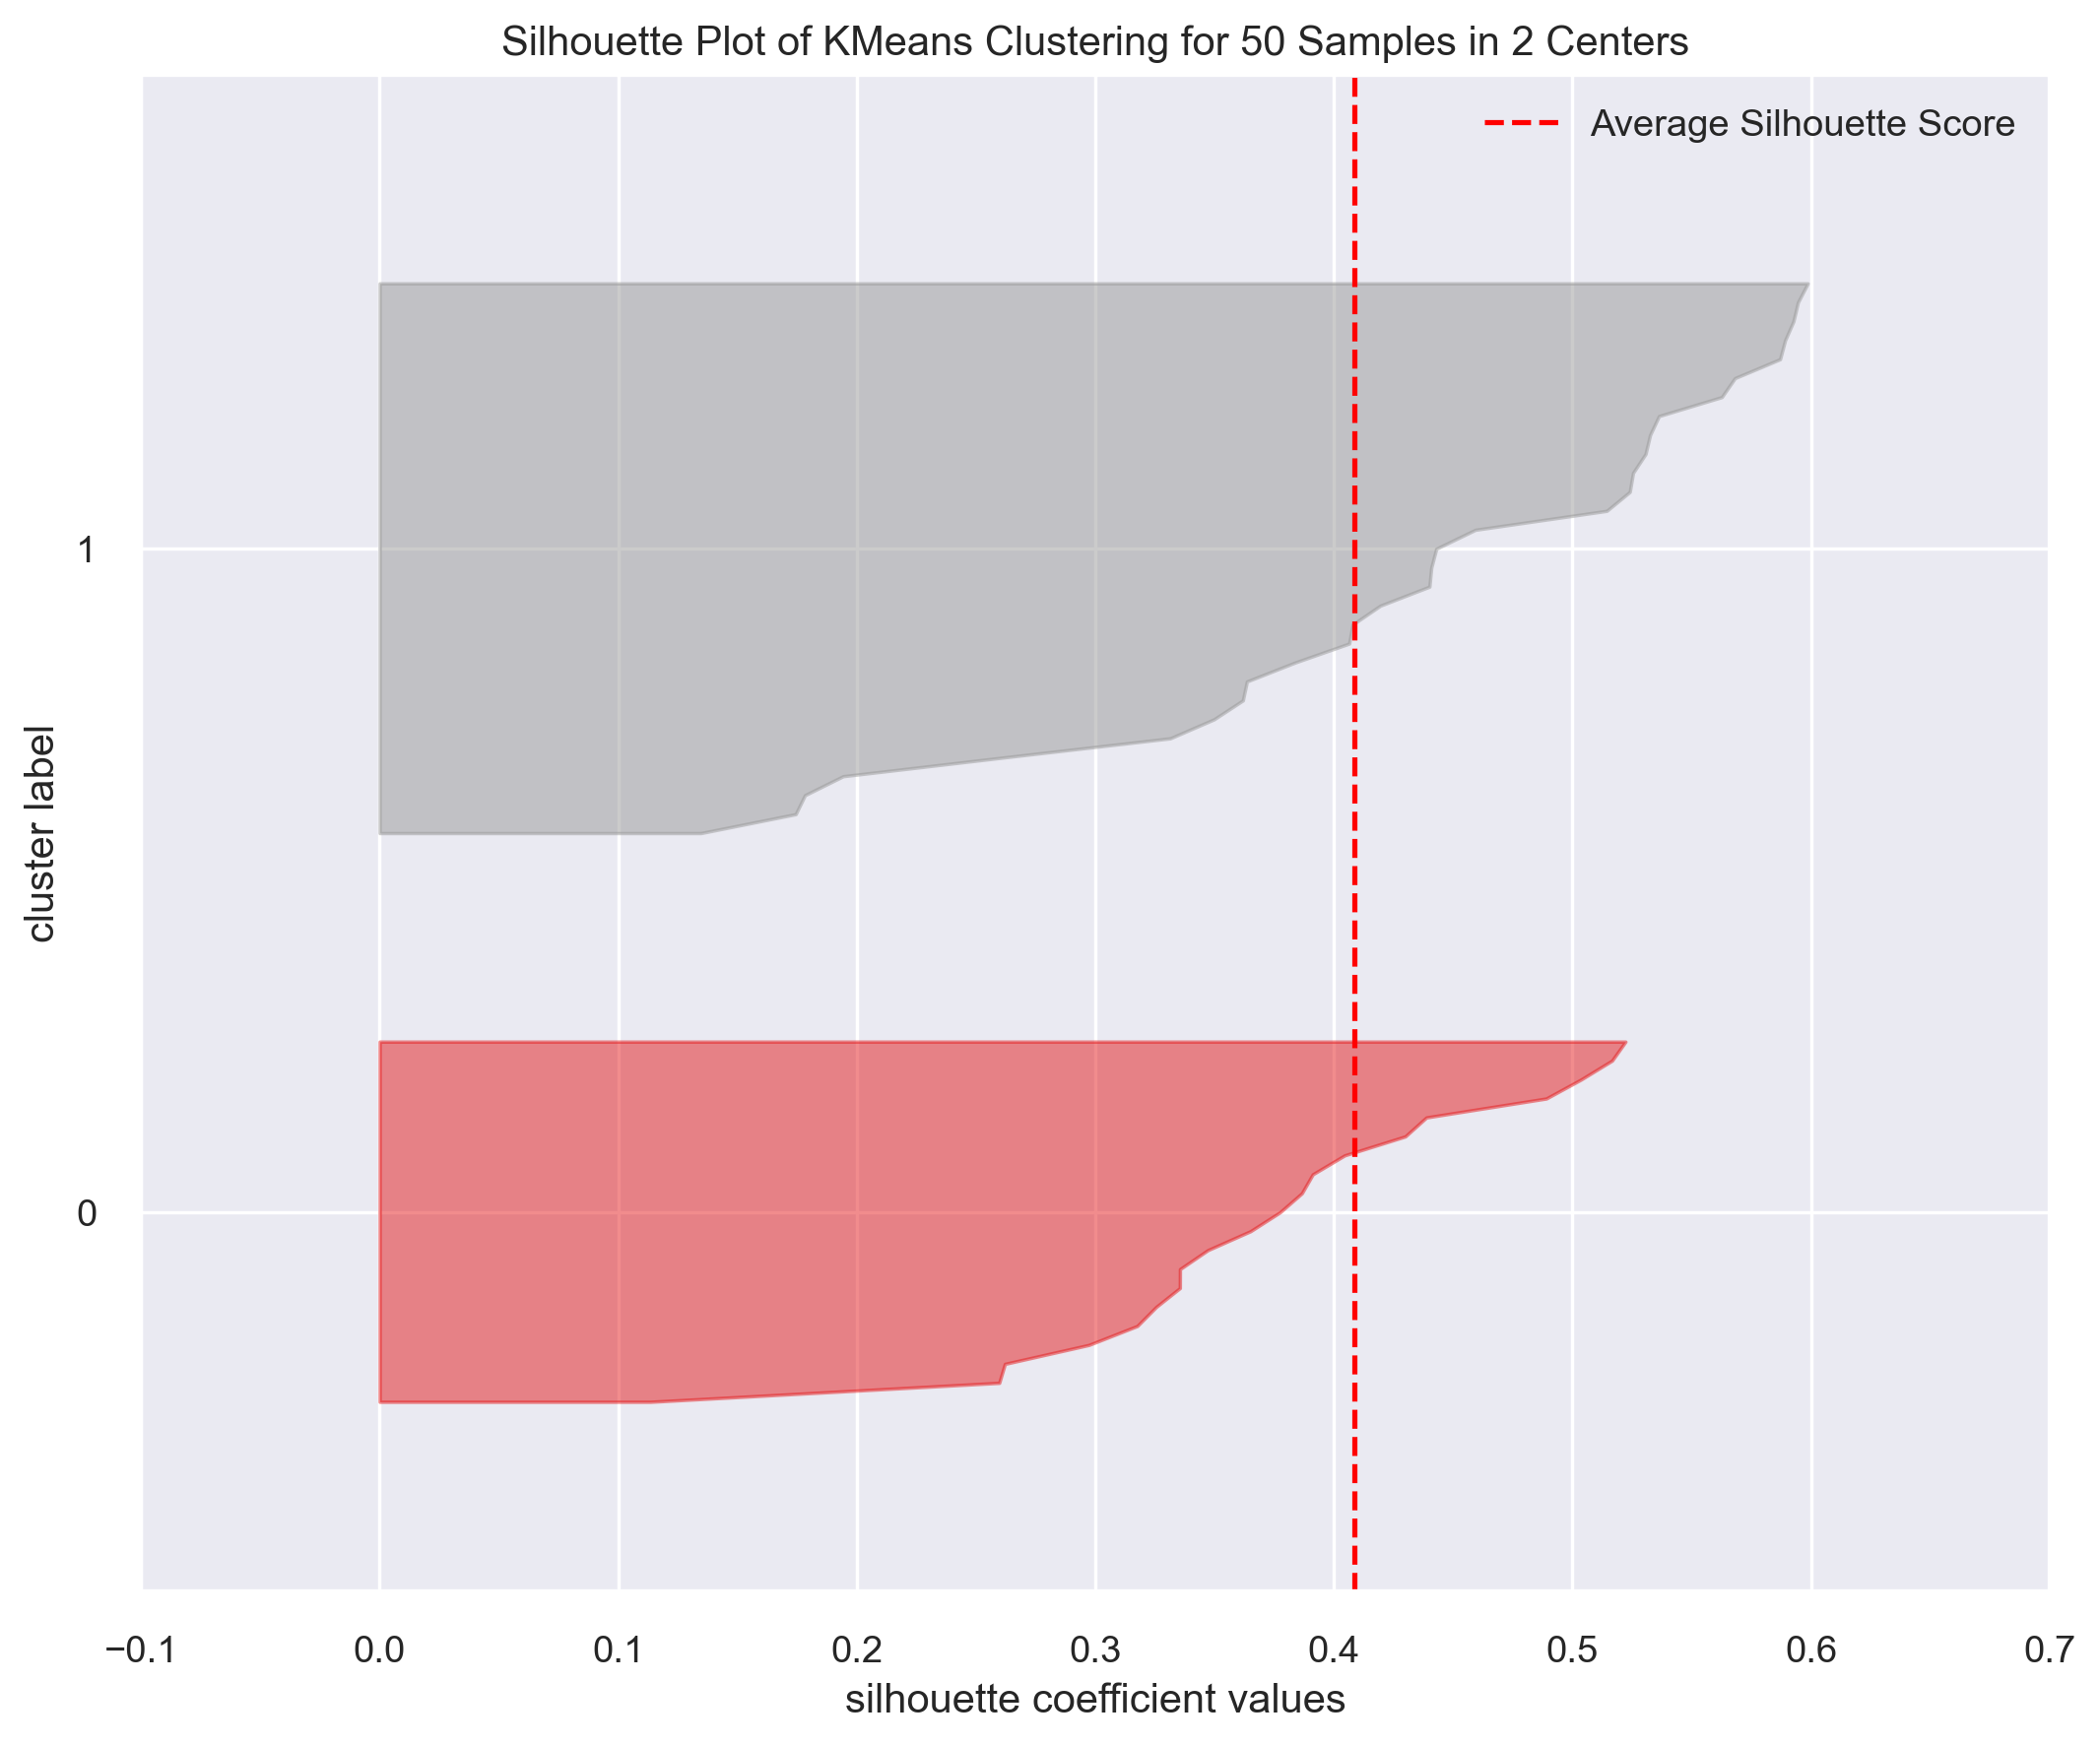

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
# Visualisation of Silhoutte Score for K = 2:
model = SilhouetteVisualizer(KMeans(n_clusters = 2))
vis = model.fit(x_sc)
vis.show()

> #### Here we can see both bands of clusters cuts the Average Silhoutte Score line (red line) and there are no negative values this implies clustering generated is good.
> #### But the band size of Cluster 0 is larger than Cluster 1. Band size should be nearly equal for best model.

 ### <font color ='green'> ➡ <u>Final Model with 2 Clusters:</u>

In [40]:
km = KMeans(n_clusters= 2)
Clusters_k = km.fit_predict(x_sc)
Clusters_k

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [41]:
df ['Clusters_K'] = Clusters_k
df.head()

States  Murder  Assault  UrbanPop  Rape  Clusters_1  Clusters_2  \
0     Alabama    13.2      236        58  21.2           1           3   
1      Alaska    10.0      263        48  44.5           1           1   
2     Arizona     8.1      294        80  31.0           1           1   
3    Arkansas     8.8      190        50  19.5           0           0   
4  California     9.0      276        91  40.6           1           1   

   Clusters_K  
0           1  
1           1  
2           1  
3           0  
4           1

* ##### <font color ='candy'><u> Cluster Visualisation: </u>

In [42]:
# Clusters Centers : 
km.cluster_centers_ 

array([[-0.67675778, -0.68274685, -0.13306084, -0.57037591],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386]])

Text(0.5, 1.0, 'Murder Vs Assault')

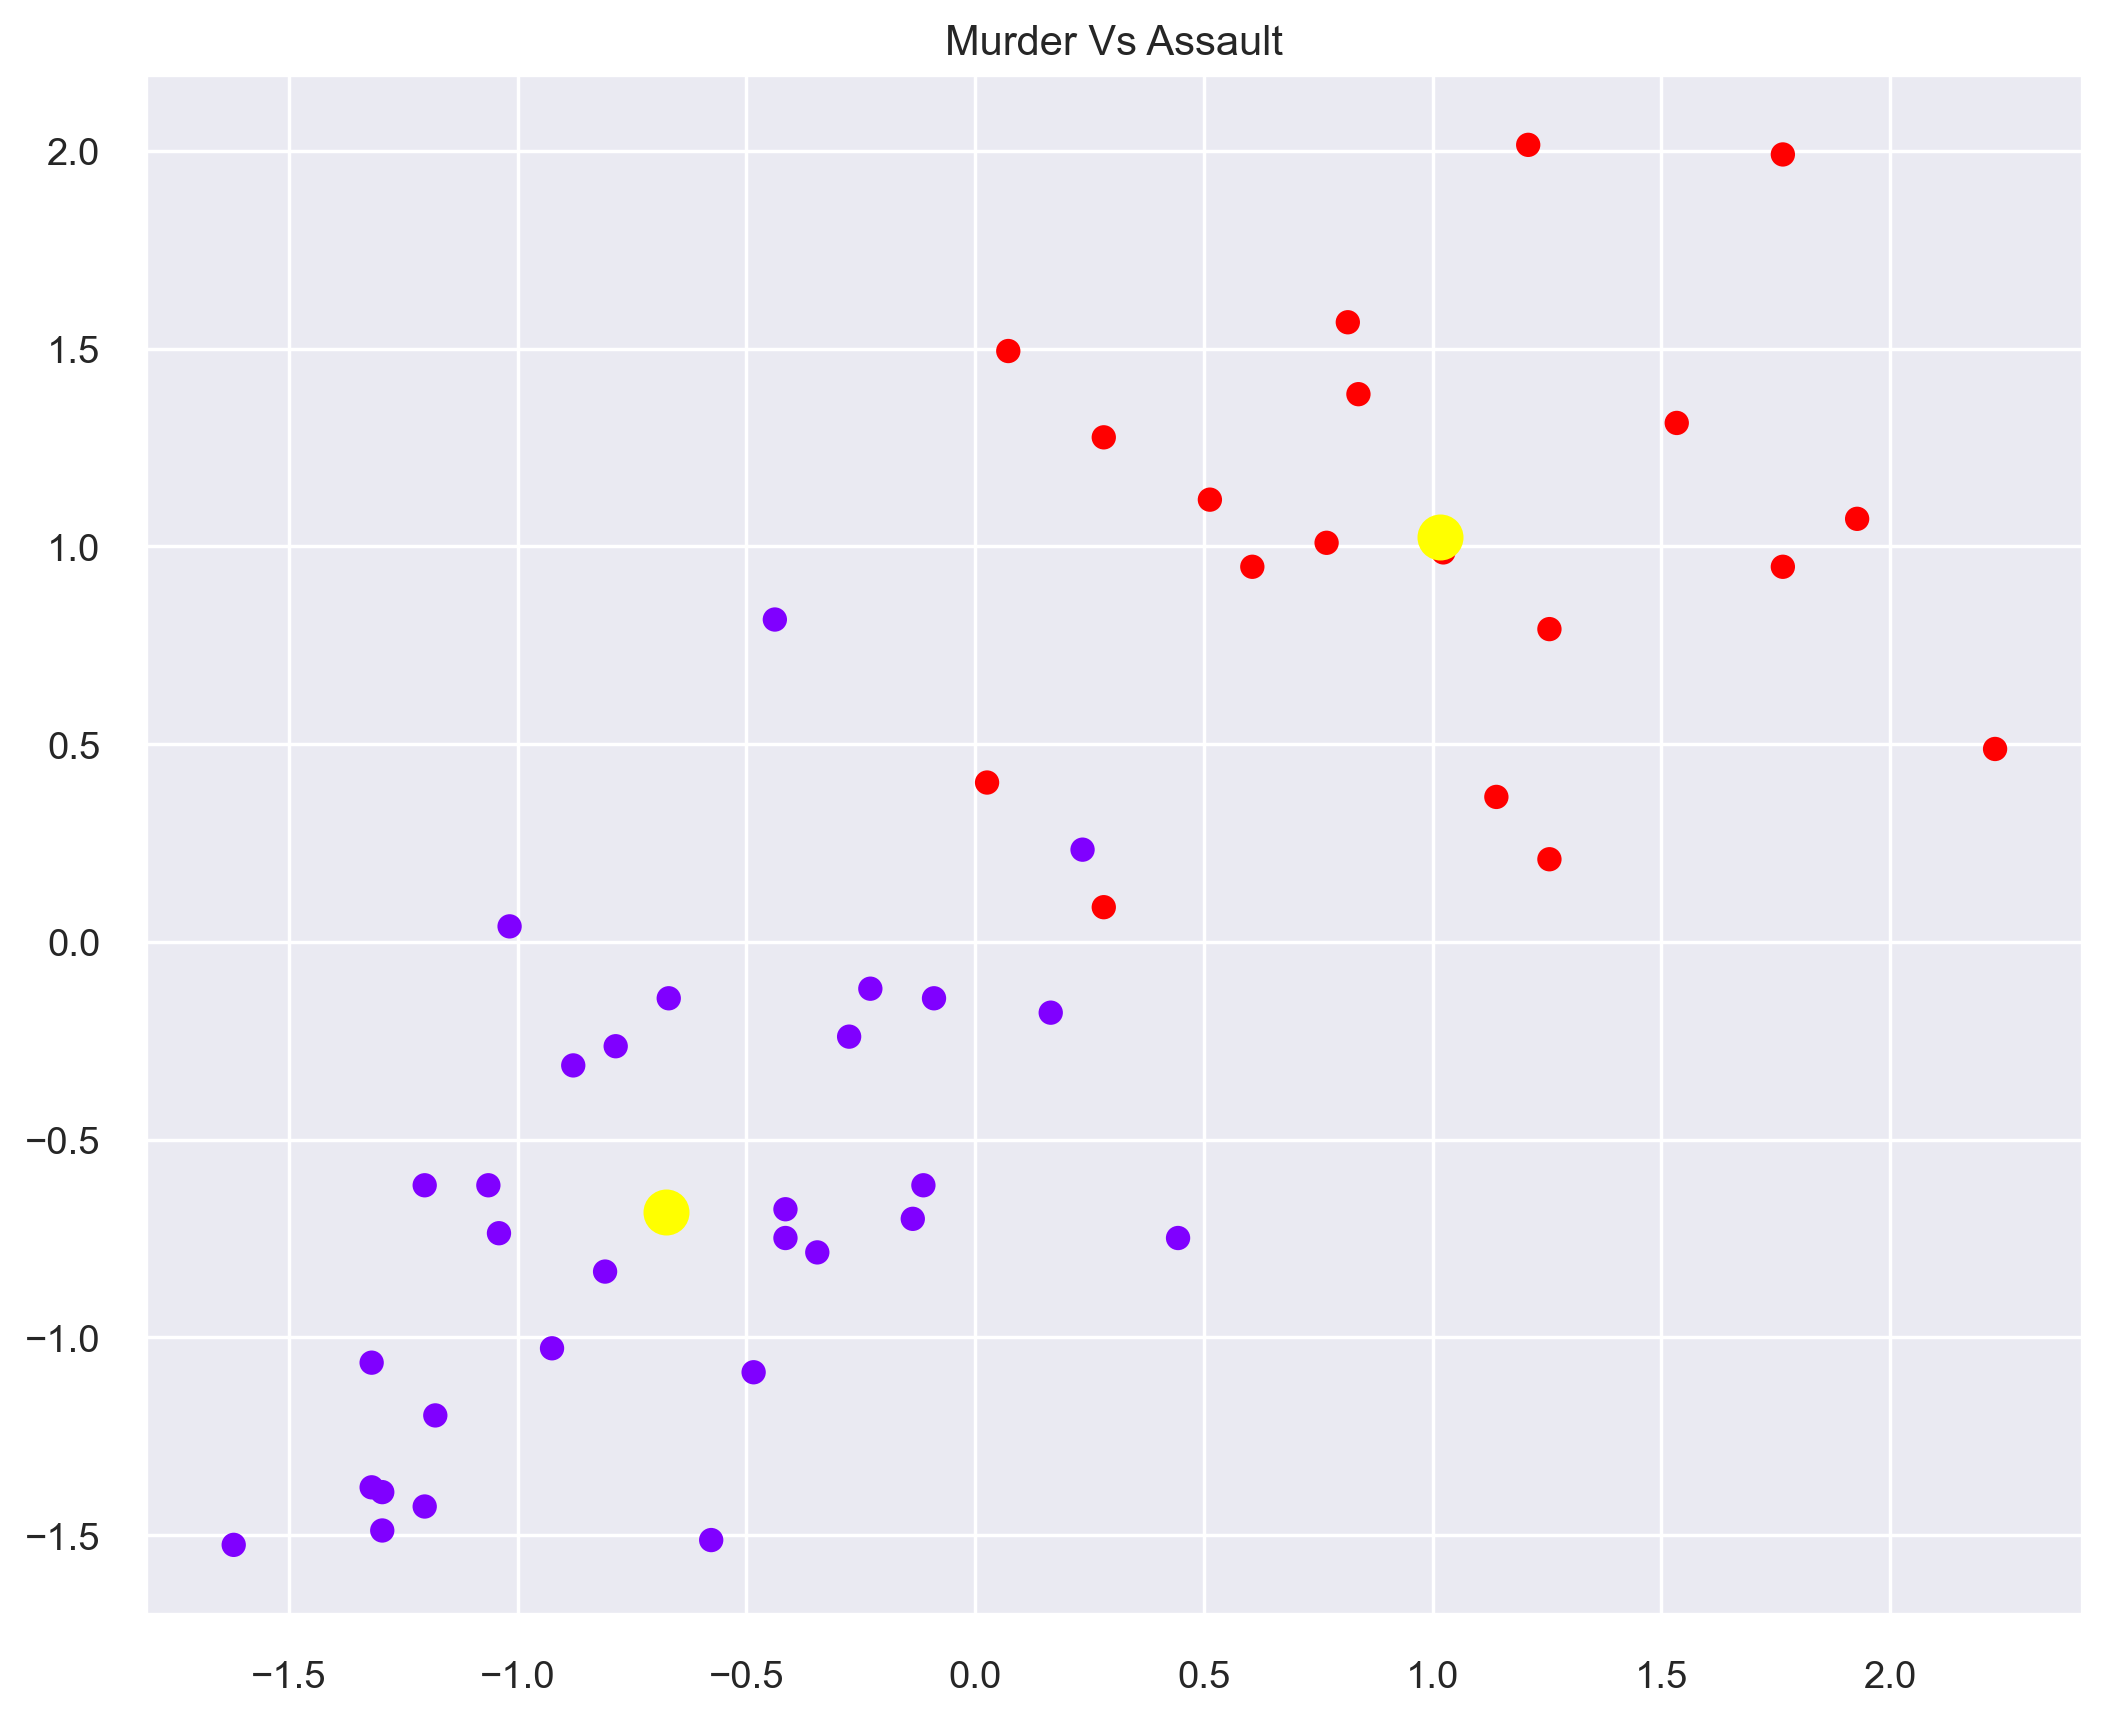

In [66]:
# Visualising the Clusters: 
plt.scatter(x_sc[:,0],x_sc[:,1],c = Clusters_k, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'yellow',s=150)
plt.title('Murder Vs Assault')

In [44]:
# Why such clusters are created:
df.groupby('Clusters_K').agg('mean')

Murder     Assault   UrbanPop       Rape  Clusters_1  Clusters_2
Clusters_K                                                                  
0            4.870  114.433333  63.633333  15.943333        0.00        0.80
1           12.165  255.250000  68.400000  29.165000        0.95        1.65

> * #### Cluster-0 has low Crime Rates than Cluster-1.

> * #### <font color = 'brown'>OPTIMAL NUMBER OF CLUSTERS WITH K-MEANS CLUSTERING: 
> #### For 2 clusters there is highest Silhoutte Score, but the score is not close to 1. This may be due overlapping of Clusters.
> #### There should be high variance between the Cluster 0 and Cluster 1 and low variance within the cluster. 
> #### But due to outlier data points in "Rape" variable Clusters Overlap. This shows that K-Means Clustering highly affected by Outlier Data Points. 

<br>

 ___

[GO TO TOP](#0.1) 

### <font color = 'magenta'> 3. <u> DBSCAN - ALGORITHM </u> <a class="anchor" id="3"></a>

* ##### <font color = "candy"> DBSCAN (Density-Based Spatial Clustering of Applications with Noise)</font> is a popular clustering algorithm used for data analysis and pattern recognition. It groups data points based on their density, identifying clusters of high-density regions and classifying outliers as noise.

* ##### Unlike K-Means Culstering, you don’t have to specify the number of clusters to use it.

* ##### K- Means and Hierarchical Clustering are sensitive to Noise Data points and they neither recognise complex patterns and shapes nor Outliers.

* ##### In following Figure we can see the clustering pattern generated by DBSCAN and K-Means.

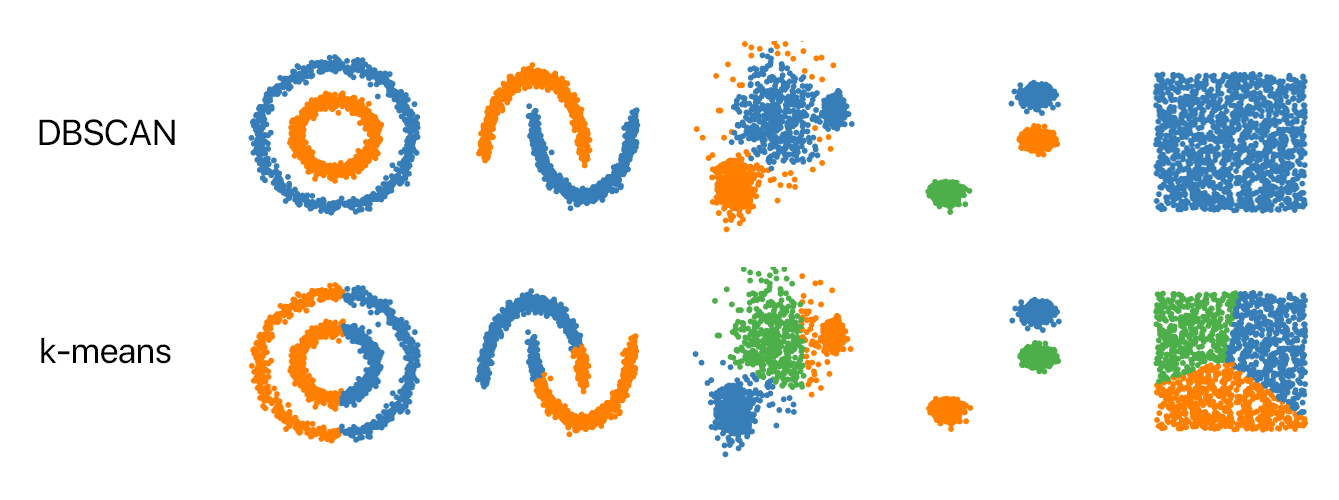

* ##### <font color = "candy">Parameters for DBSCAN :
    
    + <b>Epsilon (ε) value:</b> This is the radius for circle around each and every data point generated by DBSCAN algorithm.
    + <b>Minimum Sample Criteria: </b> This defines how many minimum data points should be their within each circle including central data point.
    
* ##### <font color = "candy">Types of points in Cluster :
    + <b>Core Point:</b>  Central data point around which we are going to make circle, it satisfies the minimum sample criteria.
    + <b>Border Point:</b> Data point which is not able to satisfy minimum sample criteria but already part of core point circle.
    + <b>Noise Point:</b> Data point which is neither part of core point circle nor border point, lies far away from dense region.
    
* ##### <font color = "candy">Selecting Minimum Samples :
    + Larger the dataset larger the value for mimimum points to be choosen.
    + Min_Pts should be greater than equal to number of dimensions (D) / (D+1).
    + Min_Pts = D * 2 
    + Min_Pts should be atleast 3.
    
* ##### <font color = "candy">Finding out Epsilon (ε) value with K-distance Plot: 
    + This technique calculates the average distance between each point and its k nearest neighbors, where k is the MinPts value you selected.
    + The average k-distances are then plotted in ascending order on a k-distance graph. The optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope) is to be selected.

 ### <font color ='green'> ➡ <u>Selection of Epsilon :

In [45]:
from sklearn.neighbors import NearestNeighbors

In [46]:
# Calculating distances for Eps:
neigh = NearestNeighbors(n_neighbors = 8).fit(x_sc) # Min_pts = D * 2 
d,i = neigh.kneighbors(x_sc)   # d = distances of nearest neighbours ; i = indices of the neighbours 

In [47]:
# Sorting the distances in Assending order:
dist = np.sort(d[:,1],axis=0) 

In [48]:
dist

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

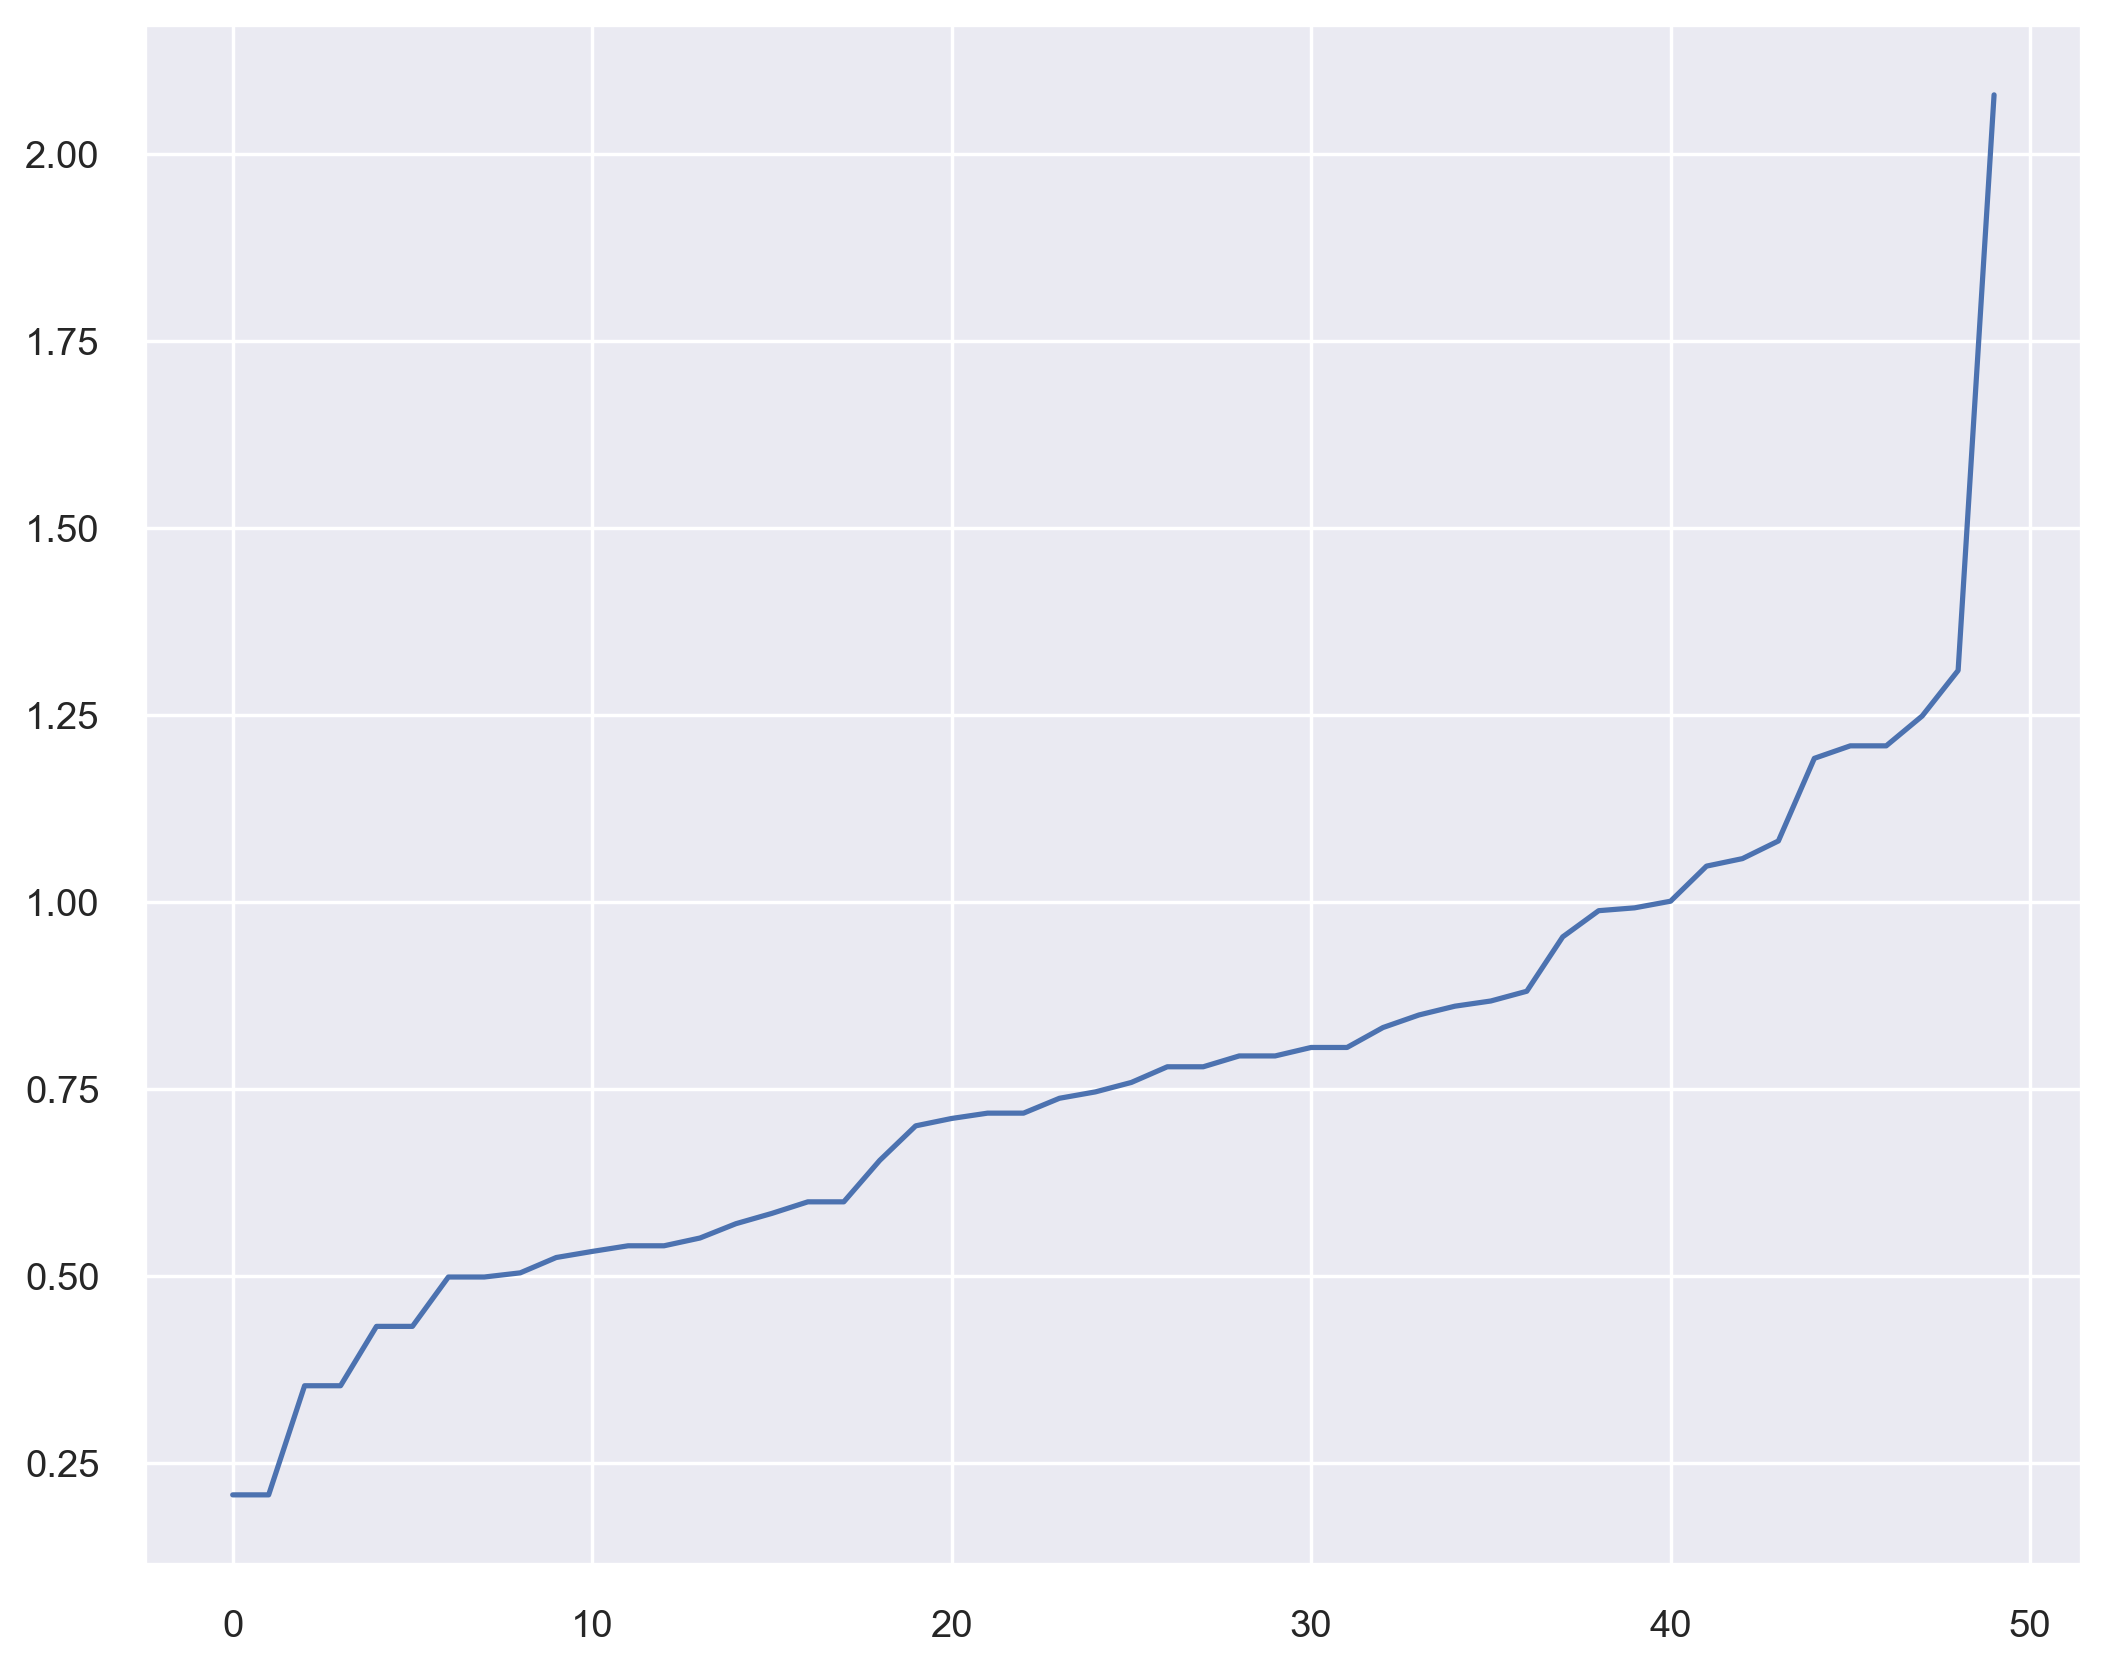

In [67]:
#  K-distance Plot:
plt.plot(dist)

> * #### Here we can see that distance changes have curvature at 1.25, So we select it a our epsilon value.
> * #### The min_samples we select here (number of dimensions) * 2 = 4*2 = 8 

 ### <font color ='green'> ➡ <u> Final Model :

In [50]:
db = DBSCAN(eps = 1.25, min_samples = 8)
Cluster_Db = db.fit_predict(x_sc)
print(silhouette_score(x_sc,Cluster_Db))

0.4047944502519567


In [51]:
Cluster_Db

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [52]:
df['Cluster_Db'] = Cluster_Db

In [53]:
df.groupby("Cluster_Db").agg('mean')

Murder     Assault   UrbanPop       Rape  Clusters_1  \
Cluster_Db                                                            
-1          12.331579  259.315789  68.315789  29.215789         1.0   
 0           5.003226  116.483871  63.838710  16.338710         0.0   

            Clusters_2  Clusters_K  
Cluster_Db                          
-1            1.736842    1.000000  
 0            0.774194    0.032258

* ##### <font color ='candy'><u> Cluster Visualisation: </u>

<Axes: xlabel='Murder', ylabel='Assault'>

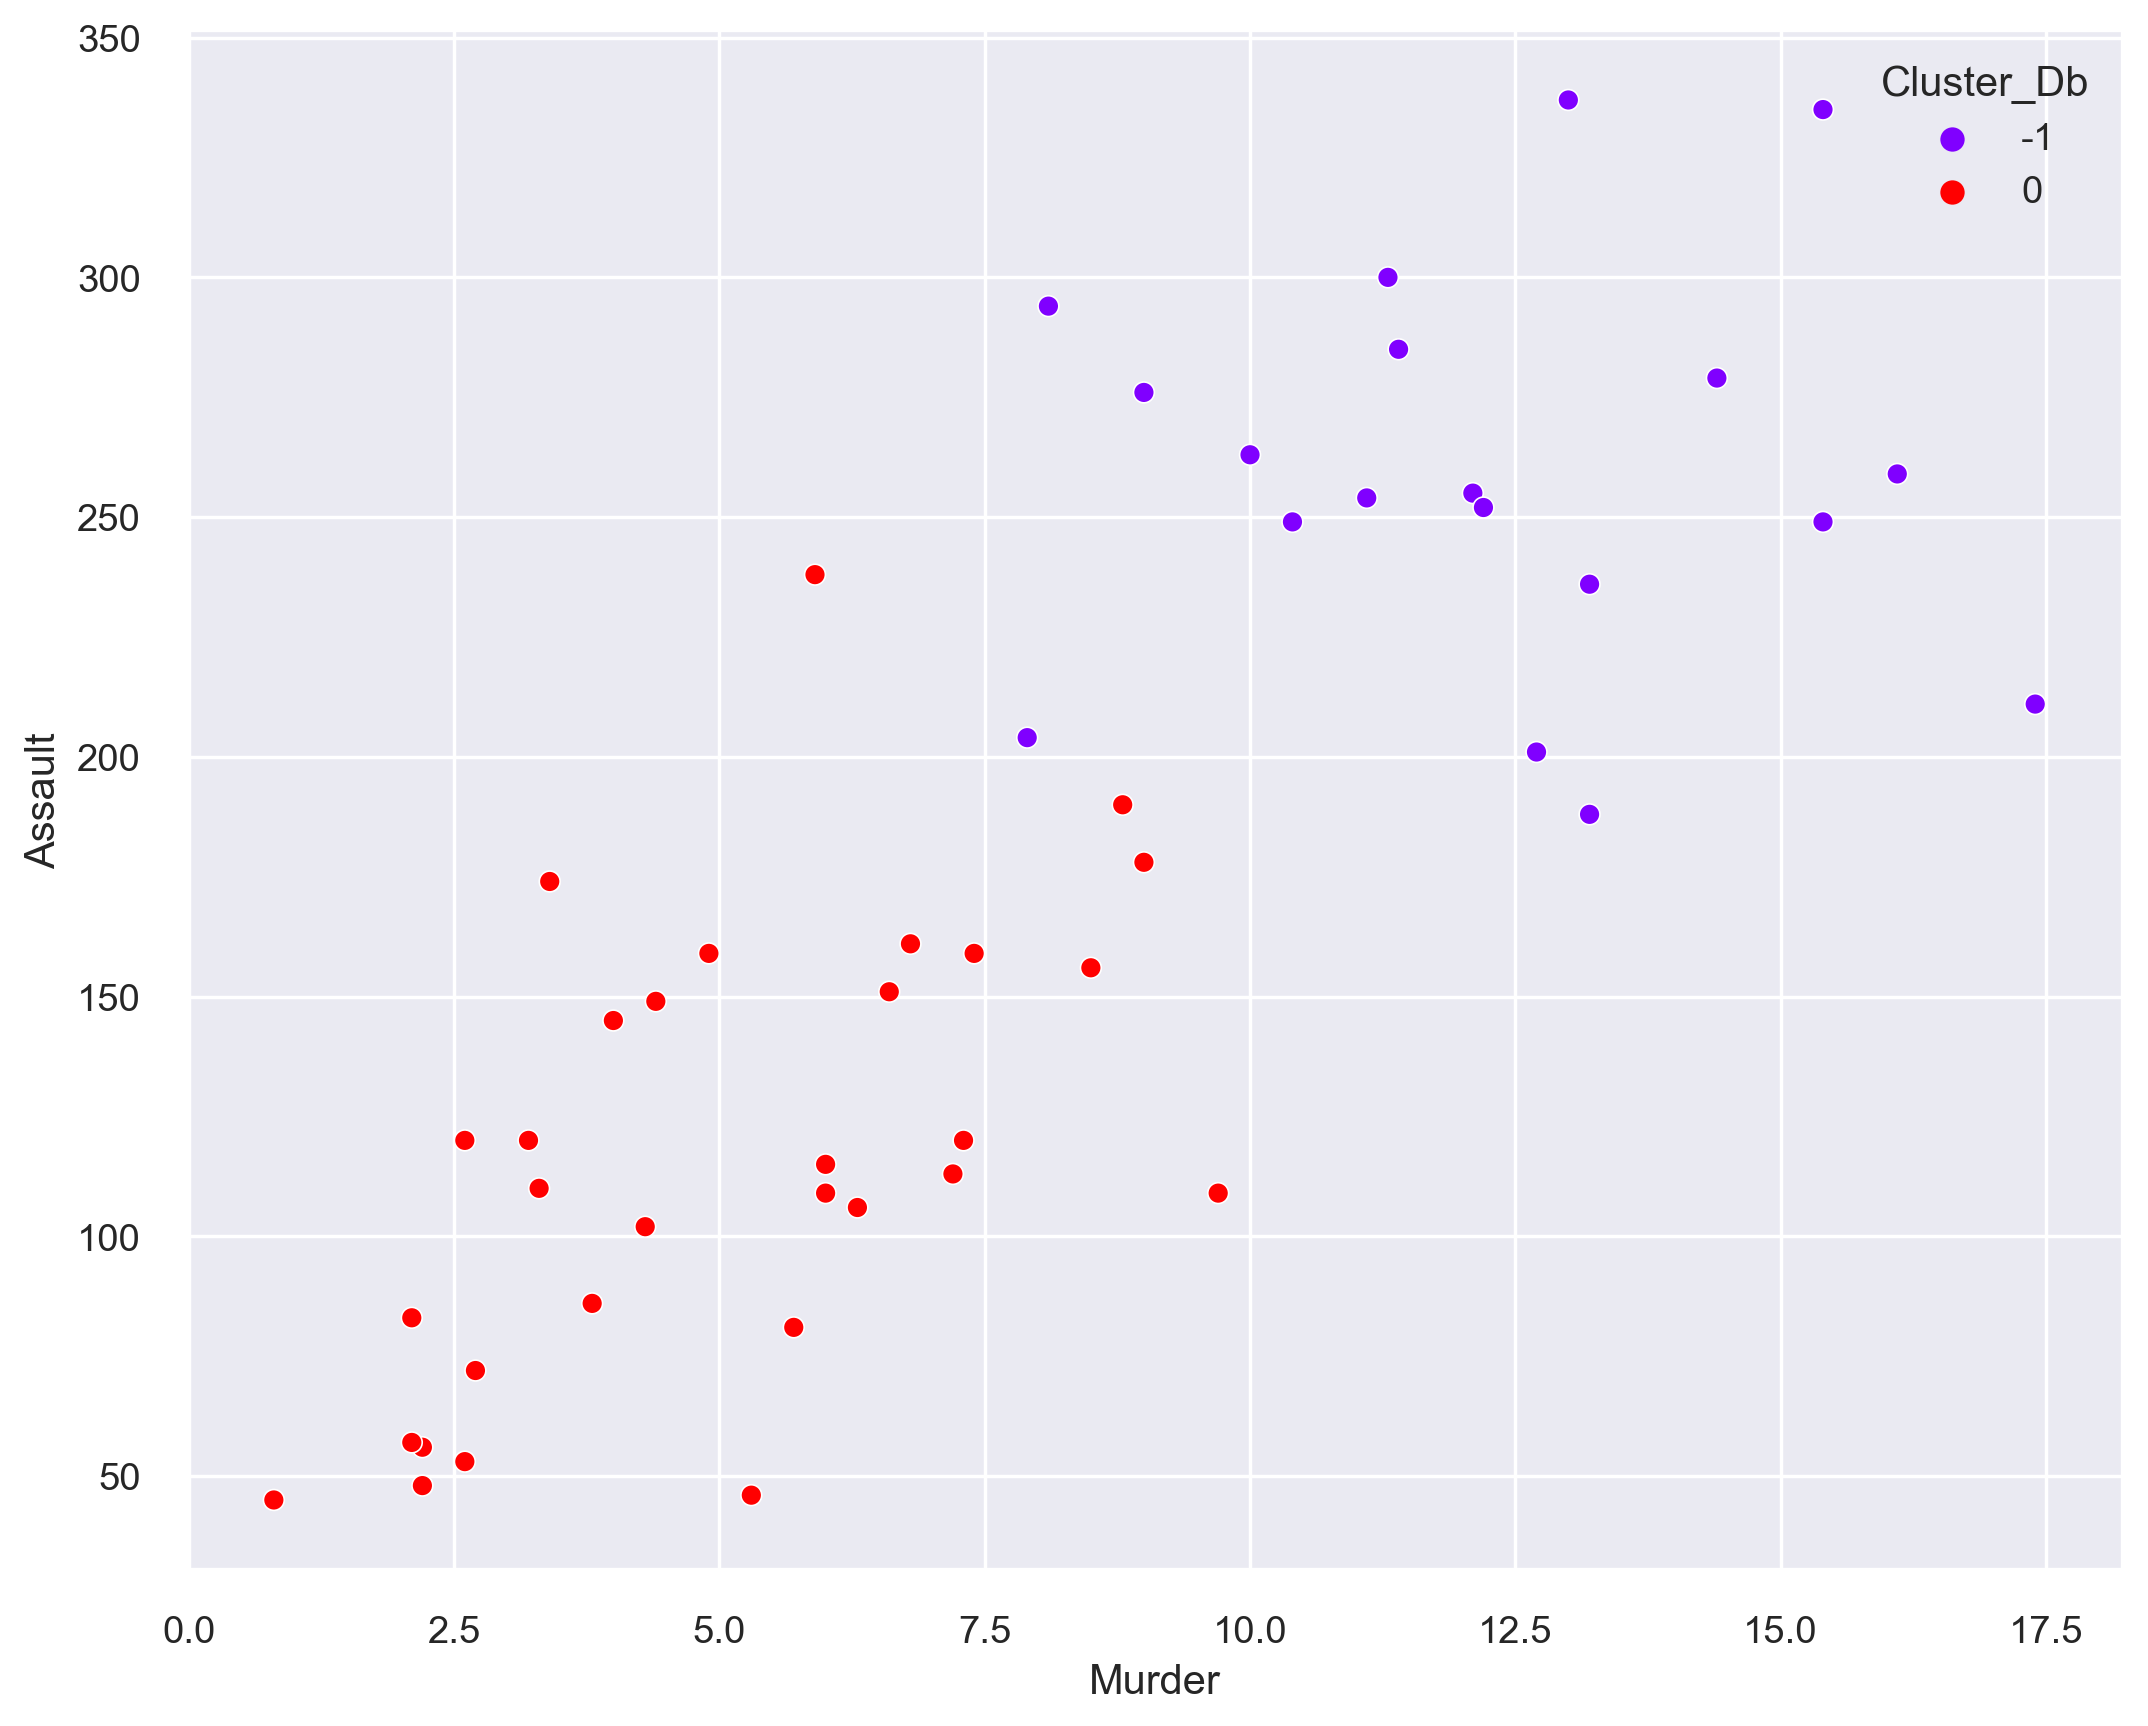

In [68]:
sns.scatterplot(data=df, x= 'Murder', y='Assault', hue= 'Cluster_Db', palette= 'rainbow') 

> * #### <font color = 'brown'>OPTIMAL NUMBER OF CLUSTERS WITH DBSCAN CLUSTERING: 
> * #### In this algorithm -1 group indicates outlier data points, that means DBSCAN able to recognise only one group and assigns all other data points as noise. This might because there is no dense region so DBSCAN unable to recognise it.

[GO TO TOP](#0.1) 

* ### <font color = 'blue'> <u> CONCLUSION </u>
    - #### As the clustering involves the distance calculation we applied Standardisation for the data. We did all EDA and Visualisations required.
    
    - #### Given data is very small with 5 variables and 50 records. We tried 3 clustering algorithms on it - 1. Hierarchical Clustering, 2. K-Means Clustering, 3. DBSCAN  
    
    - #### We observed that Hierarchical Culstering works well on small data set as it is time consuming for large data sets. But in our case it creates linkages easily.
    
    - #### In Hierarchical Clustering Complete linkage and Ward Linkage recognised 2 clusters, one with low crime rate and another with high crime rate. We Visualised these clusters with scatter plot. Also we observed that the "Urban Population" not much affecting crime rate.
    
    - #### With K-Means Clustering also we get the 2 cluster division, but the Silhoutte Score is 0.4 which is good but not best. This may be due to overlapping of the clusters and presence of outliers in "Rape" variable. This proves K-Means clustering affects due to outlier data points.

    - #### DBSCAN able to recognise only one cluster and other data poits as noise. DBSCAN is good for oulier detection but in our case it recoginsed high crime rate as noise data points, this because of the reason that our data is dispersed not densed. Main principle of DBSCAN to recognise the cluster is density of data points.
    
    - #### So, we can conclude that Hierarchical Clustering algorithm works well for small data set.
    

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___